In [222]:
from matplotlib import pyplot as plt
import pandas as pd
import lightgbm as lgb
import talib
import warnings
warnings.simplefilter('ignore')
import matplotlib
print(matplotlib.get_configdir())

/Users/junyakuramochi/.matplotlib


In [223]:
data=pd.read_csv('/Users/junyakuramochi/Desktop/GBP:USD .csv')

In [224]:
data=data.iloc[::-1]
data

,日付け,終値,始値,高値,安値,前日比%
386,2020年01月01日,1.3254,1.3261,1.3276,1.3237,-0.04%
385,2020年01月02日,1.3144,1.3255,1.3268,1.3115,-0.83%
384,2020年01月03日,1.3086,1.3138,1.3162,1.3053,-0.44%
383,2020年01月06日,1.3167,1.3075,1.3175,1.3063,0.62%
382,2020年01月07日,1.3123,1.3168,1.3213,1.3095,-0.33%
...,...,...,...,...,...,...
4,2021年06月18日,1.3809,1.3921,1.3945,1.3792,-0.79%
3,2021年06月21日,1.3929,1.3811,1.3937,1.3786,0.87%
2,2021年06月22日,1.3947,1.3931,1.3965,1.3860,0.13%
1,2021年06月23日,1.3959,1.3948,1.4002,1.3923,0.09%


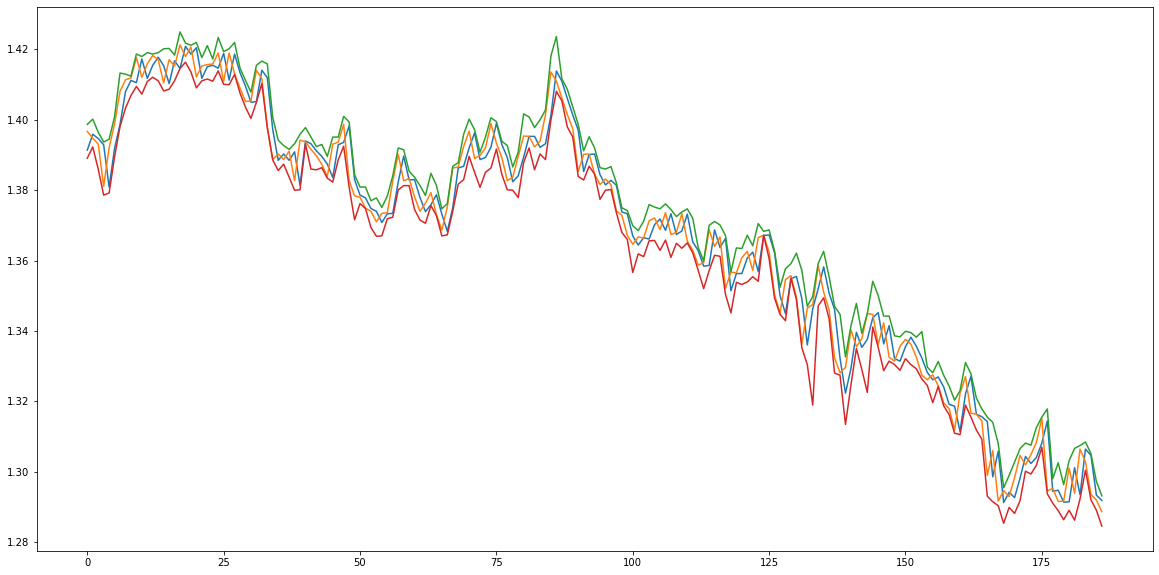

In [225]:
plt.rcParams['figure.figsize'] = (20,10)
data[200:].plot()
plt.legend().remove()
plt.show()

In [226]:
#SMAを短期=5,中期=75,長期=200
data['sma5']=talib.SMA(data["終値"], timeperiod=5)
data['sma50']=talib.SMA(data["終値"], timeperiod=50)
data['sma100']=talib.SMA(data["終値"], timeperiod=100)

In [227]:
#EMAも同様に設定する
data['ema5']=talib.EMA(data['終値'],timeperiod=5)
data['ema50']=talib.EMA(data['終値'],timeperiod=50)
data['ema100']=talib.EMA(data['終値'],timeperiod=100)

In [228]:
#rsiを期間9,14で設定する
data['rsi9']=talib.RSI(data['終値'],timeperiod=9)
data['rsi14']=talib.RSI(data['終値'],timeperiod=14)

In [229]:
#MACDは
macd, macdsignal, macdhist = talib.MACD(data['終値'], fastperiod=12, slowperiod=26, signalperiod=9)
data['macd']=macd
data['macdsignal']=macdsignal
data['macdhist']=macdhist

In [230]:
data

,日付け,終値,始値,高値,安値,前日比%,sma5,sma50,sma100,ema5,ema50,ema100,rsi9,rsi14,macd,macdsignal,macdhist
386,2020年01月01日,1.3254,1.3261,1.3276,1.3237,-0.04%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
385,2020年01月02日,1.3144,1.3255,1.3268,1.3115,-0.83%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
384,2020年01月03日,1.3086,1.3138,1.3162,1.3053,-0.44%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
383,2020年01月06日,1.3167,1.3075,1.3175,1.3063,0.62%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
382,2020年01月07日,1.3123,1.3168,1.3213,1.3095,-0.33%,1.31548,NaN,NaN,1.315480,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,2021年06月18日,1.3809,1.3921,1.3945,1.3792,-0.79%,1.39814,1.401900,1.393558,1.394985,1.402349,1.390194,21.589719,30.946901,-0.002635,0.001657,-0.004292
3,2021年06月21日,1.3929,1.3811,1.3937,1.3786,0.87%,1.39448,1.402278,1.393826,1.394290,1.401979,1.390247,38.454544,41.502183,-0.003300,0.000666,-0.003965
2,2021年06月22日,1.3947,1.3931,1.3965,1.3860,0.13%,1.39182,1.402676,1.394108,1.394427,1.401693,1.390335,40.610128,42.911825,-0.003639,-0.000195,-0.003444
1,2021年06月23日,1.3959,1.3948,1.4002,1.3923,0.09%,1.39126,1.403038,1.394423,1.394918,1.401466,1.390446,42.130262,43.882691,-0.003768,-0.000910,-0.002858


array([[<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

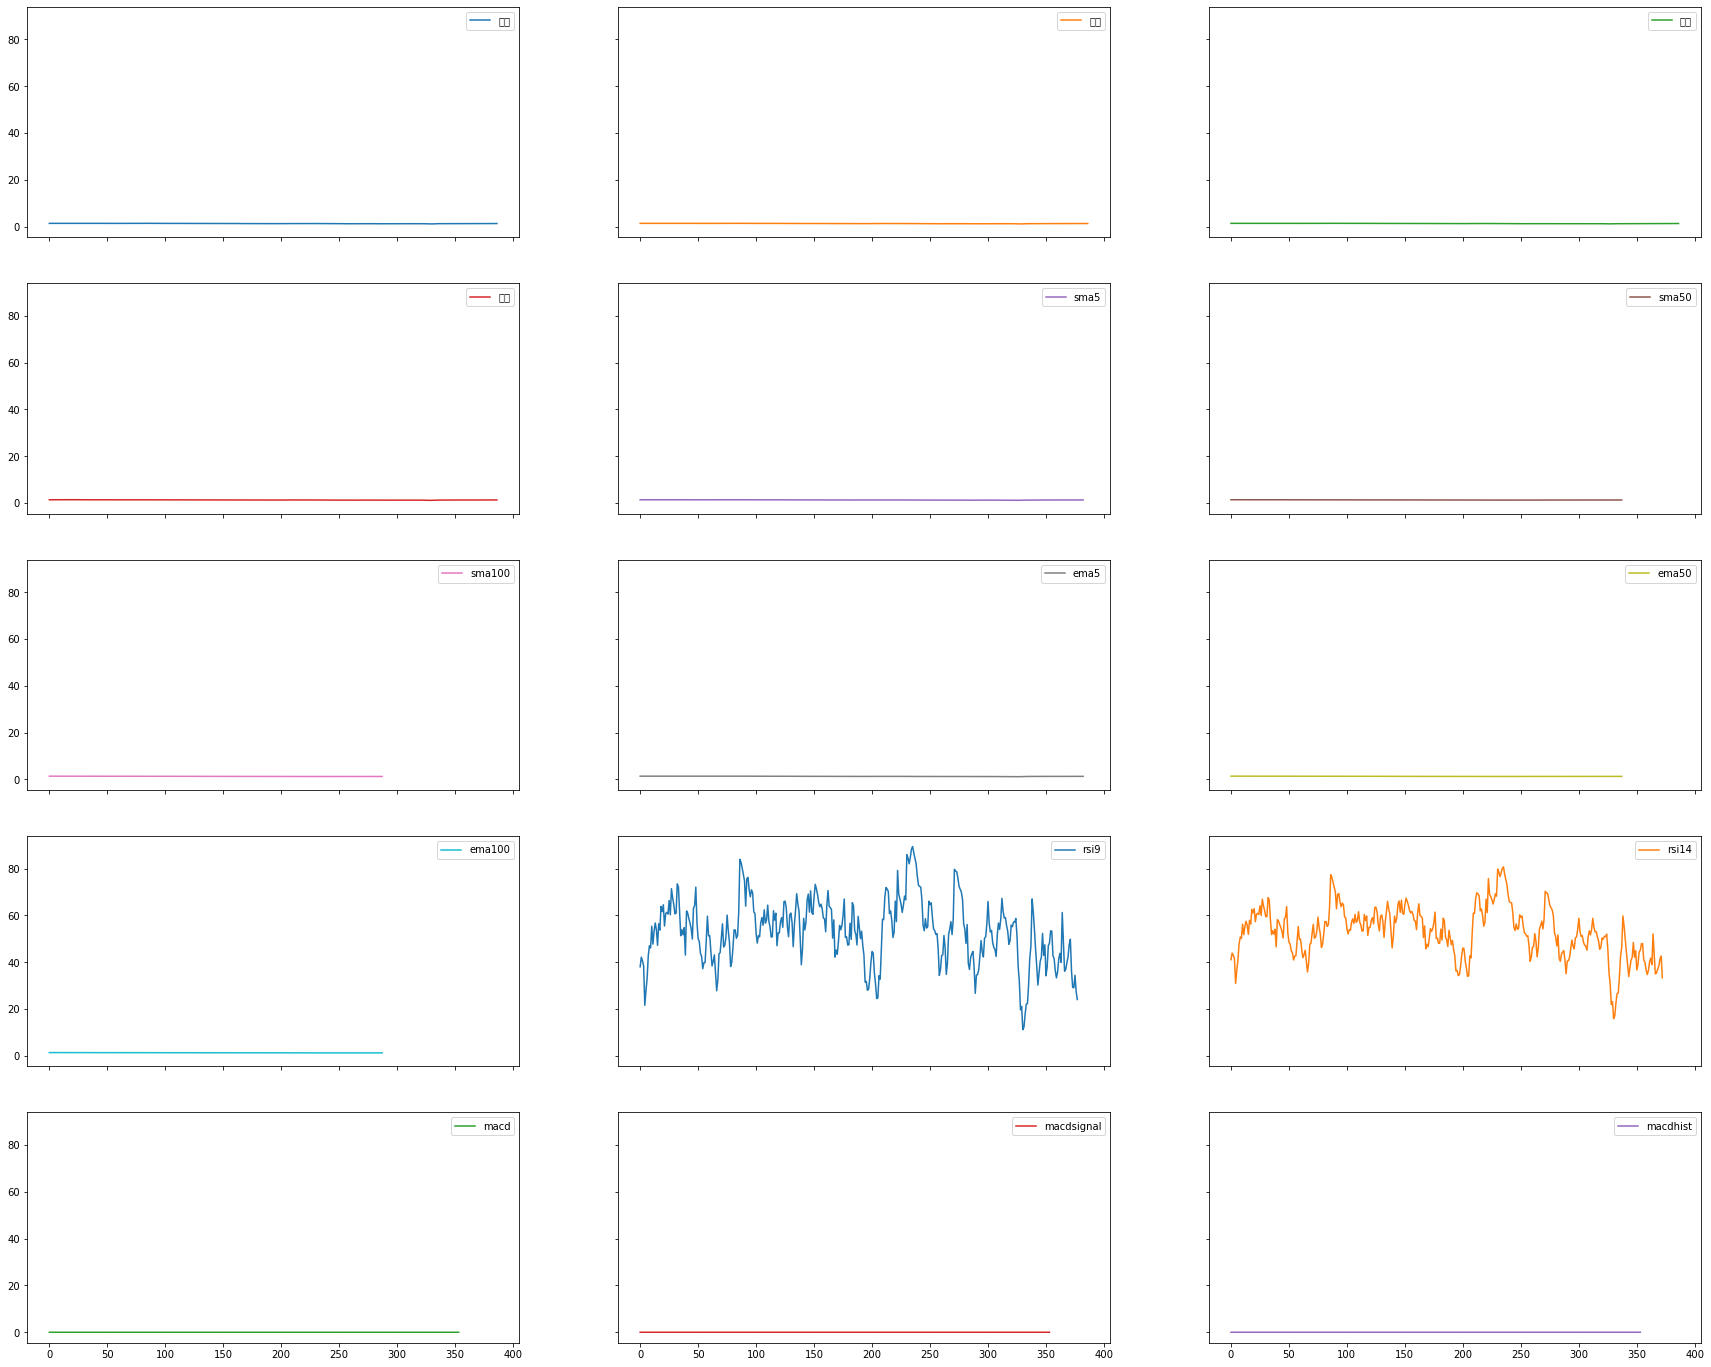

In [231]:
plt.rcParams['figure.figsize'] = (30,50)
data.plot(subplots=True, layout=(10,3),sharex=True, sharey=True)

In [232]:
#data[0:100]まではNaNが存在するのでdata[100:]から利用する
data=data[100:]
#目的変数→終値､始値､高値､安値
train_Y=data['終値']
#説明変数
train_X=data.drop(['終値','日付け','前日比%'],axis=1)

In [233]:
train_Y

286    1.2239
285    1.2222
284    1.2164
283    1.2182
282    1.2331
        ...  
4      1.3809
3      1.3929
2      1.3947
1      1.3959
0      1.3914
Name: 終値, Length: 287, dtype: float64

In [234]:
train_X

,始値,高値,安値,sma5,sma50,sma100,ema5,ema50,ema100,rsi9,rsi14,macd,macdsignal,macdhist
286,1.2241,1.2289,1.2221,1.22018,1.228120,1.264065,1.222846,1.240824,1.264265,43.546444,44.324209,-0.005454,-0.003710,-0.001744
285,1.2240,1.2250,1.2185,1.22010,1.227422,1.263143,1.222631,1.240094,1.263432,41.980934,43.411489,-0.005457,-0.004059,-0.001398
284,1.2226,1.2242,1.2161,1.22130,1.227198,1.262221,1.220554,1.239165,1.262500,36.890557,40.358042,-0.005860,-0.004419,-0.001441
283,1.2179,1.2205,1.2163,1.22116,1.227030,1.261236,1.219769,1.238343,1.261623,39.453755,41.727900,-0.005966,-0.004729,-0.001237
282,1.2190,1.2364,1.2179,1.22276,1.227592,1.260444,1.224213,1.238137,1.261058,56.069510,51.631340,-0.004791,-0.004741,-0.000050
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,1.3921,1.3945,1.3792,1.39814,1.401900,1.393558,1.394985,1.402349,1.390194,21.589719,30.946901,-0.002635,0.001657,-0.004292
3,1.3811,1.3937,1.3786,1.39448,1.402278,1.393826,1.394290,1.401979,1.390247,38.454544,41.502183,-0.003300,0.000666,-0.003965
2,1.3931,1.3965,1.3860,1.39182,1.402676,1.394108,1.394427,1.401693,1.390335,40.610128,42.911825,-0.003639,-0.000195,-0.003444
1,1.3948,1.4002,1.3923,1.39126,1.403038,1.394423,1.394918,1.401466,1.390446,42.130262,43.882691,-0.003768,-0.000910,-0.002858


In [235]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
import optuna.integration.lightgbm as lgb

In [236]:
X_train,X_valid,y_train,y_valid=train_test_split(train_X,train_Y,test_size=0.2,shuffle=False,)

In [237]:
lgb_train=lgb.Dataset(X_train,y_train)
lgb_eval=lgb.Dataset(X_valid,y_valid,reference=lgb_train)

param = {
        'objective': 'regression',
        'metric': 'rmse',
        'verbosity': -1,
        'boosting_type': 'gbdt',
    }

best = lgb.train(param, 
                 lgb_train,
                 valid_sets=lgb_eval,
                 early_stopping_rounds=100)


[I 2021-06-24 23:24:38,915] A new study created in memory with name: no-name-80b8f73c-379b-4fff-b2ae-b0f4a02ea177
feature_fraction, val_score: 0.012641:  14%|#4        | 1/7 [00:00<00:01,  4.71it/s]

[1]	valid_0's rmse: 0.0741058
Training until validation scores don't improve for 100 rounds
[2]	valid_0's rmse: 0.0680027
[3]	valid_0's rmse: 0.062113
[4]	valid_0's rmse: 0.0569151
[5]	valid_0's rmse: 0.0524761
[6]	valid_0's rmse: 0.0483624
[7]	valid_0's rmse: 0.0444935
[8]	valid_0's rmse: 0.0411538
[9]	valid_0's rmse: 0.0380947
[10]	valid_0's rmse: 0.0352999
[11]	valid_0's rmse: 0.0328411
[12]	valid_0's rmse: 0.030633
[13]	valid_0's rmse: 0.0287612
[14]	valid_0's rmse: 0.0269959
[15]	valid_0's rmse: 0.0255207
[16]	valid_0's rmse: 0.0240843
[17]	valid_0's rmse: 0.0229209
[18]	valid_0's rmse: 0.0219196
[19]	valid_0's rmse: 0.0209942
[20]	valid_0's rmse: 0.0202044
[21]	valid_0's rmse: 0.0193656
[22]	valid_0's rmse: 0.0186189
[23]	valid_0's rmse: 0.0179626
[24]	valid_0's rmse: 0.0174518
[25]	valid_0's rmse: 0.0170182
[26]	valid_0's rmse: 0.0165303
[27]	valid_0's rmse: 0.0162776
[28]	valid_0's rmse: 0.0158744
[29]	valid_0's rmse: 0.0155153
[30]	valid_0's rmse: 0.0153368
[31]	valid_0's rmse

feature_fraction, val_score: 0.012533:  29%|##8       | 2/7 [00:00<00:00,  5.63it/s]

[1]	valid_0's rmse: 0.0741915
Training until validation scores don't improve for 100 rounds
[2]	valid_0's rmse: 0.0680148
[3]	valid_0's rmse: 0.0621237
[4]	valid_0's rmse: 0.0569245
[5]	valid_0's rmse: 0.0521601
[6]	valid_0's rmse: 0.0481717
[7]	valid_0's rmse: 0.0444805
[8]	valid_0's rmse: 0.0412749
[9]	valid_0's rmse: 0.0382084
[10]	valid_0's rmse: 0.0354046
[11]	valid_0's rmse: 0.0329329
[12]	valid_0's rmse: 0.0307202
[13]	valid_0's rmse: 0.0287176
[14]	valid_0's rmse: 0.0269924
[15]	valid_0's rmse: 0.0254258
[16]	valid_0's rmse: 0.0240709
[17]	valid_0's rmse: 0.0228134
[18]	valid_0's rmse: 0.0216933
[19]	valid_0's rmse: 0.0208136
[20]	valid_0's rmse: 0.0200294
[21]	valid_0's rmse: 0.0192847
[22]	valid_0's rmse: 0.0186398
[23]	valid_0's rmse: 0.0179616
[24]	valid_0's rmse: 0.0173587
[25]	valid_0's rmse: 0.0168253
[26]	valid_0's rmse: 0.0163542
[27]	valid_0's rmse: 0.0159338
[28]	valid_0's rmse: 0.0157113
[29]	valid_0's rmse: 0.0154737
[30]	valid_0's rmse: 0.0151812
[31]	valid_0's rm

feature_fraction, val_score: 0.012533:  43%|####2     | 3/7 [00:00<00:00,  5.78it/s]

[58]	valid_0's rmse: 0.0129668
[59]	valid_0's rmse: 0.0128979
[60]	valid_0's rmse: 0.0128414
[61]	valid_0's rmse: 0.0127972
[62]	valid_0's rmse: 0.0127468
[63]	valid_0's rmse: 0.0127994
[64]	valid_0's rmse: 0.0127446
[65]	valid_0's rmse: 0.0127531
[66]	valid_0's rmse: 0.0127049
[67]	valid_0's rmse: 0.0126863
[68]	valid_0's rmse: 0.0126971
[69]	valid_0's rmse: 0.0126518
[70]	valid_0's rmse: 0.0126125
[71]	valid_0's rmse: 0.0125828
[72]	valid_0's rmse: 0.0126481
[73]	valid_0's rmse: 0.0126586
[74]	valid_0's rmse: 0.0126869
[75]	valid_0's rmse: 0.0127126
[76]	valid_0's rmse: 0.0126696
[77]	valid_0's rmse: 0.0127145
[78]	valid_0's rmse: 0.0126725
[79]	valid_0's rmse: 0.0127128
[80]	valid_0's rmse: 0.0126737
[81]	valid_0's rmse: 0.0126966
[82]	valid_0's rmse: 0.0126507
[83]	valid_0's rmse: 0.0126088
[84]	valid_0's rmse: 0.0126563
[85]	valid_0's rmse: 0.0126207
[86]	valid_0's rmse: 0.01258
[87]	valid_0's rmse: 0.0126299
[88]	valid_0's rmse: 0.0126306
[89]	valid_0's rmse: 0.0126582
[90]	valid

feature_fraction, val_score: 0.012384:  57%|#####7    | 4/7 [00:00<00:00,  5.88it/s]

[131]	valid_0's rmse: 0.0125004
[132]	valid_0's rmse: 0.0124728
[133]	valid_0's rmse: 0.0125009
[134]	valid_0's rmse: 0.0125118
[135]	valid_0's rmse: 0.0124854
[136]	valid_0's rmse: 0.0124782
[137]	valid_0's rmse: 0.0125123
[138]	valid_0's rmse: 0.0124866
[139]	valid_0's rmse: 0.0124662
[140]	valid_0's rmse: 0.012491
[141]	valid_0's rmse: 0.0125147
[142]	valid_0's rmse: 0.0124911
[143]	valid_0's rmse: 0.0125067
[144]	valid_0's rmse: 0.0124835
[145]	valid_0's rmse: 0.012475
[146]	valid_0's rmse: 0.0124834
[147]	valid_0's rmse: 0.0125144
[148]	valid_0's rmse: 0.0124964
[149]	valid_0's rmse: 0.0124749
[150]	valid_0's rmse: 0.0124583
[151]	valid_0's rmse: 0.0124428
[152]	valid_0's rmse: 0.0124616
[153]	valid_0's rmse: 0.0124809
[154]	valid_0's rmse: 0.0124607
[155]	valid_0's rmse: 0.0124788
[156]	valid_0's rmse: 0.0124598
[157]	valid_0's rmse: 0.0124419
[158]	valid_0's rmse: 0.0124468
[159]	valid_0's rmse: 0.0124613
[160]	valid_0's rmse: 0.0124454
[161]	valid_0's rmse: 0.012436
[162]	valid

feature_fraction, val_score: 0.012384:  86%|########5 | 6/7 [00:01<00:00,  6.10it/s]

[214]	valid_0's rmse: 0.0124789
[215]	valid_0's rmse: 0.0124653
[216]	valid_0's rmse: 0.0124692
[217]	valid_0's rmse: 0.0124636
[218]	valid_0's rmse: 0.0124892
[219]	valid_0's rmse: 0.0125024
[220]	valid_0's rmse: 0.0124884
[221]	valid_0's rmse: 0.0124765
[222]	valid_0's rmse: 0.0124699
[223]	valid_0's rmse: 0.0124833
[224]	valid_0's rmse: 0.0124722
[225]	valid_0's rmse: 0.0124969
[226]	valid_0's rmse: 0.012484
[227]	valid_0's rmse: 0.0124821
[228]	valid_0's rmse: 0.0124725
[229]	valid_0's rmse: 0.0124767
[230]	valid_0's rmse: 0.0124855
[231]	valid_0's rmse: 0.0124979
[232]	valid_0's rmse: 0.0124873
[233]	valid_0's rmse: 0.0124992
[234]	valid_0's rmse: 0.0124922
[235]	valid_0's rmse: 0.0124816
[236]	valid_0's rmse: 0.012504
[237]	valid_0's rmse: 0.0124931
[238]	valid_0's rmse: 0.0124836
[239]	valid_0's rmse: 0.0124734
[240]	valid_0's rmse: 0.0124949
[241]	valid_0's rmse: 0.0124936
[242]	valid_0's rmse: 0.0124815
[243]	valid_0's rmse: 0.0124712
[244]	valid_0's rmse: 0.0124735
[245]	vali

num_leaves, val_score: 0.012311:   0%|          | 0/20 [00:00<?, ?it/s]

[171]	valid_0's rmse: 0.0123111
[172]	valid_0's rmse: 0.0123488
[173]	valid_0's rmse: 0.012333
[174]	valid_0's rmse: 0.0123577
[175]	valid_0's rmse: 0.0123729
[176]	valid_0's rmse: 0.0123537
[177]	valid_0's rmse: 0.012341
[178]	valid_0's rmse: 0.0123257
[179]	valid_0's rmse: 0.0123418
[180]	valid_0's rmse: 0.0123243
[181]	valid_0's rmse: 0.0123586
[182]	valid_0's rmse: 0.0123408
[183]	valid_0's rmse: 0.01235
[184]	valid_0's rmse: 0.0123665
[185]	valid_0's rmse: 0.0123502
[186]	valid_0's rmse: 0.0123594
[187]	valid_0's rmse: 0.0123736
[188]	valid_0's rmse: 0.0123583
[189]	valid_0's rmse: 0.0123763
[190]	valid_0's rmse: 0.0123615
[191]	valid_0's rmse: 0.0123481
[192]	valid_0's rmse: 0.0123801
[193]	valid_0's rmse: 0.0123635
[194]	valid_0's rmse: 0.0123425
[195]	valid_0's rmse: 0.0123607
[196]	valid_0's rmse: 0.0123745
[197]	valid_0's rmse: 0.0123703
[198]	valid_0's rmse: 0.0123554
[199]	valid_0's rmse: 0.0123758
[200]	valid_0's rmse: 0.0123755
[201]	valid_0's rmse: 0.0123602
[202]	valid_

num_leaves, val_score: 0.012311:   5%|5         | 1/20 [00:00<00:02,  6.68it/s]

[158]	valid_0's rmse: 0.0123478
[159]	valid_0's rmse: 0.0123535
[160]	valid_0's rmse: 0.0123365
[161]	valid_0's rmse: 0.0123607
[162]	valid_0's rmse: 0.0123442
[163]	valid_0's rmse: 0.0123525
[164]	valid_0's rmse: 0.0123363
[165]	valid_0's rmse: 0.0123453
[166]	valid_0's rmse: 0.0123265
[167]	valid_0's rmse: 0.0123314
[168]	valid_0's rmse: 0.012353
[169]	valid_0's rmse: 0.0123366
[170]	valid_0's rmse: 0.0123192
[171]	valid_0's rmse: 0.0123111
[172]	valid_0's rmse: 0.0123488
[173]	valid_0's rmse: 0.012333
[174]	valid_0's rmse: 0.0123577
[175]	valid_0's rmse: 0.0123729
[176]	valid_0's rmse: 0.0123537
[177]	valid_0's rmse: 0.012341
[178]	valid_0's rmse: 0.0123257
[179]	valid_0's rmse: 0.0123418
[180]	valid_0's rmse: 0.0123243
[181]	valid_0's rmse: 0.0123586
[182]	valid_0's rmse: 0.0123408
[183]	valid_0's rmse: 0.01235
[184]	valid_0's rmse: 0.0123665
[185]	valid_0's rmse: 0.0123502
[186]	valid_0's rmse: 0.0123594
[187]	valid_0's rmse: 0.0123736
[188]	valid_0's rmse: 0.0123583
[189]	valid_0

num_leaves, val_score: 0.012311:  15%|#5        | 3/20 [00:00<00:02,  6.63it/s]

[187]	valid_0's rmse: 0.0123736
[188]	valid_0's rmse: 0.0123583
[189]	valid_0's rmse: 0.0123763
[190]	valid_0's rmse: 0.0123615
[191]	valid_0's rmse: 0.0123481
[192]	valid_0's rmse: 0.0123801
[193]	valid_0's rmse: 0.0123635
[194]	valid_0's rmse: 0.0123425
[195]	valid_0's rmse: 0.0123607
[196]	valid_0's rmse: 0.0123745
[197]	valid_0's rmse: 0.0123703
[198]	valid_0's rmse: 0.0123554
[199]	valid_0's rmse: 0.0123758
[200]	valid_0's rmse: 0.0123755
[201]	valid_0's rmse: 0.0123602
[202]	valid_0's rmse: 0.0123902
[203]	valid_0's rmse: 0.0123749
[204]	valid_0's rmse: 0.0123804
[205]	valid_0's rmse: 0.0123659
[206]	valid_0's rmse: 0.0123941
[207]	valid_0's rmse: 0.0123796
[208]	valid_0's rmse: 0.0123838
[209]	valid_0's rmse: 0.0123718
[210]	valid_0's rmse: 0.0123724
[211]	valid_0's rmse: 0.0123788
[212]	valid_0's rmse: 0.0123833
[213]	valid_0's rmse: 0.0123807
[214]	valid_0's rmse: 0.0123683
[215]	valid_0's rmse: 0.0123806
[216]	valid_0's rmse: 0.0123841
[217]	valid_0's rmse: 0.0123724
[218]	va

num_leaves, val_score: 0.012311:  20%|##        | 4/20 [00:00<00:02,  5.97it/s]

[18]	valid_0's rmse: 0.0219818
[19]	valid_0's rmse: 0.0210526
[20]	valid_0's rmse: 0.0202225
[21]	valid_0's rmse: 0.0194233
[22]	valid_0's rmse: 0.0186842
[23]	valid_0's rmse: 0.0180153
[24]	valid_0's rmse: 0.017427
[25]	valid_0's rmse: 0.0169003
[26]	valid_0's rmse: 0.0164369
[27]	valid_0's rmse: 0.0161806
[28]	valid_0's rmse: 0.0158743
[29]	valid_0's rmse: 0.0156203
[30]	valid_0's rmse: 0.015368
[31]	valid_0's rmse: 0.0151425
[32]	valid_0's rmse: 0.0149043
[33]	valid_0's rmse: 0.0146691
[34]	valid_0's rmse: 0.014461
[35]	valid_0's rmse: 0.0142425
[36]	valid_0's rmse: 0.0140783
[37]	valid_0's rmse: 0.0139929
[38]	valid_0's rmse: 0.013848
[39]	valid_0's rmse: 0.0137869
[40]	valid_0's rmse: 0.0136626
[41]	valid_0's rmse: 0.0135978
[42]	valid_0's rmse: 0.013464
[43]	valid_0's rmse: 0.013346
[44]	valid_0's rmse: 0.0132063
[45]	valid_0's rmse: 0.0131048
[46]	valid_0's rmse: 0.0130951
[47]	valid_0's rmse: 0.013059
[48]	valid_0's rmse: 0.0130617
[49]	valid_0's rmse: 0.012985
[50]	valid_0's r

num_leaves, val_score: 0.012311:  25%|##5       | 5/20 [00:00<00:02,  5.68it/s]

[37]	valid_0's rmse: 0.0139929
[38]	valid_0's rmse: 0.013848
[39]	valid_0's rmse: 0.0137869
[40]	valid_0's rmse: 0.0136626
[41]	valid_0's rmse: 0.0135978
[42]	valid_0's rmse: 0.013464
[43]	valid_0's rmse: 0.013346
[44]	valid_0's rmse: 0.0132063
[45]	valid_0's rmse: 0.0131048
[46]	valid_0's rmse: 0.0130951
[47]	valid_0's rmse: 0.013059
[48]	valid_0's rmse: 0.0130617
[49]	valid_0's rmse: 0.012985
[50]	valid_0's rmse: 0.0130348
[51]	valid_0's rmse: 0.0129929
[52]	valid_0's rmse: 0.0129124
[53]	valid_0's rmse: 0.0129021
[54]	valid_0's rmse: 0.0128307
[55]	valid_0's rmse: 0.0128609
[56]	valid_0's rmse: 0.0128942
[57]	valid_0's rmse: 0.0128275
[58]	valid_0's rmse: 0.0127575
[59]	valid_0's rmse: 0.0127812
[60]	valid_0's rmse: 0.0128205
[61]	valid_0's rmse: 0.0128697
[62]	valid_0's rmse: 0.0128122
[63]	valid_0's rmse: 0.0128248
[64]	valid_0's rmse: 0.0128549
[65]	valid_0's rmse: 0.0127876
[66]	valid_0's rmse: 0.0128127
[67]	valid_0's rmse: 0.0127428
[68]	valid_0's rmse: 0.0127441
[69]	valid_0'

num_leaves, val_score: 0.012311:  30%|###       | 6/20 [00:01<00:02,  5.92it/s]

[69]	valid_0's rmse: 0.0126918
[70]	valid_0's rmse: 0.0126444
[71]	valid_0's rmse: 0.0125957
[72]	valid_0's rmse: 0.0126361
[73]	valid_0's rmse: 0.0126845
[74]	valid_0's rmse: 0.0127078
[75]	valid_0's rmse: 0.0126478
[76]	valid_0's rmse: 0.0125999
[77]	valid_0's rmse: 0.0125825
[78]	valid_0's rmse: 0.0125731
[79]	valid_0's rmse: 0.0125954
[80]	valid_0's rmse: 0.0125891
[81]	valid_0's rmse: 0.0125492
[82]	valid_0's rmse: 0.0125099
[83]	valid_0's rmse: 0.0125132
[84]	valid_0's rmse: 0.0125388
[85]	valid_0's rmse: 0.0124987
[86]	valid_0's rmse: 0.0124643
[87]	valid_0's rmse: 0.0125154
[88]	valid_0's rmse: 0.0125477
[89]	valid_0's rmse: 0.0125119
[90]	valid_0's rmse: 0.0125057
[91]	valid_0's rmse: 0.0124747
[92]	valid_0's rmse: 0.012506
[93]	valid_0's rmse: 0.0125201
[94]	valid_0's rmse: 0.0124803
[95]	valid_0's rmse: 0.0125263
[96]	valid_0's rmse: 0.0124905
[97]	valid_0's rmse: 0.0125369
[98]	valid_0's rmse: 0.012501
[99]	valid_0's rmse: 0.0125444
[100]	valid_0's rmse: 0.0125116
[101]	val

num_leaves, val_score: 0.012311:  35%|###5      | 7/20 [00:01<00:02,  6.18it/s]

[177]	valid_0's rmse: 0.012341
[178]	valid_0's rmse: 0.0123257
[179]	valid_0's rmse: 0.0123418
[180]	valid_0's rmse: 0.0123243
[181]	valid_0's rmse: 0.0123586
[182]	valid_0's rmse: 0.0123408
[183]	valid_0's rmse: 0.01235
[184]	valid_0's rmse: 0.0123665
[185]	valid_0's rmse: 0.0123502
[186]	valid_0's rmse: 0.0123594
[187]	valid_0's rmse: 0.0123736
[188]	valid_0's rmse: 0.0123583
[189]	valid_0's rmse: 0.0123763
[190]	valid_0's rmse: 0.0123615
[191]	valid_0's rmse: 0.0123481
[192]	valid_0's rmse: 0.0123801
[193]	valid_0's rmse: 0.0123635
[194]	valid_0's rmse: 0.0123425
[195]	valid_0's rmse: 0.0123607
[196]	valid_0's rmse: 0.0123745
[197]	valid_0's rmse: 0.0123703
[198]	valid_0's rmse: 0.0123554
[199]	valid_0's rmse: 0.0123758
[200]	valid_0's rmse: 0.0123755
[201]	valid_0's rmse: 0.0123602
[202]	valid_0's rmse: 0.0123902
[203]	valid_0's rmse: 0.0123749
[204]	valid_0's rmse: 0.0123804
[205]	valid_0's rmse: 0.0123659
[206]	valid_0's rmse: 0.0123941
[207]	valid_0's rmse: 0.0123796
[208]	valid

num_leaves, val_score: 0.012311:  45%|####5     | 9/20 [00:01<00:01,  6.26it/s]

[1]	valid_0's rmse: 0.0739839
Training until validation scores don't improve for 100 rounds
[2]	valid_0's rmse: 0.067793
[3]	valid_0's rmse: 0.0622996
[4]	valid_0's rmse: 0.0569818
[5]	valid_0's rmse: 0.0522139
[6]	valid_0's rmse: 0.048232
[7]	valid_0's rmse: 0.0445259
[8]	valid_0's rmse: 0.0410515
[9]	valid_0's rmse: 0.0381808
[10]	valid_0's rmse: 0.0354295
[11]	valid_0's rmse: 0.0329195
[12]	valid_0's rmse: 0.0307082
[13]	valid_0's rmse: 0.0287373
[14]	valid_0's rmse: 0.0269546
[15]	valid_0's rmse: 0.0256118
[16]	valid_0's rmse: 0.0242601
[17]	valid_0's rmse: 0.0229808
[18]	valid_0's rmse: 0.0219818
[19]	valid_0's rmse: 0.0210526
[20]	valid_0's rmse: 0.0202225
[21]	valid_0's rmse: 0.0194233
[22]	valid_0's rmse: 0.0186842
[23]	valid_0's rmse: 0.0180153
[24]	valid_0's rmse: 0.017427
[25]	valid_0's rmse: 0.0169003
[26]	valid_0's rmse: 0.0164369
[27]	valid_0's rmse: 0.0161806
[28]	valid_0's rmse: 0.0158743
[29]	valid_0's rmse: 0.0156203
[30]	valid_0's rmse: 0.015368
[31]	valid_0's rmse: 

num_leaves, val_score: 0.012311:  50%|#####     | 10/20 [00:01<00:01,  6.14it/s]

[82]	valid_0's rmse: 0.0125099
[83]	valid_0's rmse: 0.0125132
[84]	valid_0's rmse: 0.0125388
[85]	valid_0's rmse: 0.0124987
[86]	valid_0's rmse: 0.0124643
[87]	valid_0's rmse: 0.0125154
[88]	valid_0's rmse: 0.0125477
[89]	valid_0's rmse: 0.0125119
[90]	valid_0's rmse: 0.0125057
[91]	valid_0's rmse: 0.0124747
[92]	valid_0's rmse: 0.012506
[93]	valid_0's rmse: 0.0125201
[94]	valid_0's rmse: 0.0124803
[95]	valid_0's rmse: 0.0125263
[96]	valid_0's rmse: 0.0124905
[97]	valid_0's rmse: 0.0125369
[98]	valid_0's rmse: 0.012501
[99]	valid_0's rmse: 0.0125444
[100]	valid_0's rmse: 0.0125116
[101]	valid_0's rmse: 0.0125427
[102]	valid_0's rmse: 0.0125387
[103]	valid_0's rmse: 0.0125161
[104]	valid_0's rmse: 0.0125469
[105]	valid_0's rmse: 0.0125405
[106]	valid_0's rmse: 0.0125049
[107]	valid_0's rmse: 0.0124769
[108]	valid_0's rmse: 0.0124905
[109]	valid_0's rmse: 0.0124604
[110]	valid_0's rmse: 0.0124661
[111]	valid_0's rmse: 0.0124875
[112]	valid_0's rmse: 0.0124487
[113]	valid_0's rmse: 0.0124

num_leaves, val_score: 0.012311:  55%|#####5    | 11/20 [00:01<00:01,  6.21it/s]

[160]	valid_0's rmse: 0.0123365
[161]	valid_0's rmse: 0.0123607
[162]	valid_0's rmse: 0.0123442
[163]	valid_0's rmse: 0.0123525
[164]	valid_0's rmse: 0.0123363
[165]	valid_0's rmse: 0.0123453
[166]	valid_0's rmse: 0.0123265
[167]	valid_0's rmse: 0.0123314
[168]	valid_0's rmse: 0.012353
[169]	valid_0's rmse: 0.0123366
[170]	valid_0's rmse: 0.0123192
[171]	valid_0's rmse: 0.0123111
[172]	valid_0's rmse: 0.0123488
[173]	valid_0's rmse: 0.012333
[174]	valid_0's rmse: 0.0123577
[175]	valid_0's rmse: 0.0123729
[176]	valid_0's rmse: 0.0123537
[177]	valid_0's rmse: 0.012341
[178]	valid_0's rmse: 0.0123257
[179]	valid_0's rmse: 0.0123418
[180]	valid_0's rmse: 0.0123243
[181]	valid_0's rmse: 0.0123586
[182]	valid_0's rmse: 0.0123408
[183]	valid_0's rmse: 0.01235
[184]	valid_0's rmse: 0.0123665
[185]	valid_0's rmse: 0.0123502
[186]	valid_0's rmse: 0.0123594
[187]	valid_0's rmse: 0.0123736
[188]	valid_0's rmse: 0.0123583
[189]	valid_0's rmse: 0.0123763
[190]	valid_0's rmse: 0.0123615
[191]	valid_0

num_leaves, val_score: 0.012311:  60%|######    | 12/20 [00:01<00:01,  6.38it/s]

[261]	valid_0's rmse: 0.0123843
[262]	valid_0's rmse: 0.0123759
[263]	valid_0's rmse: 0.0123671
[264]	valid_0's rmse: 0.012381
[265]	valid_0's rmse: 0.0123879
[266]	valid_0's rmse: 0.012379
[267]	valid_0's rmse: 0.0123812
[268]	valid_0's rmse: 0.0123835
[269]	valid_0's rmse: 0.0123927
[270]	valid_0's rmse: 0.012384
[271]	valid_0's rmse: 0.0123802
Early stopping, best iteration is:
[171]	valid_0's rmse: 0.0123111
[1]	valid_0's rmse: 0.0739839
Training until validation scores don't improve for 100 rounds
[2]	valid_0's rmse: 0.067793
[3]	valid_0's rmse: 0.0622996
[4]	valid_0's rmse: 0.0569818
[5]	valid_0's rmse: 0.0522139
[6]	valid_0's rmse: 0.048232
[7]	valid_0's rmse: 0.0445259
[8]	valid_0's rmse: 0.0410515
[9]	valid_0's rmse: 0.0381808
[10]	valid_0's rmse: 0.0354295
[11]	valid_0's rmse: 0.0329195
[12]	valid_0's rmse: 0.0307082
[13]	valid_0's rmse: 0.0287373
[14]	valid_0's rmse: 0.0269546
[15]	valid_0's rmse: 0.0256118
[16]	valid_0's rmse: 0.0242601
[17]	valid_0's rmse: 0.0229808
[18]	v

num_leaves, val_score: 0.012311:  70%|#######   | 14/20 [00:02<00:01,  5.82it/s]

[246]	valid_0's rmse: 0.01239
[247]	valid_0's rmse: 0.012394
[248]	valid_0's rmse: 0.0123845
[249]	valid_0's rmse: 0.0123926
[250]	valid_0's rmse: 0.0123838
[251]	valid_0's rmse: 0.0123841
[252]	valid_0's rmse: 0.0123742
[253]	valid_0's rmse: 0.0123857
[254]	valid_0's rmse: 0.0123758
[255]	valid_0's rmse: 0.0123871
[256]	valid_0's rmse: 0.012378
[257]	valid_0's rmse: 0.0123683
[258]	valid_0's rmse: 0.0123584
[259]	valid_0's rmse: 0.0123625
[260]	valid_0's rmse: 0.0123728
[261]	valid_0's rmse: 0.0123843
[262]	valid_0's rmse: 0.0123759
[263]	valid_0's rmse: 0.0123671
[264]	valid_0's rmse: 0.012381
[265]	valid_0's rmse: 0.0123879
[266]	valid_0's rmse: 0.012379
[267]	valid_0's rmse: 0.0123812
[268]	valid_0's rmse: 0.0123835
[269]	valid_0's rmse: 0.0123927
[270]	valid_0's rmse: 0.012384
[271]	valid_0's rmse: 0.0123802
Early stopping, best iteration is:
[171]	valid_0's rmse: 0.0123111
[1]	valid_0's rmse: 0.0739839
Training until validation scores don't improve for 100 rounds
[2]	valid_0's rm

num_leaves, val_score: 0.012311:  75%|#######5  | 15/20 [00:02<00:00,  6.02it/s]

[1]	valid_0's rmse: 0.0739839
Training until validation scores don't improve for 100 rounds
[2]	valid_0's rmse: 0.067793
[3]	valid_0's rmse: 0.0622996
[4]	valid_0's rmse: 0.0569818
[5]	valid_0's rmse: 0.0522139
[6]	valid_0's rmse: 0.048232
[7]	valid_0's rmse: 0.0445259
[8]	valid_0's rmse: 0.0410515
[9]	valid_0's rmse: 0.0381808
[10]	valid_0's rmse: 0.0354295
[11]	valid_0's rmse: 0.0329195
[12]	valid_0's rmse: 0.0307082
[13]	valid_0's rmse: 0.0287373
[14]	valid_0's rmse: 0.0269546
[15]	valid_0's rmse: 0.0256118
[16]	valid_0's rmse: 0.0242601
[17]	valid_0's rmse: 0.0229808
[18]	valid_0's rmse: 0.0219818
[19]	valid_0's rmse: 0.0210526
[20]	valid_0's rmse: 0.0202225
[21]	valid_0's rmse: 0.0194233
[22]	valid_0's rmse: 0.0186842
[23]	valid_0's rmse: 0.0180153
[24]	valid_0's rmse: 0.017427
[25]	valid_0's rmse: 0.0169003
[26]	valid_0's rmse: 0.0164369
[27]	valid_0's rmse: 0.0161806
[28]	valid_0's rmse: 0.0158743
[29]	valid_0's rmse: 0.0156203
[30]	valid_0's rmse: 0.015368
[31]	valid_0's rmse: 

num_leaves, val_score: 0.012311:  80%|########  | 16/20 [00:02<00:00,  5.93it/s]

[77]	valid_0's rmse: 0.0125825
[78]	valid_0's rmse: 0.0125731
[79]	valid_0's rmse: 0.0125954
[80]	valid_0's rmse: 0.0125891
[81]	valid_0's rmse: 0.0125492
[82]	valid_0's rmse: 0.0125099
[83]	valid_0's rmse: 0.0125132
[84]	valid_0's rmse: 0.0125388
[85]	valid_0's rmse: 0.0124987
[86]	valid_0's rmse: 0.0124643
[87]	valid_0's rmse: 0.0125154
[88]	valid_0's rmse: 0.0125477
[89]	valid_0's rmse: 0.0125119
[90]	valid_0's rmse: 0.0125057
[91]	valid_0's rmse: 0.0124747
[92]	valid_0's rmse: 0.012506
[93]	valid_0's rmse: 0.0125201
[94]	valid_0's rmse: 0.0124803
[95]	valid_0's rmse: 0.0125263
[96]	valid_0's rmse: 0.0124905
[97]	valid_0's rmse: 0.0125369
[98]	valid_0's rmse: 0.012501
[99]	valid_0's rmse: 0.0125444
[100]	valid_0's rmse: 0.0125116
[101]	valid_0's rmse: 0.0125427
[102]	valid_0's rmse: 0.0125387
[103]	valid_0's rmse: 0.0125161
[104]	valid_0's rmse: 0.0125469
[105]	valid_0's rmse: 0.0125405
[106]	valid_0's rmse: 0.0125049
[107]	valid_0's rmse: 0.0124769
[108]	valid_0's rmse: 0.0124905
[

num_leaves, val_score: 0.012311:  85%|########5 | 17/20 [00:02<00:00,  5.65it/s]

[160]	valid_0's rmse: 0.0123365
[161]	valid_0's rmse: 0.0123607
[162]	valid_0's rmse: 0.0123442
[163]	valid_0's rmse: 0.0123525
[164]	valid_0's rmse: 0.0123363
[165]	valid_0's rmse: 0.0123453
[166]	valid_0's rmse: 0.0123265
[167]	valid_0's rmse: 0.0123314
[168]	valid_0's rmse: 0.012353
[169]	valid_0's rmse: 0.0123366
[170]	valid_0's rmse: 0.0123192
[171]	valid_0's rmse: 0.0123111
[172]	valid_0's rmse: 0.0123488
[173]	valid_0's rmse: 0.012333
[174]	valid_0's rmse: 0.0123577
[175]	valid_0's rmse: 0.0123729
[176]	valid_0's rmse: 0.0123537
[177]	valid_0's rmse: 0.012341
[178]	valid_0's rmse: 0.0123257
[179]	valid_0's rmse: 0.0123418
[180]	valid_0's rmse: 0.0123243
[181]	valid_0's rmse: 0.0123586
[182]	valid_0's rmse: 0.0123408
[183]	valid_0's rmse: 0.01235
[184]	valid_0's rmse: 0.0123665
[185]	valid_0's rmse: 0.0123502
[186]	valid_0's rmse: 0.0123594
[187]	valid_0's rmse: 0.0123736
[188]	valid_0's rmse: 0.0123583
[189]	valid_0's rmse: 0.0123763
[190]	valid_0's rmse: 0.0123615
[191]	valid_0

num_leaves, val_score: 0.012311:  90%|######### | 18/20 [00:03<00:00,  5.62it/s]

[140]	valid_0's rmse: 0.0123661
[141]	valid_0's rmse: 0.0123905
[142]	valid_0's rmse: 0.0123675
[143]	valid_0's rmse: 0.0123825
[144]	valid_0's rmse: 0.0123634
[145]	valid_0's rmse: 0.0123821
[146]	valid_0's rmse: 0.0123641
[147]	valid_0's rmse: 0.0124063
[148]	valid_0's rmse: 0.0123852
[149]	valid_0's rmse: 0.0123672
[150]	valid_0's rmse: 0.0123607
[151]	valid_0's rmse: 0.0123843
[152]	valid_0's rmse: 0.0123652
[153]	valid_0's rmse: 0.0123647
[154]	valid_0's rmse: 0.0123434
[155]	valid_0's rmse: 0.0123444
[156]	valid_0's rmse: 0.0123272
[157]	valid_0's rmse: 0.012368
[158]	valid_0's rmse: 0.0123478
[159]	valid_0's rmse: 0.0123535
[160]	valid_0's rmse: 0.0123365
[161]	valid_0's rmse: 0.0123607
[162]	valid_0's rmse: 0.0123442
[163]	valid_0's rmse: 0.0123525
[164]	valid_0's rmse: 0.0123363
[165]	valid_0's rmse: 0.0123453
[166]	valid_0's rmse: 0.0123265
[167]	valid_0's rmse: 0.0123314
[168]	valid_0's rmse: 0.012353
[169]	valid_0's rmse: 0.0123366
[170]	valid_0's rmse: 0.0123192
[171]	vali

num_leaves, val_score: 0.012311:  95%|#########5| 19/20 [00:03<00:00,  4.56it/s]

[85]	valid_0's rmse: 0.0124987
[86]	valid_0's rmse: 0.0124643
[87]	valid_0's rmse: 0.0125154
[88]	valid_0's rmse: 0.0125477
[89]	valid_0's rmse: 0.0125119
[90]	valid_0's rmse: 0.0125057
[91]	valid_0's rmse: 0.0124747
[92]	valid_0's rmse: 0.012506
[93]	valid_0's rmse: 0.0125201
[94]	valid_0's rmse: 0.0124803
[95]	valid_0's rmse: 0.0125263
[96]	valid_0's rmse: 0.0124905
[97]	valid_0's rmse: 0.0125369
[98]	valid_0's rmse: 0.012501
[99]	valid_0's rmse: 0.0125444
[100]	valid_0's rmse: 0.0125116
[101]	valid_0's rmse: 0.0125427
[102]	valid_0's rmse: 0.0125387
[103]	valid_0's rmse: 0.0125161
[104]	valid_0's rmse: 0.0125469
[105]	valid_0's rmse: 0.0125405
[106]	valid_0's rmse: 0.0125049
[107]	valid_0's rmse: 0.0124769
[108]	valid_0's rmse: 0.0124905
[109]	valid_0's rmse: 0.0124604
[110]	valid_0's rmse: 0.0124661
[111]	valid_0's rmse: 0.0124875
[112]	valid_0's rmse: 0.0124487
[113]	valid_0's rmse: 0.0124564
[114]	valid_0's rmse: 0.012433
[115]	valid_0's rmse: 0.0124
[116]	valid_0's rmse: 0.01237

[I 2021-06-24 23:24:43,608] Trial 25 finished with value: 0.012311108367717071 and parameters: {'num_leaves': 122}. Best is trial 7 with value: 0.012311108367717071.
bagging, val_score: 0.012311:   0%|          | 0/10 [00:00<?, ?it/s]

[1]	valid_0's rmse: 0.0739839
Training until validation scores don't improve for 100 rounds
[2]	valid_0's rmse: 0.067793
[3]	valid_0's rmse: 0.0622996
[4]	valid_0's rmse: 0.0569818
[5]	valid_0's rmse: 0.0522139
[6]	valid_0's rmse: 0.048232
[7]	valid_0's rmse: 0.0445259
[8]	valid_0's rmse: 0.0410515
[9]	valid_0's rmse: 0.0381808
[10]	valid_0's rmse: 0.0354295
[11]	valid_0's rmse: 0.0329195
[12]	valid_0's rmse: 0.0307082
[13]	valid_0's rmse: 0.0287373
[14]	valid_0's rmse: 0.0269546
[15]	valid_0's rmse: 0.0256118
[16]	valid_0's rmse: 0.0242601
[17]	valid_0's rmse: 0.0229808
[18]	valid_0's rmse: 0.0219818
[19]	valid_0's rmse: 0.0210526
[20]	valid_0's rmse: 0.0202225
[21]	valid_0's rmse: 0.0194233
[22]	valid_0's rmse: 0.0186842
[23]	valid_0's rmse: 0.0180153
[24]	valid_0's rmse: 0.017427
[25]	valid_0's rmse: 0.0169003
[26]	valid_0's rmse: 0.0164369
[27]	valid_0's rmse: 0.0161806
[28]	valid_0's rmse: 0.0158743
[29]	valid_0's rmse: 0.0156203
[30]	valid_0's rmse: 0.015368
[31]	valid_0's rmse: 

bagging, val_score: 0.012311:  10%|#         | 1/10 [00:00<00:01,  6.64it/s]

[41]	valid_0's rmse: 0.0135283
[42]	valid_0's rmse: 0.0133728
[43]	valid_0's rmse: 0.0132464
[44]	valid_0's rmse: 0.0132483
[45]	valid_0's rmse: 0.0133167
[46]	valid_0's rmse: 0.0132988
[47]	valid_0's rmse: 0.013328
[48]	valid_0's rmse: 0.0132796
[49]	valid_0's rmse: 0.0132122
[50]	valid_0's rmse: 0.0132064
[51]	valid_0's rmse: 0.0131302
[52]	valid_0's rmse: 0.013111
[53]	valid_0's rmse: 0.0130684
[54]	valid_0's rmse: 0.0129926
[55]	valid_0's rmse: 0.0129951
[56]	valid_0's rmse: 0.0129114
[57]	valid_0's rmse: 0.0129713
[58]	valid_0's rmse: 0.0129632
[59]	valid_0's rmse: 0.012939
[60]	valid_0's rmse: 0.0129387
[61]	valid_0's rmse: 0.0129255
[62]	valid_0's rmse: 0.0129694
[63]	valid_0's rmse: 0.0129655
[64]	valid_0's rmse: 0.0128987
[65]	valid_0's rmse: 0.0129505
[66]	valid_0's rmse: 0.0129815
[67]	valid_0's rmse: 0.0129576
[68]	valid_0's rmse: 0.0129988
[69]	valid_0's rmse: 0.0129478
[70]	valid_0's rmse: 0.012885
[71]	valid_0's rmse: 0.0128244
[72]	valid_0's rmse: 0.0128839
[73]	valid_0

bagging, val_score: 0.012311:  30%|###       | 3/10 [00:00<00:00,  8.69it/s]

[1]	valid_0's rmse: 0.0747387
Training until validation scores don't improve for 100 rounds
[2]	valid_0's rmse: 0.068936
[3]	valid_0's rmse: 0.0643449
[4]	valid_0's rmse: 0.060184
[5]	valid_0's rmse: 0.0555115
[6]	valid_0's rmse: 0.0513462
[7]	valid_0's rmse: 0.0483955
[8]	valid_0's rmse: 0.0456558
[9]	valid_0's rmse: 0.0423994
[10]	valid_0's rmse: 0.0394756
[11]	valid_0's rmse: 0.0374155
[12]	valid_0's rmse: 0.0355706
[13]	valid_0's rmse: 0.0332736
[14]	valid_0's rmse: 0.0312268
[15]	valid_0's rmse: 0.0295698
[16]	valid_0's rmse: 0.0281584
[17]	valid_0's rmse: 0.0270146
[18]	valid_0's rmse: 0.0260103
[19]	valid_0's rmse: 0.0247867
[20]	valid_0's rmse: 0.0237009
[21]	valid_0's rmse: 0.0230006
[22]	valid_0's rmse: 0.0223758
[23]	valid_0's rmse: 0.0214573
[24]	valid_0's rmse: 0.020652
[25]	valid_0's rmse: 0.0202664
[26]	valid_0's rmse: 0.0199304
[27]	valid_0's rmse: 0.0193216
[28]	valid_0's rmse: 0.0187728
[29]	valid_0's rmse: 0.0183678
[30]	valid_0's rmse: 0.0180652
[31]	valid_0's rmse:

bagging, val_score: 0.012311:  50%|#####     | 5/10 [00:00<00:00,  7.57it/s]

[156]	valid_0's rmse: 0.012506
[157]	valid_0's rmse: 0.0125002
[158]	valid_0's rmse: 0.0125205
[159]	valid_0's rmse: 0.0125223
[160]	valid_0's rmse: 0.0125002
[161]	valid_0's rmse: 0.012515
[162]	valid_0's rmse: 0.0125268
[163]	valid_0's rmse: 0.0125558
[164]	valid_0's rmse: 0.0125307
[165]	valid_0's rmse: 0.0125142
[166]	valid_0's rmse: 0.0125338
[167]	valid_0's rmse: 0.0125347
[168]	valid_0's rmse: 0.0125334
[169]	valid_0's rmse: 0.0125311
[170]	valid_0's rmse: 0.0125479
[171]	valid_0's rmse: 0.0125445
[172]	valid_0's rmse: 0.0125713
[173]	valid_0's rmse: 0.0125665
[174]	valid_0's rmse: 0.0125913
[175]	valid_0's rmse: 0.0125741
[176]	valid_0's rmse: 0.0125716
[177]	valid_0's rmse: 0.0125464
[178]	valid_0's rmse: 0.0125538
[179]	valid_0's rmse: 0.0125494
[180]	valid_0's rmse: 0.0125701
[181]	valid_0's rmse: 0.0125471
[182]	valid_0's rmse: 0.012551
[183]	valid_0's rmse: 0.0125675
[184]	valid_0's rmse: 0.0125849
[185]	valid_0's rmse: 0.0125823
[186]	valid_0's rmse: 0.0125678
[187]	valid

bagging, val_score: 0.012311:  60%|######    | 6/10 [00:00<00:00,  7.80it/s]


[10]	valid_0's rmse: 0.0369372
[11]	valid_0's rmse: 0.0345737
[12]	valid_0's rmse: 0.0325292
[13]	valid_0's rmse: 0.0305698
[14]	valid_0's rmse: 0.0288574
[15]	valid_0's rmse: 0.0274277
[16]	valid_0's rmse: 0.0260311
[17]	valid_0's rmse: 0.0247504
[18]	valid_0's rmse: 0.0236507
[19]	valid_0's rmse: 0.0228194
[20]	valid_0's rmse: 0.0218854
[21]	valid_0's rmse: 0.0210594
[22]	valid_0's rmse: 0.0203004
[23]	valid_0's rmse: 0.0195684
[24]	valid_0's rmse: 0.0189143
[25]	valid_0's rmse: 0.0185288
[26]	valid_0's rmse: 0.0181841
[27]	valid_0's rmse: 0.0178757
[28]	valid_0's rmse: 0.0175371
[29]	valid_0's rmse: 0.0170651
[30]	valid_0's rmse: 0.0166814
[31]	valid_0's rmse: 0.0164129
[32]	valid_0's rmse: 0.0161917
[33]	valid_0's rmse: 0.0159948
[34]	valid_0's rmse: 0.0157086
[35]	valid_0's rmse: 0.0154594
[36]	valid_0's rmse: 0.0151914
[37]	valid_0's rmse: 0.0149316
[38]	valid_0's rmse: 0.014848
[39]	valid_0's rmse: 0.014625
[40]	valid_0's rmse: 0.0145139
[41]	valid_0's rmse: 0.0143487
[42]	vali

bagging, val_score: 0.012311:  80%|########  | 8/10 [00:00<00:00,  7.89it/s]

[226]	valid_0's rmse: 0.0153504
[227]	valid_0's rmse: 0.0153608
[228]	valid_0's rmse: 0.0153768
[229]	valid_0's rmse: 0.0154439
[230]	valid_0's rmse: 0.0154477
[231]	valid_0's rmse: 0.0154981
[232]	valid_0's rmse: 0.0155123
[233]	valid_0's rmse: 0.0155036
[234]	valid_0's rmse: 0.01549
[235]	valid_0's rmse: 0.0154778
[236]	valid_0's rmse: 0.015461
[237]	valid_0's rmse: 0.0153875
[238]	valid_0's rmse: 0.0153889
[239]	valid_0's rmse: 0.0153922
[240]	valid_0's rmse: 0.0154009
[241]	valid_0's rmse: 0.0153757
[242]	valid_0's rmse: 0.0153857
[243]	valid_0's rmse: 0.0154109
[244]	valid_0's rmse: 0.0153997
[245]	valid_0's rmse: 0.0153415
[246]	valid_0's rmse: 0.0152893
[247]	valid_0's rmse: 0.0152652
[248]	valid_0's rmse: 0.0152534
[249]	valid_0's rmse: 0.015309
[250]	valid_0's rmse: 0.0153563
[251]	valid_0's rmse: 0.0153615
[252]	valid_0's rmse: 0.0154063
[253]	valid_0's rmse: 0.0154397
[254]	valid_0's rmse: 0.015491
[255]	valid_0's rmse: 0.0155015
[256]	valid_0's rmse: 0.0155536
[257]	valid_0

bagging, val_score: 0.012311:  90%|######### | 9/10 [00:01<00:00,  7.07it/s]

[66]	valid_0's rmse: 0.0150783
[67]	valid_0's rmse: 0.015073
[68]	valid_0's rmse: 0.0151055
[69]	valid_0's rmse: 0.015107
[70]	valid_0's rmse: 0.0150343
[71]	valid_0's rmse: 0.0151149
[72]	valid_0's rmse: 0.0150424
[73]	valid_0's rmse: 0.0150653
[74]	valid_0's rmse: 0.0150863
[75]	valid_0's rmse: 0.0150767
[76]	valid_0's rmse: 0.0150703
[77]	valid_0's rmse: 0.0149791
[78]	valid_0's rmse: 0.014899
[79]	valid_0's rmse: 0.0148721
[80]	valid_0's rmse: 0.0148748
[81]	valid_0's rmse: 0.0149437
[82]	valid_0's rmse: 0.0150326
[83]	valid_0's rmse: 0.0151218
[84]	valid_0's rmse: 0.0151985
[85]	valid_0's rmse: 0.0150633
[86]	valid_0's rmse: 0.0149427
[87]	valid_0's rmse: 0.0148348
[88]	valid_0's rmse: 0.0149006
[89]	valid_0's rmse: 0.0150045
[90]	valid_0's rmse: 0.0150052
[91]	valid_0's rmse: 0.0149147
[92]	valid_0's rmse: 0.0148337
[93]	valid_0's rmse: 0.0147611
[94]	valid_0's rmse: 0.0147047
[95]	valid_0's rmse: 0.0146432
[96]	valid_0's rmse: 0.0146303
[97]	valid_0's rmse: 0.0147285
[98]	valid_

feature_fraction_stage2, val_score: 0.012311:   0%|          | 0/6 [00:00<?, ?it/s]

[74]	valid_0's rmse: 0.0134096
[75]	valid_0's rmse: 0.0134196
[76]	valid_0's rmse: 0.013413
[77]	valid_0's rmse: 0.013418
[78]	valid_0's rmse: 0.0133874
[79]	valid_0's rmse: 0.0134117
[80]	valid_0's rmse: 0.0134122
[81]	valid_0's rmse: 0.0134762
[82]	valid_0's rmse: 0.0135026
[83]	valid_0's rmse: 0.0134901
[84]	valid_0's rmse: 0.0135036
[85]	valid_0's rmse: 0.0134684
[86]	valid_0's rmse: 0.0135203
[87]	valid_0's rmse: 0.0135781
[88]	valid_0's rmse: 0.0136179
[89]	valid_0's rmse: 0.0135734
[90]	valid_0's rmse: 0.0136076
[91]	valid_0's rmse: 0.0136562
[92]	valid_0's rmse: 0.0137011
[93]	valid_0's rmse: 0.0136439
[94]	valid_0's rmse: 0.0136893
[95]	valid_0's rmse: 0.013737
[96]	valid_0's rmse: 0.0136868
[97]	valid_0's rmse: 0.0136417
[98]	valid_0's rmse: 0.0136014
[99]	valid_0's rmse: 0.0135986
[100]	valid_0's rmse: 0.0135899
[101]	valid_0's rmse: 0.0135912
[102]	valid_0's rmse: 0.0135783
[103]	valid_0's rmse: 0.0135953
[104]	valid_0's rmse: 0.0135413
[105]	valid_0's rmse: 0.0135629
[106]

feature_fraction_stage2, val_score: 0.012311:  17%|#6        | 1/6 [00:00<00:00,  7.20it/s]

[164]	valid_0's rmse: 0.0123363
[165]	valid_0's rmse: 0.0123453
[166]	valid_0's rmse: 0.0123265
[167]	valid_0's rmse: 0.0123314
[168]	valid_0's rmse: 0.012353
[169]	valid_0's rmse: 0.0123366
[170]	valid_0's rmse: 0.0123192
[171]	valid_0's rmse: 0.0123111
[172]	valid_0's rmse: 0.0123488
[173]	valid_0's rmse: 0.012333
[174]	valid_0's rmse: 0.0123577
[175]	valid_0's rmse: 0.0123729
[176]	valid_0's rmse: 0.0123537
[177]	valid_0's rmse: 0.012341
[178]	valid_0's rmse: 0.0123257
[179]	valid_0's rmse: 0.0123418
[180]	valid_0's rmse: 0.0123243
[181]	valid_0's rmse: 0.0123586
[182]	valid_0's rmse: 0.0123408
[183]	valid_0's rmse: 0.01235
[184]	valid_0's rmse: 0.0123665
[185]	valid_0's rmse: 0.0123502
[186]	valid_0's rmse: 0.0123594
[187]	valid_0's rmse: 0.0123736
[188]	valid_0's rmse: 0.0123583
[189]	valid_0's rmse: 0.0123763
[190]	valid_0's rmse: 0.0123615
[191]	valid_0's rmse: 0.0123481
[192]	valid_0's rmse: 0.0123801
[193]	valid_0's rmse: 0.0123635
[194]	valid_0's rmse: 0.0123425
[195]	valid_0

feature_fraction_stage2, val_score: 0.012311:  33%|###3      | 2/6 [00:00<00:00,  5.95it/s]

[171]	valid_0's rmse: 0.0124429
[172]	valid_0's rmse: 0.0124776
[173]	valid_0's rmse: 0.0124612
[174]	valid_0's rmse: 0.0124438
[175]	valid_0's rmse: 0.01246
[176]	valid_0's rmse: 0.0124433
[177]	valid_0's rmse: 0.0124337
[178]	valid_0's rmse: 0.0124531
[179]	valid_0's rmse: 0.0124678
[180]	valid_0's rmse: 0.012453
[181]	valid_0's rmse: 0.0124856
[182]	valid_0's rmse: 0.0124695
[183]	valid_0's rmse: 0.0124539
[184]	valid_0's rmse: 0.0124721
[185]	valid_0's rmse: 0.0125019
[186]	valid_0's rmse: 0.0124829
[187]	valid_0's rmse: 0.0124698
[188]	valid_0's rmse: 0.0124537
[189]	valid_0's rmse: 0.0124726
[190]	valid_0's rmse: 0.0124779
[191]	valid_0's rmse: 0.012462
[192]	valid_0's rmse: 0.0124475
[193]	valid_0's rmse: 0.0124777
[194]	valid_0's rmse: 0.0124814
[195]	valid_0's rmse: 0.0124767
[196]	valid_0's rmse: 0.012462
[197]	valid_0's rmse: 0.0124699
[198]	valid_0's rmse: 0.0124562
[199]	valid_0's rmse: 0.0124538
[200]	valid_0's rmse: 0.0124464
[201]	valid_0's rmse: 0.0124517
[202]	valid_0

feature_fraction_stage2, val_score: 0.012311:  67%|######6   | 4/6 [00:00<00:00,  5.72it/s]

[260]	valid_0's rmse: 0.0123728
[261]	valid_0's rmse: 0.0123843
[262]	valid_0's rmse: 0.0123759
[263]	valid_0's rmse: 0.0123671
[264]	valid_0's rmse: 0.012381
[265]	valid_0's rmse: 0.0123879
[266]	valid_0's rmse: 0.012379
[267]	valid_0's rmse: 0.0123812
[268]	valid_0's rmse: 0.0123835
[269]	valid_0's rmse: 0.0123927
[270]	valid_0's rmse: 0.012384
[271]	valid_0's rmse: 0.0123802
Early stopping, best iteration is:
[171]	valid_0's rmse: 0.0123111
[1]	valid_0's rmse: 0.0741915
Training until validation scores don't improve for 100 rounds
[2]	valid_0's rmse: 0.0680148
[3]	valid_0's rmse: 0.0621237
[4]	valid_0's rmse: 0.0568224
[5]	valid_0's rmse: 0.0521531
[6]	valid_0's rmse: 0.0481607
[7]	valid_0's rmse: 0.0445755
[8]	valid_0's rmse: 0.0411725
[9]	valid_0's rmse: 0.0381994
[10]	valid_0's rmse: 0.0354249
[11]	valid_0's rmse: 0.0329184
[12]	valid_0's rmse: 0.0307004
[13]	valid_0's rmse: 0.0287338
[14]	valid_0's rmse: 0.0269425
[15]	valid_0's rmse: 0.0254113
[16]	valid_0's rmse: 0.0240583
[17

feature_fraction_stage2, val_score: 0.012311:  83%|########3 | 5/6 [00:00<00:00,  5.90it/s]

[1]	valid_0's rmse: 0.0739839
Training until validation scores don't improve for 100 rounds
[2]	valid_0's rmse: 0.067793
[3]	valid_0's rmse: 0.0622996
[4]	valid_0's rmse: 0.0569818
[5]	valid_0's rmse: 0.0522139
[6]	valid_0's rmse: 0.048232
[7]	valid_0's rmse: 0.0444567
[8]	valid_0's rmse: 0.0411421
[9]	valid_0's rmse: 0.0380951
[10]	valid_0's rmse: 0.0352893
[11]	valid_0's rmse: 0.0329743
[12]	valid_0's rmse: 0.0307188
[13]	valid_0's rmse: 0.0287306
[14]	valid_0's rmse: 0.02702
[15]	valid_0's rmse: 0.0254263
[16]	valid_0's rmse: 0.0239879
[17]	valid_0's rmse: 0.0227201
[18]	valid_0's rmse: 0.0216433
[19]	valid_0's rmse: 0.0207488
[20]	valid_0's rmse: 0.0199271
[21]	valid_0's rmse: 0.0191017
[22]	valid_0's rmse: 0.0184725
[23]	valid_0's rmse: 0.0178006
[24]	valid_0's rmse: 0.017215
[25]	valid_0's rmse: 0.0166881
[26]	valid_0's rmse: 0.0162211
[27]	valid_0's rmse: 0.0159655
[28]	valid_0's rmse: 0.0156676
[29]	valid_0's rmse: 0.0154214
[30]	valid_0's rmse: 0.0151705
[31]	valid_0's rmse: 0

regularization_factors, val_score: 0.012311:   0%|          | 0/20 [00:00<?, ?it/s]

[65]	valid_0's rmse: 0.0127718
[66]	valid_0's rmse: 0.0127172
[67]	valid_0's rmse: 0.0127727
[68]	valid_0's rmse: 0.0127886
[69]	valid_0's rmse: 0.0127669
[70]	valid_0's rmse: 0.0127099
[71]	valid_0's rmse: 0.0127419
[72]	valid_0's rmse: 0.0126946
[73]	valid_0's rmse: 0.0126482
[74]	valid_0's rmse: 0.0126116
[75]	valid_0's rmse: 0.012633
[76]	valid_0's rmse: 0.0126763
[77]	valid_0's rmse: 0.0127012
[78]	valid_0's rmse: 0.0126596
[79]	valid_0's rmse: 0.0126627
[80]	valid_0's rmse: 0.0126163
[81]	valid_0's rmse: 0.0126676
[82]	valid_0's rmse: 0.0126284
[83]	valid_0's rmse: 0.0125908
[84]	valid_0's rmse: 0.0125842
[85]	valid_0's rmse: 0.01255
[86]	valid_0's rmse: 0.0125689
[87]	valid_0's rmse: 0.0125364
[88]	valid_0's rmse: 0.0125713
[89]	valid_0's rmse: 0.0125872
[90]	valid_0's rmse: 0.0125556
[91]	valid_0's rmse: 0.0125934
[92]	valid_0's rmse: 0.0126109
[93]	valid_0's rmse: 0.0126075
[94]	valid_0's rmse: 0.0126414
[95]	valid_0's rmse: 0.0126457
[96]	valid_0's rmse: 0.012692
[97]	valid_0

regularization_factors, val_score: 0.012311:   5%|5         | 1/20 [00:00<00:03,  5.39it/s]

[13]	valid_0's rmse: 0.0289411
[14]	valid_0's rmse: 0.0271496
[15]	valid_0's rmse: 0.0255765
[16]	valid_0's rmse: 0.0242266
[17]	valid_0's rmse: 0.022967
[18]	valid_0's rmse: 0.0219798
[19]	valid_0's rmse: 0.0209733
[20]	valid_0's rmse: 0.0202294
[21]	valid_0's rmse: 0.0195165
[22]	valid_0's rmse: 0.0189004
[23]	valid_0's rmse: 0.0182166
[24]	valid_0's rmse: 0.0176825
[25]	valid_0's rmse: 0.0171367
[26]	valid_0's rmse: 0.0167164
[27]	valid_0's rmse: 0.0163668
[28]	valid_0's rmse: 0.0159596
[29]	valid_0's rmse: 0.015599
[30]	valid_0's rmse: 0.0154213
[31]	valid_0's rmse: 0.0152633
[32]	valid_0's rmse: 0.0150176
[33]	valid_0's rmse: 0.0148323
[34]	valid_0's rmse: 0.0146666
[35]	valid_0's rmse: 0.0144716
[36]	valid_0's rmse: 0.0142986
[37]	valid_0's rmse: 0.0141112
[38]	valid_0's rmse: 0.0139427
[39]	valid_0's rmse: 0.0138062
[40]	valid_0's rmse: 0.0136309
[41]	valid_0's rmse: 0.0135796
[42]	valid_0's rmse: 0.0134599
[43]	valid_0's rmse: 0.0133637
[44]	valid_0's rmse: 0.0133207
[45]	valid

regularization_factors, val_score: 0.012311:  10%|#         | 2/20 [00:00<00:03,  5.39it/s]

[72]	valid_0's rmse: 1.24039
[73]	valid_0's rmse: 1.24039
[74]	valid_0's rmse: 1.24039
[75]	valid_0's rmse: 1.24039
[76]	valid_0's rmse: 1.24039
[77]	valid_0's rmse: 1.24039
[78]	valid_0's rmse: 1.24039
[79]	valid_0's rmse: 1.24039
[80]	valid_0's rmse: 1.24039
[81]	valid_0's rmse: 1.24039
[82]	valid_0's rmse: 1.24039
[83]	valid_0's rmse: 1.24039
[84]	valid_0's rmse: 1.24039
[85]	valid_0's rmse: 1.24039
[86]	valid_0's rmse: 1.24039
[87]	valid_0's rmse: 1.24039
[88]	valid_0's rmse: 1.24039
[89]	valid_0's rmse: 1.24039
[90]	valid_0's rmse: 1.24039
[91]	valid_0's rmse: 1.24039
[92]	valid_0's rmse: 1.24039
[93]	valid_0's rmse: 1.24039
[94]	valid_0's rmse: 1.24039
[95]	valid_0's rmse: 1.24039
[96]	valid_0's rmse: 1.24039
[97]	valid_0's rmse: 1.24039
[98]	valid_0's rmse: 1.24039
[99]	valid_0's rmse: 1.24039
[100]	valid_0's rmse: 1.24039
[101]	valid_0's rmse: 1.24039
Early stopping, best iteration is:
[1]	valid_0's rmse: 1.24039
[1]	valid_0's rmse: 0.0753085
Training until validation scores do

regularization_factors, val_score: 0.012311:  15%|#5        | 3/20 [00:00<00:02,  6.02it/s]

[319]	valid_0's rmse: 0.0162153
[320]	valid_0's rmse: 0.0162153
[321]	valid_0's rmse: 0.0162153
[322]	valid_0's rmse: 0.0162153
[323]	valid_0's rmse: 0.0162153
[324]	valid_0's rmse: 0.0162153
[325]	valid_0's rmse: 0.0162153
[326]	valid_0's rmse: 0.0162153
[327]	valid_0's rmse: 0.0162153
[328]	valid_0's rmse: 0.0162153
[329]	valid_0's rmse: 0.0162153
[330]	valid_0's rmse: 0.0162153
[331]	valid_0's rmse: 0.0162153
[332]	valid_0's rmse: 0.0162153
[333]	valid_0's rmse: 0.0162153
[334]	valid_0's rmse: 0.0162153
[335]	valid_0's rmse: 0.0162153
[336]	valid_0's rmse: 0.0162153
[337]	valid_0's rmse: 0.0162153
[338]	valid_0's rmse: 0.0162153
[339]	valid_0's rmse: 0.0162153
[340]	valid_0's rmse: 0.0162153
[341]	valid_0's rmse: 0.0162153
[342]	valid_0's rmse: 0.0162153
[343]	valid_0's rmse: 0.0162153
[344]	valid_0's rmse: 0.0162153
[345]	valid_0's rmse: 0.0162153
[346]	valid_0's rmse: 0.0162153
[347]	valid_0's rmse: 0.0162153
[348]	valid_0's rmse: 0.0162153
[349]	valid_0's rmse: 0.0162153
[350]	va

regularization_factors, val_score: 0.012311:  20%|##        | 4/20 [00:00<00:02,  5.34it/s]

[144]	valid_0's rmse: 0.0125392
[145]	valid_0's rmse: 0.012548
[146]	valid_0's rmse: 0.0125755
[147]	valid_0's rmse: 0.012556
[148]	valid_0's rmse: 0.0125584
[149]	valid_0's rmse: 0.0125592
[150]	valid_0's rmse: 0.0125408
[151]	valid_0's rmse: 0.0125634
[152]	valid_0's rmse: 0.0125763
[153]	valid_0's rmse: 0.0125561
[154]	valid_0's rmse: 0.0125822
[155]	valid_0's rmse: 0.0125823
[156]	valid_0's rmse: 0.0126059
[157]	valid_0's rmse: 0.0125874
[158]	valid_0's rmse: 0.0125942
[159]	valid_0's rmse: 0.0125974
[160]	valid_0's rmse: 0.0125806
[161]	valid_0's rmse: 0.0125846
[162]	valid_0's rmse: 0.0125681
[163]	valid_0's rmse: 0.0125721
[164]	valid_0's rmse: 0.0125561
[165]	valid_0's rmse: 0.0125669
[166]	valid_0's rmse: 0.0125696
[167]	valid_0's rmse: 0.0125507
[168]	valid_0's rmse: 0.0125707
[169]	valid_0's rmse: 0.0125522
[170]	valid_0's rmse: 0.0125354
[171]	valid_0's rmse: 0.012531
[172]	valid_0's rmse: 0.0125344
[173]	valid_0's rmse: 0.0125195
[174]	valid_0's rmse: 0.0125431
[175]	valid

regularization_factors, val_score: 0.012311:  30%|###       | 6/20 [00:01<00:02,  6.25it/s]

[132]	valid_0's rmse: 0.0125251
[133]	valid_0's rmse: 0.0125607
[134]	valid_0's rmse: 0.0125413
[135]	valid_0's rmse: 0.0125539
[136]	valid_0's rmse: 0.0125762
[137]	valid_0's rmse: 0.0126024
[138]	valid_0's rmse: 0.0125818
[139]	valid_0's rmse: 0.0125627
[140]	valid_0's rmse: 0.0125955
[141]	valid_0's rmse: 0.0125938
[142]	valid_0's rmse: 0.0125688
[143]	valid_0's rmse: 0.0125963
[144]	valid_0's rmse: 0.0126149
[145]	valid_0's rmse: 0.0126124
[146]	valid_0's rmse: 0.0125926
[147]	valid_0's rmse: 0.0125744
[148]	valid_0's rmse: 0.012571
[149]	valid_0's rmse: 0.0125956
[150]	valid_0's rmse: 0.0125722
[151]	valid_0's rmse: 0.0125659
[152]	valid_0's rmse: 0.0125833
[153]	valid_0's rmse: 0.0125652
[154]	valid_0's rmse: 0.0125954
[155]	valid_0's rmse: 0.012613
[156]	valid_0's rmse: 0.0125948
[157]	valid_0's rmse: 0.0126257
[158]	valid_0's rmse: 0.0126046
[159]	valid_0's rmse: 0.0126083
[160]	valid_0's rmse: 0.0125912
[161]	valid_0's rmse: 0.0126123
[162]	valid_0's rmse: 0.0126091
[163]	vali

regularization_factors, val_score: 0.012311:  35%|###5      | 7/20 [00:01<00:01,  6.71it/s]

[1]	valid_0's rmse: 0.0740686
Training until validation scores don't improve for 100 rounds
[2]	valid_0's rmse: 0.0678966
[3]	valid_0's rmse: 0.0624271
[4]	valid_0's rmse: 0.057271
[5]	valid_0's rmse: 0.0525354
[6]	valid_0's rmse: 0.0485521
[7]	valid_0's rmse: 0.0449908
[8]	valid_0's rmse: 0.0415554
[9]	valid_0's rmse: 0.0386848
[10]	valid_0's rmse: 0.035906
[11]	valid_0's rmse: 0.0334197
[12]	valid_0's rmse: 0.0313692
[13]	valid_0's rmse: 0.0294146
[14]	valid_0's rmse: 0.027797
[15]	valid_0's rmse: 0.0262034
[16]	valid_0's rmse: 0.0249216
[17]	valid_0's rmse: 0.0236732
[18]	valid_0's rmse: 0.0225456
[19]	valid_0's rmse: 0.0217023
[20]	valid_0's rmse: 0.0208517
[21]	valid_0's rmse: 0.0200069
[22]	valid_0's rmse: 0.0194051
[23]	valid_0's rmse: 0.0187415
[24]	valid_0's rmse: 0.0181869
[25]	valid_0's rmse: 0.0176944
[26]	valid_0's rmse: 0.0171816
[27]	valid_0's rmse: 0.0167292
[28]	valid_0's rmse: 0.0163285
[29]	valid_0's rmse: 0.0160944
[30]	valid_0's rmse: 0.0158133
[31]	valid_0's rmse:

regularization_factors, val_score: 0.012282:  45%|####5     | 9/20 [00:01<00:01,  6.90it/s]

[143]	valid_0's rmse: 0.0123601
[144]	valid_0's rmse: 0.0123364
[145]	valid_0's rmse: 0.012315
[146]	valid_0's rmse: 0.0123371
[147]	valid_0's rmse: 0.0123192
[148]	valid_0's rmse: 0.0123343
[149]	valid_0's rmse: 0.0123136
[150]	valid_0's rmse: 0.0122981
[151]	valid_0's rmse: 0.0123201
[152]	valid_0's rmse: 0.0122995
[153]	valid_0's rmse: 0.0123177
[154]	valid_0's rmse: 0.0123008
[155]	valid_0's rmse: 0.0122922
[156]	valid_0's rmse: 0.0122977
[157]	valid_0's rmse: 0.012337
[158]	valid_0's rmse: 0.0123186
[159]	valid_0's rmse: 0.0122992
[160]	valid_0's rmse: 0.0123248
[161]	valid_0's rmse: 0.0123042
[162]	valid_0's rmse: 0.0123084
[163]	valid_0's rmse: 0.0122913
[164]	valid_0's rmse: 0.0122974
[165]	valid_0's rmse: 0.0122823
[166]	valid_0's rmse: 0.0122973
[167]	valid_0's rmse: 0.0123174
[168]	valid_0's rmse: 0.0123001
[169]	valid_0's rmse: 0.012305
[170]	valid_0's rmse: 0.0123046
[171]	valid_0's rmse: 0.0123212
[172]	valid_0's rmse: 0.0123059
[173]	valid_0's rmse: 0.0123024
[174]	valid

regularization_factors, val_score: 0.012282:  50%|#####     | 10/20 [00:01<00:01,  5.22it/s]


[402]	valid_0's rmse: 0.0126041
[403]	valid_0's rmse: 0.0126041
[404]	valid_0's rmse: 0.0126041
[405]	valid_0's rmse: 0.0126041
[406]	valid_0's rmse: 0.0126041
[407]	valid_0's rmse: 0.0126041
[408]	valid_0's rmse: 0.0126041
[409]	valid_0's rmse: 0.0126041
[410]	valid_0's rmse: 0.0126041
[411]	valid_0's rmse: 0.0126041
[412]	valid_0's rmse: 0.0126041
[413]	valid_0's rmse: 0.0126041
[414]	valid_0's rmse: 0.0126041
[415]	valid_0's rmse: 0.0126041
[416]	valid_0's rmse: 0.0126041
[417]	valid_0's rmse: 0.0126041
[418]	valid_0's rmse: 0.0126041
[419]	valid_0's rmse: 0.0126041
[420]	valid_0's rmse: 0.0126041
[421]	valid_0's rmse: 0.0126041
[422]	valid_0's rmse: 0.0126041
[423]	valid_0's rmse: 0.0126041
[424]	valid_0's rmse: 0.0126041
[425]	valid_0's rmse: 0.0126041
[426]	valid_0's rmse: 0.0126041
[427]	valid_0's rmse: 0.0126041
[428]	valid_0's rmse: 0.0126041
[429]	valid_0's rmse: 0.0126041
[430]	valid_0's rmse: 0.0126041
[431]	valid_0's rmse: 0.0126041
[432]	valid_0's rmse: 0.0126041
[433]	v

regularization_factors, val_score: 0.012282:  55%|#####5    | 11/20 [00:01<00:01,  4.90it/s]

[146]	valid_0's rmse: 0.0123641
[147]	valid_0's rmse: 0.0124063
[148]	valid_0's rmse: 0.0123852
[149]	valid_0's rmse: 0.0123672
[150]	valid_0's rmse: 0.0123607
[151]	valid_0's rmse: 0.0123843
[152]	valid_0's rmse: 0.0123652
[153]	valid_0's rmse: 0.0123647
[154]	valid_0's rmse: 0.0123434
[155]	valid_0's rmse: 0.0123444
[156]	valid_0's rmse: 0.0123272
[157]	valid_0's rmse: 0.012368
[158]	valid_0's rmse: 0.0123478
[159]	valid_0's rmse: 0.0123535
[160]	valid_0's rmse: 0.0123365
[161]	valid_0's rmse: 0.0123607
[162]	valid_0's rmse: 0.0123442
[163]	valid_0's rmse: 0.0123525
[164]	valid_0's rmse: 0.0123363
[165]	valid_0's rmse: 0.0123453
[166]	valid_0's rmse: 0.0123265
[167]	valid_0's rmse: 0.0123314
[168]	valid_0's rmse: 0.012353
[169]	valid_0's rmse: 0.0123366
[170]	valid_0's rmse: 0.0123192
[171]	valid_0's rmse: 0.0123111
[172]	valid_0's rmse: 0.0123488
[173]	valid_0's rmse: 0.012333
[174]	valid_0's rmse: 0.0123577
[175]	valid_0's rmse: 0.0123729
[176]	valid_0's rmse: 0.0123537
[177]	valid

regularization_factors, val_score: 0.012282:  60%|######    | 12/20 [00:02<00:01,  4.63it/s]

[85]	valid_0's rmse: 0.0124987
[86]	valid_0's rmse: 0.0124643
[87]	valid_0's rmse: 0.0125154
[88]	valid_0's rmse: 0.0125477
[89]	valid_0's rmse: 0.0125119
[90]	valid_0's rmse: 0.0125057
[91]	valid_0's rmse: 0.0124747
[92]	valid_0's rmse: 0.012506
[93]	valid_0's rmse: 0.0125201
[94]	valid_0's rmse: 0.0124803
[95]	valid_0's rmse: 0.0125263
[96]	valid_0's rmse: 0.0124905
[97]	valid_0's rmse: 0.0125369
[98]	valid_0's rmse: 0.012501
[99]	valid_0's rmse: 0.0125444
[100]	valid_0's rmse: 0.0125116
[101]	valid_0's rmse: 0.0125427
[102]	valid_0's rmse: 0.0125387
[103]	valid_0's rmse: 0.0125161
[104]	valid_0's rmse: 0.0125469
[105]	valid_0's rmse: 0.0125405
[106]	valid_0's rmse: 0.0125049
[107]	valid_0's rmse: 0.0124769
[108]	valid_0's rmse: 0.0124905
[109]	valid_0's rmse: 0.0124604
[110]	valid_0's rmse: 0.0124661
[111]	valid_0's rmse: 0.0124875
[112]	valid_0's rmse: 0.0124487
[113]	valid_0's rmse: 0.0124564
[114]	valid_0's rmse: 0.012433
[115]	valid_0's rmse: 0.0124
[116]	valid_0's rmse: 0.01237

regularization_factors, val_score: 0.012282:  65%|######5   | 13/20 [00:02<00:01,  4.71it/s]

[35]	valid_0's rmse: 0.0142425
[36]	valid_0's rmse: 0.0140783
[37]	valid_0's rmse: 0.0139929
[38]	valid_0's rmse: 0.013848
[39]	valid_0's rmse: 0.0137869
[40]	valid_0's rmse: 0.0136626
[41]	valid_0's rmse: 0.0135978
[42]	valid_0's rmse: 0.013464
[43]	valid_0's rmse: 0.013346
[44]	valid_0's rmse: 0.0132063
[45]	valid_0's rmse: 0.0131048
[46]	valid_0's rmse: 0.0130951
[47]	valid_0's rmse: 0.013059
[48]	valid_0's rmse: 0.0130617
[49]	valid_0's rmse: 0.012985
[50]	valid_0's rmse: 0.0130348
[51]	valid_0's rmse: 0.0129929
[52]	valid_0's rmse: 0.0129124
[53]	valid_0's rmse: 0.0129021
[54]	valid_0's rmse: 0.0128307
[55]	valid_0's rmse: 0.0128609
[56]	valid_0's rmse: 0.0128942
[57]	valid_0's rmse: 0.0128275
[58]	valid_0's rmse: 0.0127575
[59]	valid_0's rmse: 0.0127812
[60]	valid_0's rmse: 0.0128205
[61]	valid_0's rmse: 0.0128697
[62]	valid_0's rmse: 0.0128122
[63]	valid_0's rmse: 0.0128248
[64]	valid_0's rmse: 0.0128549
[65]	valid_0's rmse: 0.0127876
[66]	valid_0's rmse: 0.0128127
[67]	valid_0'

regularization_factors, val_score: 0.012282:  70%|#######   | 14/20 [00:02<00:01,  3.65it/s]

[183]	valid_0's rmse: 0.0123742
[184]	valid_0's rmse: 0.0123553
[185]	valid_0's rmse: 0.0123602
[186]	valid_0's rmse: 0.012365
[187]	valid_0's rmse: 0.0123501
[188]	valid_0's rmse: 0.0123719
[189]	valid_0's rmse: 0.0123562
[190]	valid_0's rmse: 0.0123439
[191]	valid_0's rmse: 0.0123362
[192]	valid_0's rmse: 0.0123683
[193]	valid_0's rmse: 0.0123516
[194]	valid_0's rmse: 0.0123502
[195]	valid_0's rmse: 0.0123359
[196]	valid_0's rmse: 0.0123346
[197]	valid_0's rmse: 0.0123504
[198]	valid_0's rmse: 0.0123652
[199]	valid_0's rmse: 0.0123508
[200]	valid_0's rmse: 0.0123546
[201]	valid_0's rmse: 0.0123393
[202]	valid_0's rmse: 0.0123401
[203]	valid_0's rmse: 0.012327
[204]	valid_0's rmse: 0.0123321
[205]	valid_0's rmse: 0.012361
[206]	valid_0's rmse: 0.0123457
[207]	valid_0's rmse: 0.0123528
[208]	valid_0's rmse: 0.0123636
[209]	valid_0's rmse: 0.0123492
[210]	valid_0's rmse: 0.0123334
[211]	valid_0's rmse: 0.0123217
[212]	valid_0's rmse: 0.0123259
[213]	valid_0's rmse: 0.0123303
[214]	valid

regularization_factors, val_score: 0.012282:  75%|#######5  | 15/20 [00:03<00:01,  3.80it/s]

[56]	valid_0's rmse: 0.0128943
[57]	valid_0's rmse: 0.0128276
[58]	valid_0's rmse: 0.0127575
[59]	valid_0's rmse: 0.0127812
[60]	valid_0's rmse: 0.0128206
[61]	valid_0's rmse: 0.0128697
[62]	valid_0's rmse: 0.0128122
[63]	valid_0's rmse: 0.0128248
[64]	valid_0's rmse: 0.0128549
[65]	valid_0's rmse: 0.0127876
[66]	valid_0's rmse: 0.0128128
[67]	valid_0's rmse: 0.0127429
[68]	valid_0's rmse: 0.0127441
[69]	valid_0's rmse: 0.0126918
[70]	valid_0's rmse: 0.0126444
[71]	valid_0's rmse: 0.0125958
[72]	valid_0's rmse: 0.0126361
[73]	valid_0's rmse: 0.0126845
[74]	valid_0's rmse: 0.0127078
[75]	valid_0's rmse: 0.0126479
[76]	valid_0's rmse: 0.0125999
[77]	valid_0's rmse: 0.0125826
[78]	valid_0's rmse: 0.0125732
[79]	valid_0's rmse: 0.0125954
[80]	valid_0's rmse: 0.0125891
[81]	valid_0's rmse: 0.0125493
[82]	valid_0's rmse: 0.0125099
[83]	valid_0's rmse: 0.0125132
[84]	valid_0's rmse: 0.0125388
[85]	valid_0's rmse: 0.0124987
[86]	valid_0's rmse: 0.0124644
[87]	valid_0's rmse: 0.0125154
[88]	val

regularization_factors, val_score: 0.012282:  80%|########  | 16/20 [00:03<00:00,  4.14it/s]

[7]	valid_0's rmse: 0.0445259
[8]	valid_0's rmse: 0.0410515
[9]	valid_0's rmse: 0.0381808
[10]	valid_0's rmse: 0.0354295
[11]	valid_0's rmse: 0.0329195
[12]	valid_0's rmse: 0.0307082
[13]	valid_0's rmse: 0.0287374
[14]	valid_0's rmse: 0.0269546
[15]	valid_0's rmse: 0.0256118
[16]	valid_0's rmse: 0.0242601
[17]	valid_0's rmse: 0.0229808
[18]	valid_0's rmse: 0.0219818
[19]	valid_0's rmse: 0.0210526
[20]	valid_0's rmse: 0.0202225
[21]	valid_0's rmse: 0.0194233
[22]	valid_0's rmse: 0.0186842
[23]	valid_0's rmse: 0.0180153
[24]	valid_0's rmse: 0.017427
[25]	valid_0's rmse: 0.0169003
[26]	valid_0's rmse: 0.0164369
[27]	valid_0's rmse: 0.0161806
[28]	valid_0's rmse: 0.0158743
[29]	valid_0's rmse: 0.0156203
[30]	valid_0's rmse: 0.015368
[31]	valid_0's rmse: 0.0151425
[32]	valid_0's rmse: 0.0149043
[33]	valid_0's rmse: 0.0146691
[34]	valid_0's rmse: 0.014461
[35]	valid_0's rmse: 0.0142425
[36]	valid_0's rmse: 0.0140783
[37]	valid_0's rmse: 0.0139929
[38]	valid_0's rmse: 0.013848
[39]	valid_0's 

regularization_factors, val_score: 0.012282:  85%|########5 | 17/20 [00:03<00:00,  4.33it/s]

[28]	valid_0's rmse: 0.0158797
[29]	valid_0's rmse: 0.0156257
[30]	valid_0's rmse: 0.0153737
[31]	valid_0's rmse: 0.0151486
[32]	valid_0's rmse: 0.0149105
[33]	valid_0's rmse: 0.0146745
[34]	valid_0's rmse: 0.0144656
[35]	valid_0's rmse: 0.0142806
[36]	valid_0's rmse: 0.0141165
[37]	valid_0's rmse: 0.0140314
[38]	valid_0's rmse: 0.0138867
[39]	valid_0's rmse: 0.013826
[40]	valid_0's rmse: 0.0137018
[41]	valid_0's rmse: 0.0136412
[42]	valid_0's rmse: 0.0135032
[43]	valid_0's rmse: 0.0134385
[44]	valid_0's rmse: 0.0133022
[45]	valid_0's rmse: 0.0133385
[46]	valid_0's rmse: 0.0132327
[47]	valid_0's rmse: 0.0131171
[48]	valid_0's rmse: 0.0131083
[49]	valid_0's rmse: 0.0130315
[50]	valid_0's rmse: 0.0130821
[51]	valid_0's rmse: 0.0130575
[52]	valid_0's rmse: 0.0130317
[53]	valid_0's rmse: 0.0130134
[54]	valid_0's rmse: 0.0129435
[55]	valid_0's rmse: 0.0129782
[56]	valid_0's rmse: 0.0129013
[57]	valid_0's rmse: 0.01283
[58]	valid_0's rmse: 0.0128594
[59]	valid_0's rmse: 0.0127804
[60]	valid_

regularization_factors, val_score: 0.012282:  95%|#########5| 19/20 [00:03<00:00,  4.59it/s]

[269]	valid_0's rmse: 0.0123927
[270]	valid_0's rmse: 0.012384
[271]	valid_0's rmse: 0.0123802
Early stopping, best iteration is:
[171]	valid_0's rmse: 0.0123111
[1]	valid_0's rmse: 0.073984
Training until validation scores don't improve for 100 rounds
[2]	valid_0's rmse: 0.0677934
[3]	valid_0's rmse: 0.0623
[4]	valid_0's rmse: 0.0569824
[5]	valid_0's rmse: 0.0522146
[6]	valid_0's rmse: 0.0482328
[7]	valid_0's rmse: 0.0445268
[8]	valid_0's rmse: 0.0410525
[9]	valid_0's rmse: 0.0381818
[10]	valid_0's rmse: 0.0354306
[11]	valid_0's rmse: 0.0329207
[12]	valid_0's rmse: 0.0307095
[13]	valid_0's rmse: 0.0287387
[14]	valid_0's rmse: 0.026956
[15]	valid_0's rmse: 0.0256131
[16]	valid_0's rmse: 0.0242615
[17]	valid_0's rmse: 0.0229823
[18]	valid_0's rmse: 0.0219832
[19]	valid_0's rmse: 0.021054
[20]	valid_0's rmse: 0.0202238
[21]	valid_0's rmse: 0.0194246
[22]	valid_0's rmse: 0.0186856
[23]	valid_0's rmse: 0.0180167
[24]	valid_0's rmse: 0.0174283
[25]	valid_0's rmse: 0.0169017
[26]	valid_0's r

min_data_in_leaf, val_score: 0.012282:   0%|          | 0/5 [00:00<?, ?it/s]

[188]	valid_0's rmse: 0.0123719
[189]	valid_0's rmse: 0.0123562
[190]	valid_0's rmse: 0.0123511
[191]	valid_0's rmse: 0.012343
[192]	valid_0's rmse: 0.0123537
[193]	valid_0's rmse: 0.0123854
[194]	valid_0's rmse: 0.0123809
[195]	valid_0's rmse: 0.0123969
[196]	valid_0's rmse: 0.0123796
[197]	valid_0's rmse: 0.0123659
[198]	valid_0's rmse: 0.012382
[199]	valid_0's rmse: 0.0123657
[200]	valid_0's rmse: 0.0123636
[201]	valid_0's rmse: 0.0123652
[202]	valid_0's rmse: 0.01236
[203]	valid_0's rmse: 0.0123531
[204]	valid_0's rmse: 0.0123694
[205]	valid_0's rmse: 0.0123566
[206]	valid_0's rmse: 0.0123766
[207]	valid_0's rmse: 0.0123637
[208]	valid_0's rmse: 0.0123728
[209]	valid_0's rmse: 0.0123609
[210]	valid_0's rmse: 0.0123657
[211]	valid_0's rmse: 0.0123755
[212]	valid_0's rmse: 0.0123635
[213]	valid_0's rmse: 0.0123737
[214]	valid_0's rmse: 0.0124008
[215]	valid_0's rmse: 0.012385
[216]	valid_0's rmse: 0.0123719
[217]	valid_0's rmse: 0.012358
[218]	valid_0's rmse: 0.0123851
[219]	valid_0'

min_data_in_leaf, val_score: 0.011386:  20%|##        | 1/5 [00:00<00:00,  4.59it/s]

[104]	valid_0's rmse: 0.0114275
[105]	valid_0's rmse: 0.0114432
[106]	valid_0's rmse: 0.0114227
[107]	valid_0's rmse: 0.0114389
[108]	valid_0's rmse: 0.0114164
[109]	valid_0's rmse: 0.0114353
[110]	valid_0's rmse: 0.0114521
[111]	valid_0's rmse: 0.0114314
[112]	valid_0's rmse: 0.0114463
[113]	valid_0's rmse: 0.0114272
[114]	valid_0's rmse: 0.0114129
[115]	valid_0's rmse: 0.0114308
[116]	valid_0's rmse: 0.0114194
[117]	valid_0's rmse: 0.0114317
[118]	valid_0's rmse: 0.0114497
[119]	valid_0's rmse: 0.0114335
[120]	valid_0's rmse: 0.0114499
[121]	valid_0's rmse: 0.0114155
[122]	valid_0's rmse: 0.0113998
[123]	valid_0's rmse: 0.0113959
[124]	valid_0's rmse: 0.0114106
[125]	valid_0's rmse: 0.0113958
[126]	valid_0's rmse: 0.0113861
[127]	valid_0's rmse: 0.0114031
[128]	valid_0's rmse: 0.0114176
[129]	valid_0's rmse: 0.0114303
[130]	valid_0's rmse: 0.0114153
[131]	valid_0's rmse: 0.0114296
[132]	valid_0's rmse: 0.0114438
[133]	valid_0's rmse: 0.0114583
[134]	valid_0's rmse: 0.0114491
[135]	va

min_data_in_leaf, val_score: 0.011386:  60%|######    | 3/5 [00:00<00:00,  5.58it/s]

[164]	valid_0's rmse: 0.019074
[165]	valid_0's rmse: 0.0190608
[166]	valid_0's rmse: 0.0190768
[167]	valid_0's rmse: 0.0190941
[168]	valid_0's rmse: 0.0190988
[169]	valid_0's rmse: 0.0191132
[170]	valid_0's rmse: 0.0190735
[171]	valid_0's rmse: 0.0190732
[172]	valid_0's rmse: 0.0190374
[173]	valid_0's rmse: 0.019051
[174]	valid_0's rmse: 0.0190612
[175]	valid_0's rmse: 0.0190752
[176]	valid_0's rmse: 0.0190641
[177]	valid_0's rmse: 0.0190486
[178]	valid_0's rmse: 0.019018
[179]	valid_0's rmse: 0.019029
[180]	valid_0's rmse: 0.0190075
[181]	valid_0's rmse: 0.0189893
[182]	valid_0's rmse: 0.0189562
[183]	valid_0's rmse: 0.0189435
[184]	valid_0's rmse: 0.0189505
[185]	valid_0's rmse: 0.0189671
[186]	valid_0's rmse: 0.0189806
[187]	valid_0's rmse: 0.0189461
[188]	valid_0's rmse: 0.0189576
[189]	valid_0's rmse: 0.0189627
[190]	valid_0's rmse: 0.0189593
[191]	valid_0's rmse: 0.0189449
[192]	valid_0's rmse: 0.0189256
[193]	valid_0's rmse: 0.0189405
[194]	valid_0's rmse: 0.0189307
[195]	valid_

min_data_in_leaf, val_score: 0.011386:  80%|########  | 4/5 [00:00<00:00,  7.68it/s]


[44]	valid_0's rmse: 0.0142117
[45]	valid_0's rmse: 0.0141076
[46]	valid_0's rmse: 0.0141177
[47]	valid_0's rmse: 0.0140881
[48]	valid_0's rmse: 0.0139847
[49]	valid_0's rmse: 0.0140256
[50]	valid_0's rmse: 0.0140676
[51]	valid_0's rmse: 0.0139893
[52]	valid_0's rmse: 0.0138983
[53]	valid_0's rmse: 0.013916
[54]	valid_0's rmse: 0.0139824
[55]	valid_0's rmse: 0.0139645
[56]	valid_0's rmse: 0.0139818
[57]	valid_0's rmse: 0.0139563
[58]	valid_0's rmse: 0.0138668
[59]	valid_0's rmse: 0.0137861
[60]	valid_0's rmse: 0.0138246
[61]	valid_0's rmse: 0.0138313
[62]	valid_0's rmse: 0.0138363
[63]	valid_0's rmse: 0.013832
[64]	valid_0's rmse: 0.0138575
[65]	valid_0's rmse: 0.0138402
[66]	valid_0's rmse: 0.0137635
[67]	valid_0's rmse: 0.0137723
[68]	valid_0's rmse: 0.0138178
[69]	valid_0's rmse: 0.0138037
[70]	valid_0's rmse: 0.0137336
[71]	valid_0's rmse: 0.0137799
[72]	valid_0's rmse: 0.0138063
[73]	valid_0's rmse: 0.0138472
[74]	valid_0's rmse: 0.0137745
[75]	valid_0's rmse: 0.013712
[76]	valid

min_data_in_leaf, val_score: 0.010897: 100%|##########| 5/5 [00:00<00:00,  6.50it/s]

[116]	valid_0's rmse: 0.01153
[117]	valid_0's rmse: 0.0115246
[118]	valid_0's rmse: 0.0115377
[119]	valid_0's rmse: 0.0115288
[120]	valid_0's rmse: 0.0115424
[121]	valid_0's rmse: 0.011548
[122]	valid_0's rmse: 0.0115612
[123]	valid_0's rmse: 0.0115584
[124]	valid_0's rmse: 0.0115566
[125]	valid_0's rmse: 0.0115481
[126]	valid_0's rmse: 0.0115432
[127]	valid_0's rmse: 0.0115538
[128]	valid_0's rmse: 0.0115561
[129]	valid_0's rmse: 0.0115485
[130]	valid_0's rmse: 0.0115411
[131]	valid_0's rmse: 0.0115537
[132]	valid_0's rmse: 0.01155
[133]	valid_0's rmse: 0.0115615
[134]	valid_0's rmse: 0.0115547
[135]	valid_0's rmse: 0.0115662
[136]	valid_0's rmse: 0.0115768
[137]	valid_0's rmse: 0.0115788
[138]	valid_0's rmse: 0.011577
[139]	valid_0's rmse: 0.0115695
[140]	valid_0's rmse: 0.0115788
[141]	valid_0's rmse: 0.0115765
[142]	valid_0's rmse: 0.0115747
[143]	valid_0's rmse: 0.0115723
[144]	valid_0's rmse: 0.0115821
[145]	valid_0's rmse: 0.0115758
[146]	valid_0's rmse: 0.0115797
[147]	valid_0'

In [238]:
print(best.params)
print(best.best_iteration)
print(best.best_score)

{'objective': 'regression', 'metric': 'rmse', 'verbosity': -1, 'boosting_type': 'gbdt', 'feature_pre_filter': False, 'lambda_l1': 2.3131215699163682e-05, 'lambda_l2': 2.2576163323917217e-08, 'num_leaves': 31, 'feature_fraction': 0.5, 'bagging_fraction': 1.0, 'bagging_freq': 0, 'min_child_samples': 5, 'num_iterations': 1000, 'early_stopping_round': 100}
54
defaultdict(<class 'collections.OrderedDict'>, {'valid_0': OrderedDict([('rmse', 0.010896665903641667)])})


In [239]:
lgb_train=lgb.Dataset(X_train,y_train)
lgb_eval=lgb.Dataset(X_valid,y_valid,reference=lgb_train)

best = lgb.train(best.params, 
                 lgb_train,
                 valid_sets=lgb_eval,
                 early_stopping_rounds=100)

[I 2021-06-24 23:24:51,239] A new study created in memory with name: no-name-66301632-2804-4887-8d9d-b0f175a92704
feature_fraction, val_score: inf:   0%|          | 0/7 [00:00<?, ?it/s]

[1]	valid_0's rmse: 0.0733614
Training until validation scores don't improve for 100 rounds
[2]	valid_0's rmse: 0.0667759
[3]	valid_0's rmse: 0.0609896
[4]	valid_0's rmse: 0.0554471
[5]	valid_0's rmse: 0.050791
[6]	valid_0's rmse: 0.0466287
[7]	valid_0's rmse: 0.0430065
[8]	valid_0's rmse: 0.0396578
[9]	valid_0's rmse: 0.0365458
[10]	valid_0's rmse: 0.0339018
[11]	valid_0's rmse: 0.0312871
[12]	valid_0's rmse: 0.0292309
[13]	valid_0's rmse: 0.0273536
[14]	valid_0's rmse: 0.0255658
[15]	valid_0's rmse: 0.0240599
[16]	valid_0's rmse: 0.022702
[17]	valid_0's rmse: 0.0215368
[18]	valid_0's rmse: 0.0204681
[19]	valid_0's rmse: 0.0195108
[20]	valid_0's rmse: 0.0187059
[21]	valid_0's rmse: 0.0180464
[22]	valid_0's rmse: 0.0173778
[23]	valid_0's rmse: 0.0168243
[24]	valid_0's rmse: 0.0162081
[25]	valid_0's rmse: 0.0157775
[26]	valid_0's rmse: 0.0152844
[27]	valid_0's rmse: 0.0148902
[28]	valid_0's rmse: 0.0144987
[29]	valid_0's rmse: 0.0141503
[30]	valid_0's rmse: 0.0138704
[31]	valid_0's rmse

feature_fraction, val_score: 0.012060:  14%|#4        | 1/7 [00:00<00:02,  2.75it/s]

[138]	valid_0's rmse: 0.0127268
[139]	valid_0's rmse: 0.0127188
[140]	valid_0's rmse: 0.0127293
[141]	valid_0's rmse: 0.0127211
[142]	valid_0's rmse: 0.0127341
[143]	valid_0's rmse: 0.0127314
[144]	valid_0's rmse: 0.0127423
[145]	valid_0's rmse: 0.0127516
[146]	valid_0's rmse: 0.0127596
[147]	valid_0's rmse: 0.0127517
[148]	valid_0's rmse: 0.0127607
[149]	valid_0's rmse: 0.012753
[150]	valid_0's rmse: 0.0127511
[151]	valid_0's rmse: 0.0127442
[152]	valid_0's rmse: 0.0127553
[153]	valid_0's rmse: 0.0127641
[154]	valid_0's rmse: 0.0127572
Early stopping, best iteration is:
[54]	valid_0's rmse: 0.0120605
[1]	valid_0's rmse: 0.0737995
Training until validation scores don't improve for 100 rounds
[2]	valid_0's rmse: 0.0669281
[3]	valid_0's rmse: 0.0607782
[4]	valid_0's rmse: 0.055501
[5]	valid_0's rmse: 0.0508273
[6]	valid_0's rmse: 0.0466533
[7]	valid_0's rmse: 0.0430144
[8]	valid_0's rmse: 0.0396721
[9]	valid_0's rmse: 0.0364234
[10]	valid_0's rmse: 0.0337798
[11]	valid_0's rmse: 0.031443

feature_fraction, val_score: 0.011986:  29%|##8       | 2/7 [00:00<00:01,  3.87it/s]


[129]	valid_0's rmse: 0.0126151
[130]	valid_0's rmse: 0.0126271
[131]	valid_0's rmse: 0.0126186
[132]	valid_0's rmse: 0.0126309
[133]	valid_0's rmse: 0.0126227
[134]	valid_0's rmse: 0.0126345
[135]	valid_0's rmse: 0.0126277
[136]	valid_0's rmse: 0.0126392
[137]	valid_0's rmse: 0.0126318
[138]	valid_0's rmse: 0.0126438
[139]	valid_0's rmse: 0.0126546
[140]	valid_0's rmse: 0.012647
[141]	valid_0's rmse: 0.0126513
[142]	valid_0's rmse: 0.0126593
[143]	valid_0's rmse: 0.0126516
[144]	valid_0's rmse: 0.0126625
[145]	valid_0's rmse: 0.0126554
[146]	valid_0's rmse: 0.01265
[147]	valid_0's rmse: 0.0126437
[148]	valid_0's rmse: 0.0126546
[149]	valid_0's rmse: 0.0126642
[150]	valid_0's rmse: 0.0126675
[151]	valid_0's rmse: 0.0126766
[152]	valid_0's rmse: 0.0126835
[153]	valid_0's rmse: 0.0126772
Early stopping, best iteration is:
[53]	valid_0's rmse: 0.0119864
[1]	valid_0's rmse: 0.0733614
Training until validation scores don't improve for 100 rounds
[2]	valid_0's rmse: 0.0667783
[3]	valid_0's 

feature_fraction, val_score: 0.011986:  43%|####2     | 3/7 [00:00<00:00,  4.18it/s]

[123]	valid_0's rmse: 0.0125887
[124]	valid_0's rmse: 0.0125782
[125]	valid_0's rmse: 0.0125944
[126]	valid_0's rmse: 0.0126069
[127]	valid_0's rmse: 0.0125984
[128]	valid_0's rmse: 0.0126134
[129]	valid_0's rmse: 0.0126257
[130]	valid_0's rmse: 0.012616
[131]	valid_0's rmse: 0.0126276
[132]	valid_0's rmse: 0.0126181
[133]	valid_0's rmse: 0.0126295
[134]	valid_0's rmse: 0.01262
[135]	valid_0's rmse: 0.0126315
[136]	valid_0's rmse: 0.0126221
[137]	valid_0's rmse: 0.0126334
[138]	valid_0's rmse: 0.012624
[139]	valid_0's rmse: 0.012635
[140]	valid_0's rmse: 0.012626
[141]	valid_0's rmse: 0.0126371
[142]	valid_0's rmse: 0.0126281
[143]	valid_0's rmse: 0.0126388
[144]	valid_0's rmse: 0.0126301
[145]	valid_0's rmse: 0.0126437
[146]	valid_0's rmse: 0.0126538
[147]	valid_0's rmse: 0.0126455
[148]	valid_0's rmse: 0.0126557
[149]	valid_0's rmse: 0.0126476
[150]	valid_0's rmse: 0.0126603
[151]	valid_0's rmse: 0.0126528
[152]	valid_0's rmse: 0.012663
[153]	valid_0's rmse: 0.0126556
[154]	valid_0's

feature_fraction, val_score: 0.010897:  57%|#####7    | 4/7 [00:01<00:00,  3.37it/s]

[143]	valid_0's rmse: 0.0115723
[144]	valid_0's rmse: 0.0115821
[145]	valid_0's rmse: 0.0115758
[146]	valid_0's rmse: 0.0115797
[147]	valid_0's rmse: 0.011588
[148]	valid_0's rmse: 0.0115845
[149]	valid_0's rmse: 0.0115775
[150]	valid_0's rmse: 0.0115742
[151]	valid_0's rmse: 0.0115825
[152]	valid_0's rmse: 0.0115769
[153]	valid_0's rmse: 0.0115713
[154]	valid_0's rmse: 0.0115698
Early stopping, best iteration is:
[54]	valid_0's rmse: 0.0108967
[1]	valid_0's rmse: 0.0737995
Training until validation scores don't improve for 100 rounds
[2]	valid_0's rmse: 0.0669281
[3]	valid_0's rmse: 0.0607782
[4]	valid_0's rmse: 0.0555011
[5]	valid_0's rmse: 0.0507218
[6]	valid_0's rmse: 0.0465446
[7]	valid_0's rmse: 0.0428128
[8]	valid_0's rmse: 0.0395648
[9]	valid_0's rmse: 0.0365152
[10]	valid_0's rmse: 0.0338663
[11]	valid_0's rmse: 0.0315225
[12]	valid_0's rmse: 0.0294176
[13]	valid_0's rmse: 0.0275081
[14]	valid_0's rmse: 0.0259187
[15]	valid_0's rmse: 0.0244735
[16]	valid_0's rmse: 0.023138
[17

feature_fraction, val_score: 0.010897:  71%|#######1  | 5/7 [00:01<00:00,  3.38it/s]

[154]	valid_0's rmse: 0.012759
[155]	valid_0's rmse: 0.0127547
Early stopping, best iteration is:
[55]	valid_0's rmse: 0.0121319
[1]	valid_0's rmse: 0.0740799
Training until validation scores don't improve for 100 rounds
[2]	valid_0's rmse: 0.0672049
[3]	valid_0's rmse: 0.0610168
[4]	valid_0's rmse: 0.0557318
[5]	valid_0's rmse: 0.0510867
[6]	valid_0's rmse: 0.0469122
[7]	valid_0's rmse: 0.0430646
[8]	valid_0's rmse: 0.0397022
[9]	valid_0's rmse: 0.036455
[10]	valid_0's rmse: 0.033809
[11]	valid_0's rmse: 0.031466
[12]	valid_0's rmse: 0.0293483
[13]	valid_0's rmse: 0.0273401
[14]	valid_0's rmse: 0.0256593
[15]	valid_0's rmse: 0.0241708
[16]	valid_0's rmse: 0.0228008
[17]	valid_0's rmse: 0.0214675
[18]	valid_0's rmse: 0.0204116
[19]	valid_0's rmse: 0.0195526
[20]	valid_0's rmse: 0.0187234
[21]	valid_0's rmse: 0.0178468
[22]	valid_0's rmse: 0.0171869
[23]	valid_0's rmse: 0.0166155
[24]	valid_0's rmse: 0.016077
[25]	valid_0's rmse: 0.0155975
[26]	valid_0's rmse: 0.0152073
[27]	valid_0's r

feature_fraction, val_score: 0.010897:  86%|########5 | 6/7 [00:01<00:00,  3.85it/s]

[146]	valid_0's rmse: 0.0122668
[147]	valid_0's rmse: 0.0122781
[148]	valid_0's rmse: 0.0122711
[149]	valid_0's rmse: 0.0122643
[150]	valid_0's rmse: 0.0122749
[151]	valid_0's rmse: 0.0122696
[152]	valid_0's rmse: 0.0122785
[153]	valid_0's rmse: 0.0122868
[154]	valid_0's rmse: 0.0122943
[155]	valid_0's rmse: 0.0122873
[156]	valid_0's rmse: 0.0122811
[157]	valid_0's rmse: 0.0122815
Early stopping, best iteration is:
[57]	valid_0's rmse: 0.0117345
[1]	valid_0's rmse: 0.0737995
Training until validation scores don't improve for 100 rounds
[2]	valid_0's rmse: 0.066939
[3]	valid_0's rmse: 0.0607618
[4]	valid_0's rmse: 0.0554611
[5]	valid_0's rmse: 0.0507689
[6]	valid_0's rmse: 0.0465983
[7]	valid_0's rmse: 0.0425977
[8]	valid_0's rmse: 0.0393408
[9]	valid_0's rmse: 0.0364009
[10]	valid_0's rmse: 0.0337661
[11]	valid_0's rmse: 0.0314631
[12]	valid_0's rmse: 0.0293481
[13]	valid_0's rmse: 0.0274942
[14]	valid_0's rmse: 0.0258005
[15]	valid_0's rmse: 0.0242052
[16]	valid_0's rmse: 0.0226905
[1

num_leaves, val_score: 0.010897:   0%|          | 0/20 [00:00<?, ?it/s]

[82]	valid_0's rmse: 0.0119292
[83]	valid_0's rmse: 0.0119477
[84]	valid_0's rmse: 0.0119704
[85]	valid_0's rmse: 0.0119907
[86]	valid_0's rmse: 0.0119956
[87]	valid_0's rmse: 0.01198
[88]	valid_0's rmse: 0.011999
[89]	valid_0's rmse: 0.0120028
[90]	valid_0's rmse: 0.0119883
[91]	valid_0's rmse: 0.0120134
[92]	valid_0's rmse: 0.0120339
[93]	valid_0's rmse: 0.0120536
[94]	valid_0's rmse: 0.0120411
[95]	valid_0's rmse: 0.0120595
[96]	valid_0's rmse: 0.0120644
[97]	valid_0's rmse: 0.0120518
[98]	valid_0's rmse: 0.0120409
[99]	valid_0's rmse: 0.0120554
[100]	valid_0's rmse: 0.0120723
[101]	valid_0's rmse: 0.0120613
[102]	valid_0's rmse: 0.012078
[103]	valid_0's rmse: 0.0120935
[104]	valid_0's rmse: 0.0120819
[105]	valid_0's rmse: 0.0120974
[106]	valid_0's rmse: 0.0121101
[107]	valid_0's rmse: 0.0121126
[108]	valid_0's rmse: 0.0121265
[109]	valid_0's rmse: 0.0121162
[110]	valid_0's rmse: 0.012132
[111]	valid_0's rmse: 0.0121318
[112]	valid_0's rmse: 0.0121449
[113]	valid_0's rmse: 0.0121566

num_leaves, val_score: 0.010897:   5%|5         | 1/20 [00:00<00:04,  4.65it/s]


[73]	valid_0's rmse: 0.0120858
[74]	valid_0's rmse: 0.0120973
[75]	valid_0's rmse: 0.0121302
[76]	valid_0's rmse: 0.0121114
[77]	valid_0's rmse: 0.0121126
[78]	valid_0's rmse: 0.0121423
[79]	valid_0's rmse: 0.0121579
[80]	valid_0's rmse: 0.0121677
[81]	valid_0's rmse: 0.012173
[82]	valid_0's rmse: 0.0122004
[83]	valid_0's rmse: 0.0121867
[84]	valid_0's rmse: 0.012195
[85]	valid_0's rmse: 0.0122177
[86]	valid_0's rmse: 0.0122086
[87]	valid_0's rmse: 0.0121957
[88]	valid_0's rmse: 0.0122174
[89]	valid_0's rmse: 0.0122241
[90]	valid_0's rmse: 0.0122329
[91]	valid_0's rmse: 0.0122206
[92]	valid_0's rmse: 0.0122448
[93]	valid_0's rmse: 0.0122527
[94]	valid_0's rmse: 0.0122741
[95]	valid_0's rmse: 0.0122936
[96]	valid_0's rmse: 0.0122827
[97]	valid_0's rmse: 0.0122697
[98]	valid_0's rmse: 0.0122573
[99]	valid_0's rmse: 0.0122723
[100]	valid_0's rmse: 0.0122922
[101]	valid_0's rmse: 0.0122808
[102]	valid_0's rmse: 0.0122984
[103]	valid_0's rmse: 0.0123051
[104]	valid_0's rmse: 0.0122951
[105

num_leaves, val_score: 0.010897:  10%|#         | 2/20 [00:00<00:04,  3.88it/s]

[120]	valid_0's rmse: 0.0124043
[121]	valid_0's rmse: 0.0123946
[122]	valid_0's rmse: 0.012408
[123]	valid_0's rmse: 0.0124106
[124]	valid_0's rmse: 0.0124151
[125]	valid_0's rmse: 0.012406
[126]	valid_0's rmse: 0.0124146
[127]	valid_0's rmse: 0.0124251
[128]	valid_0's rmse: 0.0124342
[129]	valid_0's rmse: 0.0124257
[130]	valid_0's rmse: 0.0124179
[131]	valid_0's rmse: 0.0124297
[132]	valid_0's rmse: 0.0124366
[133]	valid_0's rmse: 0.0124288
[134]	valid_0's rmse: 0.0124385
[135]	valid_0's rmse: 0.0124499
[136]	valid_0's rmse: 0.0124618
[137]	valid_0's rmse: 0.0124723
[138]	valid_0's rmse: 0.0124827
[139]	valid_0's rmse: 0.0124751
[140]	valid_0's rmse: 0.0124712
[141]	valid_0's rmse: 0.0124679
[142]	valid_0's rmse: 0.0124699
[143]	valid_0's rmse: 0.0124768
[144]	valid_0's rmse: 0.0124707
[145]	valid_0's rmse: 0.0124755
[146]	valid_0's rmse: 0.0124686
[147]	valid_0's rmse: 0.0124782
[148]	valid_0's rmse: 0.0124868
[149]	valid_0's rmse: 0.0124801
[150]	valid_0's rmse: 0.0124801
[151]	vali

num_leaves, val_score: 0.010897:  15%|#5        | 3/20 [00:00<00:04,  4.00it/s]

[147]	valid_0's rmse: 0.0124782
[148]	valid_0's rmse: 0.0124868
[149]	valid_0's rmse: 0.0124801
[150]	valid_0's rmse: 0.0124801
[151]	valid_0's rmse: 0.0124772
[152]	valid_0's rmse: 0.0124742
[153]	valid_0's rmse: 0.0124681
Early stopping, best iteration is:
[53]	valid_0's rmse: 0.0117873
[1]	valid_0's rmse: 0.0739093
Training until validation scores don't improve for 100 rounds
[2]	valid_0's rmse: 0.0670577
[3]	valid_0's rmse: 0.0608961
[4]	valid_0's rmse: 0.055626
[5]	valid_0's rmse: 0.0509501
[6]	valid_0's rmse: 0.0467597
[7]	valid_0's rmse: 0.0427449
[8]	valid_0's rmse: 0.0394685
[9]	valid_0's rmse: 0.0365372
[10]	valid_0's rmse: 0.0338871
[11]	valid_0's rmse: 0.0315514
[12]	valid_0's rmse: 0.029432
[13]	valid_0's rmse: 0.0275591
[14]	valid_0's rmse: 0.025895
[15]	valid_0's rmse: 0.0243547
[16]	valid_0's rmse: 0.0229829
[17]	valid_0's rmse: 0.0217169
[18]	valid_0's rmse: 0.0206422
[19]	valid_0's rmse: 0.0196371
[20]	valid_0's rmse: 0.0187947
[21]	valid_0's rmse: 0.0179344
[22]	vali

num_leaves, val_score: 0.010897:  20%|##        | 4/20 [00:01<00:04,  3.90it/s]

[130]	valid_0's rmse: 0.0124179
[131]	valid_0's rmse: 0.0124297
[132]	valid_0's rmse: 0.0124366
[133]	valid_0's rmse: 0.0124288
[134]	valid_0's rmse: 0.0124385
[135]	valid_0's rmse: 0.0124499
[136]	valid_0's rmse: 0.0124618
[137]	valid_0's rmse: 0.0124723
[138]	valid_0's rmse: 0.0124827
[139]	valid_0's rmse: 0.0124751
[140]	valid_0's rmse: 0.0124712
[141]	valid_0's rmse: 0.0124679
[142]	valid_0's rmse: 0.0124699
[143]	valid_0's rmse: 0.0124768
[144]	valid_0's rmse: 0.0124707
[145]	valid_0's rmse: 0.0124755
[146]	valid_0's rmse: 0.0124686
[147]	valid_0's rmse: 0.0124782
[148]	valid_0's rmse: 0.0124868
[149]	valid_0's rmse: 0.0124801
[150]	valid_0's rmse: 0.0124801
[151]	valid_0's rmse: 0.0124772
[152]	valid_0's rmse: 0.0124742
[153]	valid_0's rmse: 0.0124681
Early stopping, best iteration is:
[53]	valid_0's rmse: 0.0117873
[1]	valid_0's rmse: 0.0739093
Training until validation scores don't improve for 100 rounds
[2]	valid_0's rmse: 0.0670577
[3]	valid_0's rmse: 0.0608961
[4]	valid_0's 

num_leaves, val_score: 0.010897:  25%|##5       | 5/20 [00:01<00:03,  4.27it/s]


[110]	valid_0's rmse: 0.0123549
[111]	valid_0's rmse: 0.0123434
[112]	valid_0's rmse: 0.0123588
[113]	valid_0's rmse: 0.0123484
[114]	valid_0's rmse: 0.0123647
[115]	valid_0's rmse: 0.0123698
[116]	valid_0's rmse: 0.0123608
[117]	valid_0's rmse: 0.0123607
[118]	valid_0's rmse: 0.0123758
[119]	valid_0's rmse: 0.0123661
[120]	valid_0's rmse: 0.0123623
[121]	valid_0's rmse: 0.0123533
[122]	valid_0's rmse: 0.0123673
[123]	valid_0's rmse: 0.0123798
[124]	valid_0's rmse: 0.0123713
[125]	valid_0's rmse: 0.0123636
[126]	valid_0's rmse: 0.0123777
[127]	valid_0's rmse: 0.0123885
[128]	valid_0's rmse: 0.0123986
[129]	valid_0's rmse: 0.0123903
[130]	valid_0's rmse: 0.0123827
[131]	valid_0's rmse: 0.0123939
[132]	valid_0's rmse: 0.0124043
[133]	valid_0's rmse: 0.012417
[134]	valid_0's rmse: 0.0124095
[135]	valid_0's rmse: 0.0124204
[136]	valid_0's rmse: 0.0124177
[137]	valid_0's rmse: 0.0124281
[138]	valid_0's rmse: 0.0124394
[139]	valid_0's rmse: 0.0124497
[140]	valid_0's rmse: 0.0124418
[141]	va

num_leaves, val_score: 0.010897:  30%|###       | 6/20 [00:01<00:03,  4.17it/s]

[151]	valid_0's rmse: 0.0124772
[152]	valid_0's rmse: 0.0124742
[153]	valid_0's rmse: 0.0124681
Early stopping, best iteration is:
[53]	valid_0's rmse: 0.0117873
[1]	valid_0's rmse: 0.0739093
Training until validation scores don't improve for 100 rounds
[2]	valid_0's rmse: 0.0670577
[3]	valid_0's rmse: 0.0608961
[4]	valid_0's rmse: 0.055626
[5]	valid_0's rmse: 0.0509501
[6]	valid_0's rmse: 0.0467597
[7]	valid_0's rmse: 0.0427449
[8]	valid_0's rmse: 0.0394685
[9]	valid_0's rmse: 0.0365372
[10]	valid_0's rmse: 0.0338871
[11]	valid_0's rmse: 0.0315514
[12]	valid_0's rmse: 0.029432
[13]	valid_0's rmse: 0.0275591
[14]	valid_0's rmse: 0.025895
[15]	valid_0's rmse: 0.0243547
[16]	valid_0's rmse: 0.0229829
[17]	valid_0's rmse: 0.0217169
[18]	valid_0's rmse: 0.0206422
[19]	valid_0's rmse: 0.0196371
[20]	valid_0's rmse: 0.0187947
[21]	valid_0's rmse: 0.0179344
[22]	valid_0's rmse: 0.0172836
[23]	valid_0's rmse: 0.0166
[24]	valid_0's rmse: 0.0160647
[25]	valid_0's rmse: 0.0156648
[26]	valid_0's r

num_leaves, val_score: 0.010897:  35%|###5      | 7/20 [00:01<00:03,  3.76it/s]

[140]	valid_0's rmse: 0.0124712
[141]	valid_0's rmse: 0.0124679
[142]	valid_0's rmse: 0.0124699
[143]	valid_0's rmse: 0.0124768
[144]	valid_0's rmse: 0.0124707
[145]	valid_0's rmse: 0.0124755
[146]	valid_0's rmse: 0.0124686
[147]	valid_0's rmse: 0.0124782
[148]	valid_0's rmse: 0.0124868
[149]	valid_0's rmse: 0.0124801
[150]	valid_0's rmse: 0.0124801
[151]	valid_0's rmse: 0.0124772
[152]	valid_0's rmse: 0.0124742
[153]	valid_0's rmse: 0.0124681
Early stopping, best iteration is:
[53]	valid_0's rmse: 0.0117873
[1]	valid_0's rmse: 0.0739093
Training until validation scores don't improve for 100 rounds
[2]	valid_0's rmse: 0.0670577
[3]	valid_0's rmse: 0.0608961
[4]	valid_0's rmse: 0.055626
[5]	valid_0's rmse: 0.0509501
[6]	valid_0's rmse: 0.0467597
[7]	valid_0's rmse: 0.0427449
[8]	valid_0's rmse: 0.0394685
[9]	valid_0's rmse: 0.0365372
[10]	valid_0's rmse: 0.0338871
[11]	valid_0's rmse: 0.0315514
[12]	valid_0's rmse: 0.029432
[13]	valid_0's rmse: 0.0275591
[14]	valid_0's rmse: 0.025895
[1

num_leaves, val_score: 0.010897:  40%|####      | 8/20 [00:02<00:04,  2.98it/s]

[1]	valid_0's rmse: 0.0739093
Training until validation scores don't improve for 100 rounds
[2]	valid_0's rmse: 0.0670577
[3]	valid_0's rmse: 0.0608961
[4]	valid_0's rmse: 0.055626
[5]	valid_0's rmse: 0.0509501
[6]	valid_0's rmse: 0.0467597
[7]	valid_0's rmse: 0.0427449
[8]	valid_0's rmse: 0.0394685
[9]	valid_0's rmse: 0.0365372
[10]	valid_0's rmse: 0.0338871
[11]	valid_0's rmse: 0.0315514
[12]	valid_0's rmse: 0.029432
[13]	valid_0's rmse: 0.0275591
[14]	valid_0's rmse: 0.025895
[15]	valid_0's rmse: 0.0243547
[16]	valid_0's rmse: 0.0229829
[17]	valid_0's rmse: 0.0217169
[18]	valid_0's rmse: 0.0206422
[19]	valid_0's rmse: 0.0196371
[20]	valid_0's rmse: 0.0187947
[21]	valid_0's rmse: 0.0179344
[22]	valid_0's rmse: 0.0172836
[23]	valid_0's rmse: 0.0166
[24]	valid_0's rmse: 0.0160647
[25]	valid_0's rmse: 0.0156648
[26]	valid_0's rmse: 0.015295
[27]	valid_0's rmse: 0.0149267
[28]	valid_0's rmse: 0.0145759
[29]	valid_0's rmse: 0.0142326
[30]	valid_0's rmse: 0.0139917
[31]	valid_0's rmse: 0.0

num_leaves, val_score: 0.010897:  45%|####5     | 9/20 [00:02<00:03,  2.92it/s]

[134]	valid_0's rmse: 0.0124385
[135]	valid_0's rmse: 0.0124499
[136]	valid_0's rmse: 0.0124618
[137]	valid_0's rmse: 0.0124723
[138]	valid_0's rmse: 0.0124827
[139]	valid_0's rmse: 0.0124751
[140]	valid_0's rmse: 0.0124712
[141]	valid_0's rmse: 0.0124679
[142]	valid_0's rmse: 0.0124699
[143]	valid_0's rmse: 0.0124768
[144]	valid_0's rmse: 0.0124707
[145]	valid_0's rmse: 0.0124755
[146]	valid_0's rmse: 0.0124686
[147]	valid_0's rmse: 0.0124782
[148]	valid_0's rmse: 0.0124868
[149]	valid_0's rmse: 0.0124801
[150]	valid_0's rmse: 0.0124801
[151]	valid_0's rmse: 0.0124772
[152]	valid_0's rmse: 0.0124742
[153]	valid_0's rmse: 0.0124681
Early stopping, best iteration is:
[53]	valid_0's rmse: 0.0117873
[1]	valid_0's rmse: 0.0739093
Training until validation scores don't improve for 100 rounds
[2]	valid_0's rmse: 0.0670577
[3]	valid_0's rmse: 0.0608961
[4]	valid_0's rmse: 0.055626
[5]	valid_0's rmse: 0.0509501
[6]	valid_0's rmse: 0.0467597
[7]	valid_0's rmse: 0.0427449
[8]	valid_0's rmse: 0.0

num_leaves, val_score: 0.010897:  50%|#####     | 10/20 [00:02<00:03,  3.04it/s]

[153]	valid_0's rmse: 0.0124681
Early stopping, best iteration is:
[53]	valid_0's rmse: 0.0117873
[1]	valid_0's rmse: 0.0739093
Training until validation scores don't improve for 100 rounds
[2]	valid_0's rmse: 0.0670577
[3]	valid_0's rmse: 0.0608961
[4]	valid_0's rmse: 0.055626
[5]	valid_0's rmse: 0.0509501
[6]	valid_0's rmse: 0.0467597
[7]	valid_0's rmse: 0.0427449
[8]	valid_0's rmse: 0.0394685
[9]	valid_0's rmse: 0.0365372
[10]	valid_0's rmse: 0.0338871
[11]	valid_0's rmse: 0.0315514
[12]	valid_0's rmse: 0.029432
[13]	valid_0's rmse: 0.0275591
[14]	valid_0's rmse: 0.025895
[15]	valid_0's rmse: 0.0243547
[16]	valid_0's rmse: 0.0229829
[17]	valid_0's rmse: 0.0217169
[18]	valid_0's rmse: 0.0206422
[19]	valid_0's rmse: 0.0196371
[20]	valid_0's rmse: 0.0187947
[21]	valid_0's rmse: 0.0179344
[22]	valid_0's rmse: 0.0172836
[23]	valid_0's rmse: 0.0166
[24]	valid_0's rmse: 0.0160647
[25]	valid_0's rmse: 0.0156648
[26]	valid_0's rmse: 0.015295
[27]	valid_0's rmse: 0.0149267
[28]	valid_0's rmse

num_leaves, val_score: 0.010897:  55%|#####5    | 11/20 [00:03<00:02,  3.01it/s]

[114]	valid_0's rmse: 0.0124107
[115]	valid_0's rmse: 0.0124067
[116]	valid_0's rmse: 0.0123965
[117]	valid_0's rmse: 0.0123871
[118]	valid_0's rmse: 0.0124007
[119]	valid_0's rmse: 0.0123909
[120]	valid_0's rmse: 0.0124043
[121]	valid_0's rmse: 0.0123946
[122]	valid_0's rmse: 0.012408
[123]	valid_0's rmse: 0.0124106
[124]	valid_0's rmse: 0.0124151
[125]	valid_0's rmse: 0.012406
[126]	valid_0's rmse: 0.0124146
[127]	valid_0's rmse: 0.0124251
[128]	valid_0's rmse: 0.0124342
[129]	valid_0's rmse: 0.0124257
[130]	valid_0's rmse: 0.0124179
[131]	valid_0's rmse: 0.0124297
[132]	valid_0's rmse: 0.0124366
[133]	valid_0's rmse: 0.0124288
[134]	valid_0's rmse: 0.0124385
[135]	valid_0's rmse: 0.0124499
[136]	valid_0's rmse: 0.0124618
[137]	valid_0's rmse: 0.0124723
[138]	valid_0's rmse: 0.0124827
[139]	valid_0's rmse: 0.0124751
[140]	valid_0's rmse: 0.0124712
[141]	valid_0's rmse: 0.0124679
[142]	valid_0's rmse: 0.0124699
[143]	valid_0's rmse: 0.0124768
[144]	valid_0's rmse: 0.0124707
[145]	vali

num_leaves, val_score: 0.010897:  60%|######    | 12/20 [00:03<00:02,  2.97it/s]

[143]	valid_0's rmse: 0.0124768
[144]	valid_0's rmse: 0.0124707
[145]	valid_0's rmse: 0.0124755
[146]	valid_0's rmse: 0.0124686
[147]	valid_0's rmse: 0.0124782
[148]	valid_0's rmse: 0.0124868
[149]	valid_0's rmse: 0.0124801
[150]	valid_0's rmse: 0.0124801
[151]	valid_0's rmse: 0.0124772
[152]	valid_0's rmse: 0.0124742
[153]	valid_0's rmse: 0.0124681
Early stopping, best iteration is:
[53]	valid_0's rmse: 0.0117873
[1]	valid_0's rmse: 0.0739093
Training until validation scores don't improve for 100 rounds
[2]	valid_0's rmse: 0.0670577
[3]	valid_0's rmse: 0.0608961
[4]	valid_0's rmse: 0.055626
[5]	valid_0's rmse: 0.0509501
[6]	valid_0's rmse: 0.0467597
[7]	valid_0's rmse: 0.0427449
[8]	valid_0's rmse: 0.0394685
[9]	valid_0's rmse: 0.0365372
[10]	valid_0's rmse: 0.0338871
[11]	valid_0's rmse: 0.0315514
[12]	valid_0's rmse: 0.029432
[13]	valid_0's rmse: 0.0275591
[14]	valid_0's rmse: 0.025895
[15]	valid_0's rmse: 0.0243547
[16]	valid_0's rmse: 0.0229829
[17]	valid_0's rmse: 0.0217169
[18]	

num_leaves, val_score: 0.010897:  65%|######5   | 13/20 [00:03<00:02,  2.86it/s]

[148]	valid_0's rmse: 0.0124868
[149]	valid_0's rmse: 0.0124801
[150]	valid_0's rmse: 0.0124801
[151]	valid_0's rmse: 0.0124772
[152]	valid_0's rmse: 0.0124742
[153]	valid_0's rmse: 0.0124681
Early stopping, best iteration is:
[53]	valid_0's rmse: 0.0117873


[I 2021-06-24 23:24:57,030] Trial 19 finished with value: 0.011787316204105839 and parameters: {'num_leaves': 227}. Best is trial 7 with value: 0.011787316204105839.
num_leaves, val_score: 0.010897:  65%|######5   | 13/20 [00:03<00:02,  2.86it/s]

[1]	valid_0's rmse: 0.0739093
Training until validation scores don't improve for 100 rounds
[2]	valid_0's rmse: 0.0670577
[3]	valid_0's rmse: 0.0608961
[4]	valid_0's rmse: 0.055626
[5]	valid_0's rmse: 0.0509501
[6]	valid_0's rmse: 0.0467597
[7]	valid_0's rmse: 0.0427449
[8]	valid_0's rmse: 0.0394685
[9]	valid_0's rmse: 0.0365372
[10]	valid_0's rmse: 0.0338871
[11]	valid_0's rmse: 0.0315514
[12]	valid_0's rmse: 0.029432
[13]	valid_0's rmse: 0.0275591
[14]	valid_0's rmse: 0.025895
[15]	valid_0's rmse: 0.0243547
[16]	valid_0's rmse: 0.0229829
[17]	valid_0's rmse: 0.0217169
[18]	valid_0's rmse: 0.0206422
[19]	valid_0's rmse: 0.0196371
[20]	valid_0's rmse: 0.0187947
[21]	valid_0's rmse: 0.0179344
[22]	valid_0's rmse: 0.0172836
[23]	valid_0's rmse: 0.0166
[24]	valid_0's rmse: 0.0160647
[25]	valid_0's rmse: 0.0156648
[26]	valid_0's rmse: 0.015295
[27]	valid_0's rmse: 0.0149267
[28]	valid_0's rmse: 0.0145759
[29]	valid_0's rmse: 0.0142326
[30]	valid_0's rmse: 0.0139917
[31]	valid_0's rmse: 0.0

num_leaves, val_score: 0.010897:  70%|#######   | 14/20 [00:04<00:01,  3.28it/s]

[106]	valid_0's rmse: 0.0123208
[107]	valid_0's rmse: 0.0123264
[108]	valid_0's rmse: 0.0123433
[109]	valid_0's rmse: 0.0123572
[110]	valid_0's rmse: 0.0123528
[111]	valid_0's rmse: 0.0123686
[112]	valid_0's rmse: 0.012383
[113]	valid_0's rmse: 0.0123944
[114]	valid_0's rmse: 0.0124107
[115]	valid_0's rmse: 0.0124067
[116]	valid_0's rmse: 0.0123965
[117]	valid_0's rmse: 0.0123871
[118]	valid_0's rmse: 0.0124007
[119]	valid_0's rmse: 0.0123909
[120]	valid_0's rmse: 0.0124043
[121]	valid_0's rmse: 0.0123946
[122]	valid_0's rmse: 0.012408
[123]	valid_0's rmse: 0.0124106
[124]	valid_0's rmse: 0.0124151
[125]	valid_0's rmse: 0.012406
[126]	valid_0's rmse: 0.0124146
[127]	valid_0's rmse: 0.0124251
[128]	valid_0's rmse: 0.0124342
[129]	valid_0's rmse: 0.0124257
[130]	valid_0's rmse: 0.0124179
[131]	valid_0's rmse: 0.0124297
[132]	valid_0's rmse: 0.0124366
[133]	valid_0's rmse: 0.0124288
[134]	valid_0's rmse: 0.0124385
[135]	valid_0's rmse: 0.0124499
[136]	valid_0's rmse: 0.0124618
[137]	valid

num_leaves, val_score: 0.010897:  75%|#######5  | 15/20 [00:04<00:01,  3.47it/s]

[149]	valid_0's rmse: 0.0124801
[150]	valid_0's rmse: 0.0124801
[151]	valid_0's rmse: 0.0124772
[152]	valid_0's rmse: 0.0124742
[153]	valid_0's rmse: 0.0124681
Early stopping, best iteration is:
[53]	valid_0's rmse: 0.0117873
[1]	valid_0's rmse: 0.0739093
Training until validation scores don't improve for 100 rounds
[2]	valid_0's rmse: 0.0670577
[3]	valid_0's rmse: 0.0608961
[4]	valid_0's rmse: 0.055626
[5]	valid_0's rmse: 0.0509501
[6]	valid_0's rmse: 0.0467597
[7]	valid_0's rmse: 0.0427449
[8]	valid_0's rmse: 0.0394685
[9]	valid_0's rmse: 0.0365372
[10]	valid_0's rmse: 0.0338871
[11]	valid_0's rmse: 0.0315514
[12]	valid_0's rmse: 0.029432
[13]	valid_0's rmse: 0.0275591
[14]	valid_0's rmse: 0.025895
[15]	valid_0's rmse: 0.0243547
[16]	valid_0's rmse: 0.0229829
[17]	valid_0's rmse: 0.0217169
[18]	valid_0's rmse: 0.0206422
[19]	valid_0's rmse: 0.0196371
[20]	valid_0's rmse: 0.0187947
[21]	valid_0's rmse: 0.0179344
[22]	valid_0's rmse: 0.0172836
[23]	valid_0's rmse: 0.0166
[24]	valid_0's

num_leaves, val_score: 0.010897:  80%|########  | 16/20 [00:04<00:01,  3.26it/s]

[138]	valid_0's rmse: 0.0124827
[139]	valid_0's rmse: 0.0124751
[140]	valid_0's rmse: 0.0124712
[141]	valid_0's rmse: 0.0124679
[142]	valid_0's rmse: 0.0124699
[143]	valid_0's rmse: 0.0124768
[144]	valid_0's rmse: 0.0124707
[145]	valid_0's rmse: 0.0124755
[146]	valid_0's rmse: 0.0124686
[147]	valid_0's rmse: 0.0124782
[148]	valid_0's rmse: 0.0124868
[149]	valid_0's rmse: 0.0124801
[150]	valid_0's rmse: 0.0124801
[151]	valid_0's rmse: 0.0124772
[152]	valid_0's rmse: 0.0124742
[153]	valid_0's rmse: 0.0124681
Early stopping, best iteration is:
[53]	valid_0's rmse: 0.0117873
[1]	valid_0's rmse: 0.0739542
Training until validation scores don't improve for 100 rounds
[2]	valid_0's rmse: 0.0670837
[3]	valid_0's rmse: 0.0609572
[4]	valid_0's rmse: 0.0556837
[5]	valid_0's rmse: 0.0509462
[6]	valid_0's rmse: 0.046495
[7]	valid_0's rmse: 0.0424887
[8]	valid_0's rmse: 0.0392493
[9]	valid_0's rmse: 0.0363916
[10]	valid_0's rmse: 0.0338046
[11]	valid_0's rmse: 0.0314907
[12]	valid_0's rmse: 0.029264

num_leaves, val_score: 0.010498:  85%|########5 | 17/20 [00:05<00:00,  3.38it/s]

[135]	valid_0's rmse: 0.0108366
[136]	valid_0's rmse: 0.010838
[137]	valid_0's rmse: 0.0108492
[138]	valid_0's rmse: 0.0108424
[139]	valid_0's rmse: 0.0108542
[140]	valid_0's rmse: 0.0108432
[141]	valid_0's rmse: 0.0108425
[142]	valid_0's rmse: 0.0108402
[143]	valid_0's rmse: 0.0108409
[144]	valid_0's rmse: 0.0108403
[145]	valid_0's rmse: 0.0108342
[146]	valid_0's rmse: 0.0108345
[147]	valid_0's rmse: 0.0108351
[148]	valid_0's rmse: 0.0108366
[149]	valid_0's rmse: 0.0108307
[150]	valid_0's rmse: 0.0108312
[151]	valid_0's rmse: 0.0108313
[152]	valid_0's rmse: 0.0108416
[153]	valid_0's rmse: 0.0108501
[154]	valid_0's rmse: 0.0108511
[155]	valid_0's rmse: 0.0108505
[156]	valid_0's rmse: 0.0108536
[157]	valid_0's rmse: 0.01085
Early stopping, best iteration is:
[57]	valid_0's rmse: 0.0104979
[1]	valid_0's rmse: 0.0739542
Training until validation scores don't improve for 100 rounds
[2]	valid_0's rmse: 0.0670837
[3]	valid_0's rmse: 0.0609572
[4]	valid_0's rmse: 0.0556729
[5]	valid_0's rmse:

num_leaves, val_score: 0.010498:  90%|######### | 18/20 [00:05<00:00,  3.70it/s]

[124]	valid_0's rmse: 0.0110878
[125]	valid_0's rmse: 0.0110792
[126]	valid_0's rmse: 0.0110797
[127]	valid_0's rmse: 0.0110928
[128]	valid_0's rmse: 0.0110858
[129]	valid_0's rmse: 0.0110983
[130]	valid_0's rmse: 0.0111003
[131]	valid_0's rmse: 0.0111111
[132]	valid_0's rmse: 0.0111048
[133]	valid_0's rmse: 0.0110977
[134]	valid_0's rmse: 0.0111096
[135]	valid_0's rmse: 0.0111226
[136]	valid_0's rmse: 0.0111352
[137]	valid_0's rmse: 0.0111281
[138]	valid_0's rmse: 0.0111399
[139]	valid_0's rmse: 0.0111335
[140]	valid_0's rmse: 0.0111442
[141]	valid_0's rmse: 0.0111399
[142]	valid_0's rmse: 0.0111386
[143]	valid_0's rmse: 0.0111371
[144]	valid_0's rmse: 0.0111368
[145]	valid_0's rmse: 0.0111379
[146]	valid_0's rmse: 0.0111366
[147]	valid_0's rmse: 0.0111474
[148]	valid_0's rmse: 0.0111407
[149]	valid_0's rmse: 0.0111349
[150]	valid_0's rmse: 0.0111429
[151]	valid_0's rmse: 0.0111532
[152]	valid_0's rmse: 0.0111516
[153]	valid_0's rmse: 0.0111454
[154]	valid_0's rmse: 0.0111553
Early st

num_leaves, val_score: 0.010498:  95%|#########5| 19/20 [00:05<00:00,  4.07it/s]

[192]	valid_0's rmse: 0.0112453
[193]	valid_0's rmse: 0.0112949
[194]	valid_0's rmse: 0.0112943
[195]	valid_0's rmse: 0.011295
[196]	valid_0's rmse: 0.0112933
[197]	valid_0's rmse: 0.0112982
[198]	valid_0's rmse: 0.0112988
[199]	valid_0's rmse: 0.0112975
[200]	valid_0's rmse: 0.0112962
[201]	valid_0's rmse: 0.0112963
[202]	valid_0's rmse: 0.011297
[203]	valid_0's rmse: 0.0112969
[204]	valid_0's rmse: 0.0112994
[205]	valid_0's rmse: 0.0112626
[206]	valid_0's rmse: 0.0112612
[207]	valid_0's rmse: 0.011261
[208]	valid_0's rmse: 0.0112555
[209]	valid_0's rmse: 0.0112522
[210]	valid_0's rmse: 0.0112533
[211]	valid_0's rmse: 0.0112508
[212]	valid_0's rmse: 0.0112435
[213]	valid_0's rmse: 0.0112431
[214]	valid_0's rmse: 0.0112139
[215]	valid_0's rmse: 0.011215
[216]	valid_0's rmse: 0.0112168
[217]	valid_0's rmse: 0.0111915
[218]	valid_0's rmse: 0.0111902
[219]	valid_0's rmse: 0.0111645
[220]	valid_0's rmse: 0.0111637
[221]	valid_0's rmse: 0.0111686
[222]	valid_0's rmse: 0.0111722
[223]	valid_

bagging, val_score: 0.010498:   0%|          | 0/10 [00:00<?, ?it/s]

[206]	valid_0's rmse: 0.0114052
[207]	valid_0's rmse: 0.0114069
[208]	valid_0's rmse: 0.0114066
[209]	valid_0's rmse: 0.0114046
[210]	valid_0's rmse: 0.0114069
[211]	valid_0's rmse: 0.0114304
[212]	valid_0's rmse: 0.0114289
[213]	valid_0's rmse: 0.011428
[214]	valid_0's rmse: 0.0114272
[215]	valid_0's rmse: 0.0114266
[216]	valid_0's rmse: 0.0114126
[217]	valid_0's rmse: 0.0114124
[218]	valid_0's rmse: 0.0114492
[219]	valid_0's rmse: 0.0114393
[220]	valid_0's rmse: 0.01144
[221]	valid_0's rmse: 0.0114416
[222]	valid_0's rmse: 0.0114412
[223]	valid_0's rmse: 0.0114409
[224]	valid_0's rmse: 0.0114413
[225]	valid_0's rmse: 0.0114277
[226]	valid_0's rmse: 0.0114211
[227]	valid_0's rmse: 0.011419
[228]	valid_0's rmse: 0.0114184
[229]	valid_0's rmse: 0.0114202
[230]	valid_0's rmse: 0.0113997
[231]	valid_0's rmse: 0.0113875
[232]	valid_0's rmse: 0.0113849
[233]	valid_0's rmse: 0.0113854
[234]	valid_0's rmse: 0.0113839
[235]	valid_0's rmse: 0.0113774
[236]	valid_0's rmse: 0.0113772
[237]	valid_

bagging, val_score: 0.009369:  10%|#         | 1/10 [00:00<00:01,  5.92it/s]


[123]	valid_0's rmse: 0.00959843
[124]	valid_0's rmse: 0.00960068
[125]	valid_0's rmse: 0.00958095
[126]	valid_0's rmse: 0.00956169
[127]	valid_0's rmse: 0.00954441
[128]	valid_0's rmse: 0.00953391
[129]	valid_0's rmse: 0.00952173
[130]	valid_0's rmse: 0.00950946
[131]	valid_0's rmse: 0.00950962
[132]	valid_0's rmse: 0.00952906
[133]	valid_0's rmse: 0.00952832
[134]	valid_0's rmse: 0.00955166
[135]	valid_0's rmse: 0.00956561
[136]	valid_0's rmse: 0.00957903
[137]	valid_0's rmse: 0.00956582
[138]	valid_0's rmse: 0.00955158
[139]	valid_0's rmse: 0.0095523
[140]	valid_0's rmse: 0.00955635
[141]	valid_0's rmse: 0.00955656
[142]	valid_0's rmse: 0.00956301
[143]	valid_0's rmse: 0.00956318
[144]	valid_0's rmse: 0.00958193
[145]	valid_0's rmse: 0.00960078
[146]	valid_0's rmse: 0.00961742
[147]	valid_0's rmse: 0.00963507
[148]	valid_0's rmse: 0.00962088
[149]	valid_0's rmse: 0.00960228
[150]	valid_0's rmse: 0.00958525
[151]	valid_0's rmse: 0.00957157
[152]	valid_0's rmse: 0.00955799
[153]	vali

bagging, val_score: 0.009369:  20%|##        | 2/10 [00:00<00:02,  3.72it/s]

[253]	valid_0's rmse: 0.00953225
[254]	valid_0's rmse: 0.00954244
[255]	valid_0's rmse: 0.00953303
[256]	valid_0's rmse: 0.00954302
[257]	valid_0's rmse: 0.00954795
[258]	valid_0's rmse: 0.00954851
[259]	valid_0's rmse: 0.00953909
[260]	valid_0's rmse: 0.00954188
[261]	valid_0's rmse: 0.00954986
[262]	valid_0's rmse: 0.00954928
[263]	valid_0's rmse: 0.00953683
[264]	valid_0's rmse: 0.00954111
[265]	valid_0's rmse: 0.0095495
[266]	valid_0's rmse: 0.00954904
[267]	valid_0's rmse: 0.00954387
[268]	valid_0's rmse: 0.00954133
[269]	valid_0's rmse: 0.0095426
[270]	valid_0's rmse: 0.00954161
[271]	valid_0's rmse: 0.00953221
[272]	valid_0's rmse: 0.00953186
[273]	valid_0's rmse: 0.00953637
[274]	valid_0's rmse: 0.00952715
[275]	valid_0's rmse: 0.00951925
[276]	valid_0's rmse: 0.00951885
[277]	valid_0's rmse: 0.0095201
[278]	valid_0's rmse: 0.00952275
[279]	valid_0's rmse: 0.00951388
[280]	valid_0's rmse: 0.00951858
[281]	valid_0's rmse: 0.00952526
[282]	valid_0's rmse: 0.00953236
[283]	valid_0

[I 2021-06-24 23:24:59,277] Trial 28 finished with value: 0.009476029208221414 and parameters: {'bagging_fraction': 0.672359742769439, 'bagging_freq': 1}. Best is trial 27 with value: 0.009369021998547717.
bagging, val_score: 0.009369:  20%|##        | 2/10 [00:00<00:02,  3.72it/s]

[1]	valid_0's rmse: 0.0739754
Training until validation scores don't improve for 100 rounds
[2]	valid_0's rmse: 0.0671052
[3]	valid_0's rmse: 0.0609796
[4]	valid_0's rmse: 0.0557059
[5]	valid_0's rmse: 0.0509692
[6]	valid_0's rmse: 0.0465142
[7]	valid_0's rmse: 0.0425124
[8]	valid_0's rmse: 0.039261
[9]	valid_0's rmse: 0.0363901
[10]	valid_0's rmse: 0.033793
[11]	valid_0's rmse: 0.0314724
[12]	valid_0's rmse: 0.0292459
[13]	valid_0's rmse: 0.027246
[14]	valid_0's rmse: 0.0253835
[15]	valid_0's rmse: 0.0237567
[16]	valid_0's rmse: 0.0225306
[17]	valid_0's rmse: 0.0212834
[18]	valid_0's rmse: 0.0202736
[19]	valid_0's rmse: 0.0191904
[20]	valid_0's rmse: 0.0184019
[21]	valid_0's rmse: 0.0176789
[22]	valid_0's rmse: 0.0170085
[23]	valid_0's rmse: 0.0164248
[24]	valid_0's rmse: 0.0158194
[25]	valid_0's rmse: 0.0153309
[26]	valid_0's rmse: 0.0149056
[27]	valid_0's rmse: 0.0145433
[28]	valid_0's rmse: 0.0141696
[29]	valid_0's rmse: 0.0139048
[30]	valid_0's rmse: 0.0136218
[31]	valid_0's rmse:

bagging, val_score: 0.009369:  30%|###       | 3/10 [00:00<00:01,  3.54it/s]

[222]	valid_0's rmse: 0.01123
[223]	valid_0's rmse: 0.0112259
[224]	valid_0's rmse: 0.011226
[225]	valid_0's rmse: 0.0112269
[226]	valid_0's rmse: 0.0112239
[227]	valid_0's rmse: 0.0112212
[228]	valid_0's rmse: 0.0112186
[229]	valid_0's rmse: 0.0112162
[230]	valid_0's rmse: 0.0112141
[231]	valid_0's rmse: 0.0112129
[232]	valid_0's rmse: 0.011217
[233]	valid_0's rmse: 0.0112177
[234]	valid_0's rmse: 0.0112179
[235]	valid_0's rmse: 0.0112174
[236]	valid_0's rmse: 0.0112165
[237]	valid_0's rmse: 0.0112163
[238]	valid_0's rmse: 0.0112118
[239]	valid_0's rmse: 0.0112099
[240]	valid_0's rmse: 0.0112133
[241]	valid_0's rmse: 0.0112142
[242]	valid_0's rmse: 0.0112169
[243]	valid_0's rmse: 0.0112164
[244]	valid_0's rmse: 0.0112166
[245]	valid_0's rmse: 0.0112193
[246]	valid_0's rmse: 0.0112227
[247]	valid_0's rmse: 0.011221
[248]	valid_0's rmse: 0.0112247
[249]	valid_0's rmse: 0.0112278
[250]	valid_0's rmse: 0.0112287
[251]	valid_0's rmse: 0.0112267
[252]	valid_0's rmse: 0.011227
[253]	valid_0'

bagging, val_score: 0.009208:  40%|####      | 4/10 [00:01<00:01,  3.35it/s]

[155]	valid_0's rmse: 0.00928004
[156]	valid_0's rmse: 0.00929482
[157]	valid_0's rmse: 0.0092836
[158]	valid_0's rmse: 0.00926776
[159]	valid_0's rmse: 0.0092571
[160]	valid_0's rmse: 0.00924599
[161]	valid_0's rmse: 0.00923261
[162]	valid_0's rmse: 0.00924327
[163]	valid_0's rmse: 0.00924443
[164]	valid_0's rmse: 0.00923163
[165]	valid_0's rmse: 0.00922172
[166]	valid_0's rmse: 0.00922233
[167]	valid_0's rmse: 0.0092215
[168]	valid_0's rmse: 0.0092201
[169]	valid_0's rmse: 0.00921958
[170]	valid_0's rmse: 0.009227
[171]	valid_0's rmse: 0.00923828
[172]	valid_0's rmse: 0.00925022
[173]	valid_0's rmse: 0.00925573
[174]	valid_0's rmse: 0.00925804
[175]	valid_0's rmse: 0.0092739
[176]	valid_0's rmse: 0.0092695
[177]	valid_0's rmse: 0.00926961
[178]	valid_0's rmse: 0.00928267
[179]	valid_0's rmse: 0.00928072
Early stopping, best iteration is:
[79]	valid_0's rmse: 0.00920795


[I 2021-06-24 23:24:59,899] Trial 30 finished with value: 0.009207948907646469 and parameters: {'bagging_fraction': 0.7139451021643699, 'bagging_freq': 6}. Best is trial 30 with value: 0.009207948907646469.
bagging, val_score: 0.009208:  40%|####      | 4/10 [00:01<00:01,  3.35it/s]

[1]	valid_0's rmse: 0.0738033
Training until validation scores don't improve for 100 rounds
[2]	valid_0's rmse: 0.0674396
[3]	valid_0's rmse: 0.0613025
[4]	valid_0's rmse: 0.0561795
[5]	valid_0's rmse: 0.0515161
[6]	valid_0's rmse: 0.0472167
[7]	valid_0's rmse: 0.0430564
[8]	valid_0's rmse: 0.0393261
[9]	valid_0's rmse: 0.0359801
[10]	valid_0's rmse: 0.0329809
[11]	valid_0's rmse: 0.0302907
[12]	valid_0's rmse: 0.0278714
[13]	valid_0's rmse: 0.0260492
[14]	valid_0's rmse: 0.0242556
[15]	valid_0's rmse: 0.0225115
[16]	valid_0's rmse: 0.0210894
[17]	valid_0's rmse: 0.019693
[18]	valid_0's rmse: 0.0185582
[19]	valid_0's rmse: 0.0176244
[20]	valid_0's rmse: 0.0167737
[21]	valid_0's rmse: 0.0160345
[22]	valid_0's rmse: 0.0153657
[23]	valid_0's rmse: 0.0147242
[24]	valid_0's rmse: 0.0141557
[25]	valid_0's rmse: 0.0136847
[26]	valid_0's rmse: 0.013232
[27]	valid_0's rmse: 0.0128312
[28]	valid_0's rmse: 0.0124739
[29]	valid_0's rmse: 0.0121552
[30]	valid_0's rmse: 0.0118313
[31]	valid_0's rmse

bagging, val_score: 0.009208:  50%|#####     | 5/10 [00:01<00:01,  3.05it/s]

[168]	valid_0's rmse: 0.00962444
[169]	valid_0's rmse: 0.00963568
[170]	valid_0's rmse: 0.00963512
[171]	valid_0's rmse: 0.00963352
[172]	valid_0's rmse: 0.00964851
[173]	valid_0's rmse: 0.00965922
[174]	valid_0's rmse: 0.00967506
[175]	valid_0's rmse: 0.0096855
[176]	valid_0's rmse: 0.00969122
[177]	valid_0's rmse: 0.00969483
[178]	valid_0's rmse: 0.00970202
[179]	valid_0's rmse: 0.0096973
[180]	valid_0's rmse: 0.00969337
[181]	valid_0's rmse: 0.00969024
[182]	valid_0's rmse: 0.00969017
[183]	valid_0's rmse: 0.00967932
[184]	valid_0's rmse: 0.00966962
[185]	valid_0's rmse: 0.00966699
[186]	valid_0's rmse: 0.00965708
[187]	valid_0's rmse: 0.00964684
[188]	valid_0's rmse: 0.00963746
[189]	valid_0's rmse: 0.00962898
[190]	valid_0's rmse: 0.00961988
[191]	valid_0's rmse: 0.00961234
[192]	valid_0's rmse: 0.00959938
[193]	valid_0's rmse: 0.00959291
[194]	valid_0's rmse: 0.0096108
[195]	valid_0's rmse: 0.009619
[196]	valid_0's rmse: 0.00963376
[197]	valid_0's rmse: 0.00963714
[198]	valid_0's

bagging, val_score: 0.009208:  60%|######    | 6/10 [00:01<00:01,  2.80it/s]

[133]	valid_0's rmse: 0.0108501
[134]	valid_0's rmse: 0.0108409
[135]	valid_0's rmse: 0.0108404
[136]	valid_0's rmse: 0.0108374
[137]	valid_0's rmse: 0.0108361
[138]	valid_0's rmse: 0.0108268
[139]	valid_0's rmse: 0.0108394
[140]	valid_0's rmse: 0.0108512
[141]	valid_0's rmse: 0.0108499
[142]	valid_0's rmse: 0.0108494
[143]	valid_0's rmse: 0.0108475
[144]	valid_0's rmse: 0.0108393
[145]	valid_0's rmse: 0.0108398
[146]	valid_0's rmse: 0.0108336
[147]	valid_0's rmse: 0.0108459
[148]	valid_0's rmse: 0.0108555
[149]	valid_0's rmse: 0.0108469
[150]	valid_0's rmse: 0.0108473
[151]	valid_0's rmse: 0.010858
[152]	valid_0's rmse: 0.0108587
[153]	valid_0's rmse: 0.0108592
[154]	valid_0's rmse: 0.0108553
[155]	valid_0's rmse: 0.0108534
[156]	valid_0's rmse: 0.0108567
[157]	valid_0's rmse: 0.0108559
[158]	valid_0's rmse: 0.0108651
[159]	valid_0's rmse: 0.0108632
[160]	valid_0's rmse: 0.0108572
[161]	valid_0's rmse: 0.0108513
[162]	valid_0's rmse: 0.0108619
[163]	valid_0's rmse: 0.0108718
[164]	val

bagging, val_score: 0.009208:  70%|#######   | 7/10 [00:02<00:01,  2.41it/s]

[127]	valid_0's rmse: 0.0100462
[128]	valid_0's rmse: 0.0100557
[129]	valid_0's rmse: 0.0100535
[130]	valid_0's rmse: 0.0100633
[131]	valid_0's rmse: 0.0100805
[132]	valid_0's rmse: 0.0100953
[133]	valid_0's rmse: 0.0100912
[134]	valid_0's rmse: 0.0100887
[135]	valid_0's rmse: 0.0100985
[136]	valid_0's rmse: 0.010082
[137]	valid_0's rmse: 0.0101016
[138]	valid_0's rmse: 0.0101101
[139]	valid_0's rmse: 0.0101258
[140]	valid_0's rmse: 0.0101375
[141]	valid_0's rmse: 0.010138
[142]	valid_0's rmse: 0.0101398
[143]	valid_0's rmse: 0.0101395
[144]	valid_0's rmse: 0.0101478
[145]	valid_0's rmse: 0.010159
[146]	valid_0's rmse: 0.0101548
[147]	valid_0's rmse: 0.0101679
[148]	valid_0's rmse: 0.0101681
[149]	valid_0's rmse: 0.0101794
[150]	valid_0's rmse: 0.0101858
[151]	valid_0's rmse: 0.0101895
[152]	valid_0's rmse: 0.0101898
[153]	valid_0's rmse: 0.0101849
[154]	valid_0's rmse: 0.0101844
Early stopping, best iteration is:
[54]	valid_0's rmse: 0.00962797
[1]	valid_0's rmse: 0.0737515
Training u

bagging, val_score: 0.009208:  80%|########  | 8/10 [00:03<00:01,  1.98it/s]

[269]	valid_0's rmse: 0.00936567
[270]	valid_0's rmse: 0.00936097
[271]	valid_0's rmse: 0.00935277
[272]	valid_0's rmse: 0.00935742
[273]	valid_0's rmse: 0.00936133
[274]	valid_0's rmse: 0.00935168
[275]	valid_0's rmse: 0.00934377
[276]	valid_0's rmse: 0.00934428
[277]	valid_0's rmse: 0.00934574
[278]	valid_0's rmse: 0.0093485
[279]	valid_0's rmse: 0.00933906
[280]	valid_0's rmse: 0.00934605
[281]	valid_0's rmse: 0.00935333
[282]	valid_0's rmse: 0.00935294
[283]	valid_0's rmse: 0.00935644
[284]	valid_0's rmse: 0.00935639
[285]	valid_0's rmse: 0.00934889
[286]	valid_0's rmse: 0.00935368
[287]	valid_0's rmse: 0.00935958
[288]	valid_0's rmse: 0.00935866
[289]	valid_0's rmse: 0.00934667
[290]	valid_0's rmse: 0.00935586
[291]	valid_0's rmse: 0.00934815
[292]	valid_0's rmse: 0.00935399
[293]	valid_0's rmse: 0.00935397
[294]	valid_0's rmse: 0.00935654
[295]	valid_0's rmse: 0.009354
[296]	valid_0's rmse: 0.00935696
[297]	valid_0's rmse: 0.0093617
[298]	valid_0's rmse: 0.00935972
[299]	valid_0'

bagging, val_score: 0.009208:  90%|######### | 9/10 [00:03<00:00,  2.33it/s]

[152]	valid_0's rmse: 0.0103135
[153]	valid_0's rmse: 0.0103041
[154]	valid_0's rmse: 0.0103115
[155]	valid_0's rmse: 0.0103198
Early stopping, best iteration is:
[55]	valid_0's rmse: 0.010161
[1]	valid_0's rmse: 0.0737244
Training until validation scores don't improve for 100 rounds
[2]	valid_0's rmse: 0.0672528
[3]	valid_0's rmse: 0.0610574
[4]	valid_0's rmse: 0.0558367
[5]	valid_0's rmse: 0.0511373
[6]	valid_0's rmse: 0.0469482
[7]	valid_0's rmse: 0.0430898
[8]	valid_0's rmse: 0.0396321
[9]	valid_0's rmse: 0.0365999
[10]	valid_0's rmse: 0.033862
[11]	valid_0's rmse: 0.0313777
[12]	valid_0's rmse: 0.0291352
[13]	valid_0's rmse: 0.0270288
[14]	valid_0's rmse: 0.025158
[15]	valid_0's rmse: 0.0237067
[16]	valid_0's rmse: 0.0222697
[17]	valid_0's rmse: 0.0209488
[18]	valid_0's rmse: 0.0198634
[19]	valid_0's rmse: 0.0188931
[20]	valid_0's rmse: 0.0179596
[21]	valid_0's rmse: 0.0169758
[22]	valid_0's rmse: 0.016208
[23]	valid_0's rmse: 0.0154715
[24]	valid_0's rmse: 0.0148205
[25]	valid_0'

bagging, val_score: 0.009075: 100%|##########| 10/10 [00:03<00:00,  2.70it/s]

[150]	valid_0's rmse: 0.00928577
[151]	valid_0's rmse: 0.00927826
[152]	valid_0's rmse: 0.00927151
[153]	valid_0's rmse: 0.00924901
[154]	valid_0's rmse: 0.00922946
[155]	valid_0's rmse: 0.00921581
[156]	valid_0's rmse: 0.00920291
[157]	valid_0's rmse: 0.00918429
[158]	valid_0's rmse: 0.0091657
[159]	valid_0's rmse: 0.00915021
[160]	valid_0's rmse: 0.00913637
[161]	valid_0's rmse: 0.00917679
[162]	valid_0's rmse: 0.00921347
[163]	valid_0's rmse: 0.00924672
[164]	valid_0's rmse: 0.00927685
[165]	valid_0's rmse: 0.00930412
[166]	valid_0's rmse: 0.00934304
[167]	valid_0's rmse: 0.00936226
[168]	valid_0's rmse: 0.00938448
[169]	valid_0's rmse: 0.00941391
[170]	valid_0's rmse: 0.00944098
[171]	valid_0's rmse: 0.00944997
[172]	valid_0's rmse: 0.00946627
[173]	valid_0's rmse: 0.00946654
[174]	valid_0's rmse: 0.00947964
[175]	valid_0's rmse: 0.00947192
[176]	valid_0's rmse: 0.00947039
[177]	valid_0's rmse: 0.00948661
[178]	valid_0's rmse: 0.00948095
[179]	valid_0's rmse: 0.00947851
[180]	valid


feature_fraction_stage2, val_score: 0.009075:   0%|          | 0/6 [00:00<?, ?it/s]

[1]	valid_0's rmse: 0.0737244
Training until validation scores don't improve for 100 rounds
[2]	valid_0's rmse: 0.0672528
[3]	valid_0's rmse: 0.0610509
[4]	valid_0's rmse: 0.055832
[5]	valid_0's rmse: 0.0511491
[6]	valid_0's rmse: 0.0468592
[7]	valid_0's rmse: 0.0429465
[8]	valid_0's rmse: 0.039494
[9]	valid_0's rmse: 0.0365503
[10]	valid_0's rmse: 0.0338199
[11]	valid_0's rmse: 0.031297
[12]	valid_0's rmse: 0.0290421
[13]	valid_0's rmse: 0.026983
[14]	valid_0's rmse: 0.0251785
[15]	valid_0's rmse: 0.0237406
[16]	valid_0's rmse: 0.02242
[17]	valid_0's rmse: 0.0211329
[18]	valid_0's rmse: 0.0200908
[19]	valid_0's rmse: 0.0190956
[20]	valid_0's rmse: 0.0182525
[21]	valid_0's rmse: 0.0172708
[22]	valid_0's rmse: 0.0165164
[23]	valid_0's rmse: 0.0157322
[24]	valid_0's rmse: 0.015094
[25]	valid_0's rmse: 0.0144803
[26]	valid_0's rmse: 0.0141793
[27]	valid_0's rmse: 0.0138603
[28]	valid_0's rmse: 0.0135795
[29]	valid_0's rmse: 0.0133267
[30]	valid_0's rmse: 0.0131544
[31]	valid_0's rmse: 0.0

feature_fraction_stage2, val_score: 0.009075:  17%|#6        | 1/6 [00:00<00:00,  5.44it/s]

[79]	valid_0's rmse: 0.00997399
[80]	valid_0's rmse: 0.00999038
[81]	valid_0's rmse: 0.0100592
[82]	valid_0's rmse: 0.0101215
[83]	valid_0's rmse: 0.0101795
[84]	valid_0's rmse: 0.0102317
[85]	valid_0's rmse: 0.0102441
[86]	valid_0's rmse: 0.0102581
[87]	valid_0's rmse: 0.0102109
[88]	valid_0's rmse: 0.0102088
[89]	valid_0's rmse: 0.0102177
[90]	valid_0's rmse: 0.0102095
[91]	valid_0's rmse: 0.010114
[92]	valid_0's rmse: 0.0100272
[93]	valid_0's rmse: 0.00995077
[94]	valid_0's rmse: 0.00987979
[95]	valid_0's rmse: 0.00981571
[96]	valid_0's rmse: 0.00982075
[97]	valid_0's rmse: 0.00986117
[98]	valid_0's rmse: 0.00982838
[99]	valid_0's rmse: 0.00984705
[100]	valid_0's rmse: 0.00985114
[101]	valid_0's rmse: 0.00981659
[102]	valid_0's rmse: 0.00979489
[103]	valid_0's rmse: 0.00976519
[104]	valid_0's rmse: 0.00974113
[105]	valid_0's rmse: 0.00976281
[106]	valid_0's rmse: 0.00974893
[107]	valid_0's rmse: 0.00975885
[108]	valid_0's rmse: 0.00975138
[109]	valid_0's rmse: 0.00977605
[110]	valid

feature_fraction_stage2, val_score: 0.009075:  33%|###3      | 2/6 [00:00<00:00,  4.65it/s]

[118]	valid_0's rmse: 0.00997603
[119]	valid_0's rmse: 0.00996621
[120]	valid_0's rmse: 0.00995358
[121]	valid_0's rmse: 0.00993555
[122]	valid_0's rmse: 0.00990665
[123]	valid_0's rmse: 0.0099026
[124]	valid_0's rmse: 0.00991126
[125]	valid_0's rmse: 0.0098935
[126]	valid_0's rmse: 0.00983388
[127]	valid_0's rmse: 0.00978246
[128]	valid_0's rmse: 0.00973792
[129]	valid_0's rmse: 0.00969689
[130]	valid_0's rmse: 0.00965381
[131]	valid_0's rmse: 0.00969371
[132]	valid_0's rmse: 0.00973034
[133]	valid_0's rmse: 0.00968772
[134]	valid_0's rmse: 0.00972194
[135]	valid_0's rmse: 0.00975115
[136]	valid_0's rmse: 0.00975837
[137]	valid_0's rmse: 0.00974997
[138]	valid_0's rmse: 0.00971892
[139]	valid_0's rmse: 0.00973832
[140]	valid_0's rmse: 0.00974702
[141]	valid_0's rmse: 0.00971507
[142]	valid_0's rmse: 0.0097136
[143]	valid_0's rmse: 0.00971008
[144]	valid_0's rmse: 0.0096857
[145]	valid_0's rmse: 0.00965455
[146]	valid_0's rmse: 0.0096649
[147]	valid_0's rmse: 0.00966308
[148]	valid_0's

feature_fraction_stage2, val_score: 0.009075:  50%|#####     | 3/6 [00:00<00:00,  4.54it/s]

[203]	valid_0's rmse: 0.00928383
Early stopping, best iteration is:
[103]	valid_0's rmse: 0.00907499
[1]	valid_0's rmse: 0.0737479
Training until validation scores don't improve for 100 rounds
[2]	valid_0's rmse: 0.0672765
[3]	valid_0's rmse: 0.0610808
[4]	valid_0's rmse: 0.0558593
[5]	valid_0's rmse: 0.0511751
[6]	valid_0's rmse: 0.0469828
[7]	valid_0's rmse: 0.0431205
[8]	valid_0's rmse: 0.0396575
[9]	valid_0's rmse: 0.0364659
[10]	valid_0's rmse: 0.033727
[11]	valid_0's rmse: 0.0316492
[12]	valid_0's rmse: 0.029365
[13]	valid_0's rmse: 0.0272956
[14]	valid_0's rmse: 0.0254281
[15]	valid_0's rmse: 0.0237894
[16]	valid_0's rmse: 0.0223699
[17]	valid_0's rmse: 0.0211092
[18]	valid_0's rmse: 0.020039
[19]	valid_0's rmse: 0.0190766
[20]	valid_0's rmse: 0.0181817
[21]	valid_0's rmse: 0.0172334
[22]	valid_0's rmse: 0.0164971
[23]	valid_0's rmse: 0.0157989
[24]	valid_0's rmse: 0.0151306
[25]	valid_0's rmse: 0.0145355
[26]	valid_0's rmse: 0.0142214
[27]	valid_0's rmse: 0.0139465
[28]	valid_0

feature_fraction_stage2, val_score: 0.009075:  67%|######6   | 4/6 [00:00<00:00,  5.09it/s]

[43]	valid_0's rmse: 0.0110277
[44]	valid_0's rmse: 0.0108727
[45]	valid_0's rmse: 0.0107493
[46]	valid_0's rmse: 0.0105713
[47]	valid_0's rmse: 0.010591
[48]	valid_0's rmse: 0.010445
[49]	valid_0's rmse: 0.010315
[50]	valid_0's rmse: 0.0103162
[51]	valid_0's rmse: 0.0101706
[52]	valid_0's rmse: 0.0101628
[53]	valid_0's rmse: 0.0101334
[54]	valid_0's rmse: 0.0100029
[55]	valid_0's rmse: 0.0100546
[56]	valid_0's rmse: 0.0100956
[57]	valid_0's rmse: 0.0101271
[58]	valid_0's rmse: 0.0100352
[59]	valid_0's rmse: 0.0100801
[60]	valid_0's rmse: 0.0101228
[61]	valid_0's rmse: 0.0101465
[62]	valid_0's rmse: 0.0101386
[63]	valid_0's rmse: 0.0101874
[64]	valid_0's rmse: 0.0102274
[65]	valid_0's rmse: 0.0102313
[66]	valid_0's rmse: 0.0102224
[67]	valid_0's rmse: 0.0102593
[68]	valid_0's rmse: 0.0102856
[69]	valid_0's rmse: 0.0102778
[70]	valid_0's rmse: 0.0102007
[71]	valid_0's rmse: 0.0102267
[72]	valid_0's rmse: 0.0102319
[73]	valid_0's rmse: 0.0102716
[74]	valid_0's rmse: 0.0102948
[75]	valid_

feature_fraction_stage2, val_score: 0.009075:  83%|########3 | 5/6 [00:01<00:00,  5.15it/s]

[108]	valid_0's rmse: 0.00910711
[109]	valid_0's rmse: 0.00910348
[110]	valid_0's rmse: 0.0091046
[111]	valid_0's rmse: 0.00914734
[112]	valid_0's rmse: 0.00918405
[113]	valid_0's rmse: 0.00921039
[114]	valid_0's rmse: 0.00923365
[115]	valid_0's rmse: 0.00926011
[116]	valid_0's rmse: 0.00929869
[117]	valid_0's rmse: 0.00933367
[118]	valid_0's rmse: 0.0093653
[119]	valid_0's rmse: 0.00935228
[120]	valid_0's rmse: 0.00932959
[121]	valid_0's rmse: 0.00933769
[122]	valid_0's rmse: 0.00931436
[123]	valid_0's rmse: 0.00930451
[124]	valid_0's rmse: 0.00929756
[125]	valid_0's rmse: 0.00930308
[126]	valid_0's rmse: 0.00926697
[127]	valid_0's rmse: 0.00923348
[128]	valid_0's rmse: 0.00923819
[129]	valid_0's rmse: 0.00920386
[130]	valid_0's rmse: 0.00917881
[131]	valid_0's rmse: 0.00920375
[132]	valid_0's rmse: 0.00924109
[133]	valid_0's rmse: 0.00921439
[134]	valid_0's rmse: 0.0092472
[135]	valid_0's rmse: 0.00924892
[136]	valid_0's rmse: 0.0092561
[137]	valid_0's rmse: 0.00924525
[138]	valid_0'

regularization_factors, val_score: 0.009075:   0%|          | 0/20 [00:00<?, ?it/s]

[92]	valid_0's rmse: 0.0101055
[93]	valid_0's rmse: 0.010026
[94]	valid_0's rmse: 0.0099491
[95]	valid_0's rmse: 0.00988147
[96]	valid_0's rmse: 0.00989362
[97]	valid_0's rmse: 0.00989281
[98]	valid_0's rmse: 0.0099179
[99]	valid_0's rmse: 0.00991963
[100]	valid_0's rmse: 0.0099598
[101]	valid_0's rmse: 0.00994997
[102]	valid_0's rmse: 0.00991637
[103]	valid_0's rmse: 0.00988639
[104]	valid_0's rmse: 0.00987835
[105]	valid_0's rmse: 0.00985405
[106]	valid_0's rmse: 0.00984324
[107]	valid_0's rmse: 0.00984006
[108]	valid_0's rmse: 0.0098114
[109]	valid_0's rmse: 0.00982861
[110]	valid_0's rmse: 0.00981831
[111]	valid_0's rmse: 0.00986725
[112]	valid_0's rmse: 0.00991058
[113]	valid_0's rmse: 0.00994041
[114]	valid_0's rmse: 0.00996857
[115]	valid_0's rmse: 0.00999802
[116]	valid_0's rmse: 0.0100419
[117]	valid_0's rmse: 0.0100851
[118]	valid_0's rmse: 0.0101249
[119]	valid_0's rmse: 0.010121
[120]	valid_0's rmse: 0.0100901
[121]	valid_0's rmse: 0.0100611
[122]	valid_0's rmse: 0.010031
[

regularization_factors, val_score: 0.009075:   5%|5         | 1/20 [00:00<00:03,  5.59it/s]

[153]	valid_0's rmse: 0.0426004
[154]	valid_0's rmse: 0.0425974
[155]	valid_0's rmse: 0.0425974
[156]	valid_0's rmse: 0.0425974
[157]	valid_0's rmse: 0.0425974
[158]	valid_0's rmse: 0.0425974
[159]	valid_0's rmse: 0.0425974
[160]	valid_0's rmse: 0.0425974
[161]	valid_0's rmse: 0.0425974
[162]	valid_0's rmse: 0.0425974
[163]	valid_0's rmse: 0.0425974
[164]	valid_0's rmse: 0.0425974
[165]	valid_0's rmse: 0.0425974
[166]	valid_0's rmse: 0.0425974
[167]	valid_0's rmse: 0.0425974
[168]	valid_0's rmse: 0.0425974
[169]	valid_0's rmse: 0.0425974
[170]	valid_0's rmse: 0.0425974
[171]	valid_0's rmse: 0.0425974
[172]	valid_0's rmse: 0.0425974
[173]	valid_0's rmse: 0.0425974
[174]	valid_0's rmse: 0.0425974
[175]	valid_0's rmse: 0.0425974
[176]	valid_0's rmse: 0.0425974
[177]	valid_0's rmse: 0.0425974
[178]	valid_0's rmse: 0.0425974
[179]	valid_0's rmse: 0.0425974
[180]	valid_0's rmse: 0.0425974
[181]	valid_0's rmse: 0.0425974
[182]	valid_0's rmse: 0.0425974
[183]	valid_0's rmse: 0.0425957
[184]	va

regularization_factors, val_score: 0.009075:  10%|#         | 2/20 [00:00<00:04,  3.76it/s]

[327]	valid_0's rmse: 0.00917048
[328]	valid_0's rmse: 0.00917031
[329]	valid_0's rmse: 0.00916864
[330]	valid_0's rmse: 0.00916874
[331]	valid_0's rmse: 0.00916672
[332]	valid_0's rmse: 0.00916493
[333]	valid_0's rmse: 0.00916226
[334]	valid_0's rmse: 0.00916033
[335]	valid_0's rmse: 0.00915954
[336]	valid_0's rmse: 0.00915962
[337]	valid_0's rmse: 0.0091603
[338]	valid_0's rmse: 0.00916464
[339]	valid_0's rmse: 0.00916385
[340]	valid_0's rmse: 0.00917132
[341]	valid_0's rmse: 0.00917375
[342]	valid_0's rmse: 0.00917482
[343]	valid_0's rmse: 0.00917528
[344]	valid_0's rmse: 0.00917728
[345]	valid_0's rmse: 0.00917752
Early stopping, best iteration is:
[245]	valid_0's rmse: 0.00912412
[1]	valid_0's rmse: 0.0763181
Training until validation scores don't improve for 100 rounds
[2]	valid_0's rmse: 0.0718957
[3]	valid_0's rmse: 0.0678309
[4]	valid_0's rmse: 0.0639575
[5]	valid_0's rmse: 0.0603121
[6]	valid_0's rmse: 0.0572768
[7]	valid_0's rmse: 0.0544616
[8]	valid_0's rmse: 0.0514128
[9]	

regularization_factors, val_score: 0.009027:  15%|#5        | 3/20 [00:00<00:04,  3.47it/s]

[128]	valid_0's rmse: 0.00974251
[129]	valid_0's rmse: 0.00969269
[130]	valid_0's rmse: 0.00964309
[131]	valid_0's rmse: 0.00966688
[132]	valid_0's rmse: 0.00968938
[133]	valid_0's rmse: 0.00964056
[134]	valid_0's rmse: 0.0096615
[135]	valid_0's rmse: 0.00966581
[136]	valid_0's rmse: 0.00967358
[137]	valid_0's rmse: 0.00961393
[138]	valid_0's rmse: 0.00960303
[139]	valid_0's rmse: 0.00954929
[140]	valid_0's rmse: 0.00949774
[141]	valid_0's rmse: 0.00944472
[142]	valid_0's rmse: 0.00939824
[143]	valid_0's rmse: 0.00935264
[144]	valid_0's rmse: 0.00930539
[145]	valid_0's rmse: 0.00926465
[146]	valid_0's rmse: 0.00926644
[147]	valid_0's rmse: 0.00926913
[148]	valid_0's rmse: 0.00928718
[149]	valid_0's rmse: 0.00928807
[150]	valid_0's rmse: 0.00927581
[151]	valid_0's rmse: 0.00926998
[152]	valid_0's rmse: 0.00923032
[153]	valid_0's rmse: 0.00925201
[154]	valid_0's rmse: 0.00926332
[155]	valid_0's rmse: 0.0092347
[156]	valid_0's rmse: 0.00918238
[157]	valid_0's rmse: 0.0091378
[158]	valid_0

regularization_factors, val_score: 0.009027:  20%|##        | 4/20 [00:01<00:03,  4.01it/s]

[19]	valid_0's rmse: 0.0246116
[20]	valid_0's rmse: 0.0236147
[21]	valid_0's rmse: 0.022423
[22]	valid_0's rmse: 0.0214187
[23]	valid_0's rmse: 0.0204187
[24]	valid_0's rmse: 0.0195282
[25]	valid_0's rmse: 0.0187019
[26]	valid_0's rmse: 0.0183122
[27]	valid_0's rmse: 0.0179631
[28]	valid_0's rmse: 0.0176471
[29]	valid_0's rmse: 0.0173638
[30]	valid_0's rmse: 0.0171146
[31]	valid_0's rmse: 0.0163893
[32]	valid_0's rmse: 0.015724
[33]	valid_0's rmse: 0.0151101
[34]	valid_0's rmse: 0.0149044
[35]	valid_0's rmse: 0.0143773
[36]	valid_0's rmse: 0.0139678
[37]	valid_0's rmse: 0.0136153
[38]	valid_0's rmse: 0.0135328
[39]	valid_0's rmse: 0.0131953
[40]	valid_0's rmse: 0.0130768
[41]	valid_0's rmse: 0.012986
[42]	valid_0's rmse: 0.0127563
[43]	valid_0's rmse: 0.0125622
[44]	valid_0's rmse: 0.0123553
[45]	valid_0's rmse: 0.0121617
[46]	valid_0's rmse: 0.01183
[47]	valid_0's rmse: 0.0114669
[48]	valid_0's rmse: 0.0111336
[49]	valid_0's rmse: 0.0108308
[50]	valid_0's rmse: 0.0105479
[51]	valid_0'

regularization_factors, val_score: 0.008542:  25%|##5       | 5/20 [00:01<00:03,  4.09it/s]

[259]	valid_0's rmse: 0.00898269
[260]	valid_0's rmse: 0.00897344
Early stopping, best iteration is:
[160]	valid_0's rmse: 0.00854225
[1]	valid_0's rmse: 1.24039
Training until validation scores don't improve for 100 rounds
[2]	valid_0's rmse: 1.24039
[3]	valid_0's rmse: 1.24039
[4]	valid_0's rmse: 1.24039
[5]	valid_0's rmse: 1.24039
[6]	valid_0's rmse: 1.24039
[7]	valid_0's rmse: 1.24039
[8]	valid_0's rmse: 1.24039
[9]	valid_0's rmse: 1.24039
[10]	valid_0's rmse: 1.24039
[11]	valid_0's rmse: 1.24039
[12]	valid_0's rmse: 1.24039
[13]	valid_0's rmse: 1.24039
[14]	valid_0's rmse: 1.24039
[15]	valid_0's rmse: 1.24039
[16]	valid_0's rmse: 1.24039
[17]	valid_0's rmse: 1.24039
[18]	valid_0's rmse: 1.24039
[19]	valid_0's rmse: 1.24039
[20]	valid_0's rmse: 1.24039
[21]	valid_0's rmse: 1.24039
[22]	valid_0's rmse: 1.24039
[23]	valid_0's rmse: 1.24039
[24]	valid_0's rmse: 1.24039
[25]	valid_0's rmse: 1.24039
[26]	valid_0's rmse: 1.24039
[27]	valid_0's rmse: 1.24039
[28]	valid_0's rmse: 1.24039
[

regularization_factors, val_score: 0.008542:  30%|###       | 6/20 [00:01<00:03,  4.09it/s]

[34]	valid_0's rmse: 1.24039
[35]	valid_0's rmse: 1.24039
[36]	valid_0's rmse: 1.24039
[37]	valid_0's rmse: 1.24039
[38]	valid_0's rmse: 1.24039
[39]	valid_0's rmse: 1.24039
[40]	valid_0's rmse: 1.24039
[41]	valid_0's rmse: 1.24039
[42]	valid_0's rmse: 1.24039
[43]	valid_0's rmse: 1.24039
[44]	valid_0's rmse: 1.24039
[45]	valid_0's rmse: 1.24039
[46]	valid_0's rmse: 1.24039
[47]	valid_0's rmse: 1.24039
[48]	valid_0's rmse: 1.24039
[49]	valid_0's rmse: 1.24039
[50]	valid_0's rmse: 1.24039
[51]	valid_0's rmse: 1.24039
[52]	valid_0's rmse: 1.24039
[53]	valid_0's rmse: 1.24039
[54]	valid_0's rmse: 1.24039
[55]	valid_0's rmse: 1.24039
[56]	valid_0's rmse: 1.24039
[57]	valid_0's rmse: 1.24039
[58]	valid_0's rmse: 1.24039
[59]	valid_0's rmse: 1.24039
[60]	valid_0's rmse: 1.24039
[61]	valid_0's rmse: 1.24039
[62]	valid_0's rmse: 1.24039
[63]	valid_0's rmse: 1.24039
[64]	valid_0's rmse: 1.24039
[65]	valid_0's rmse: 1.24039
[66]	valid_0's rmse: 1.24039
[67]	valid_0's rmse: 1.24039
[68]	valid_0's

regularization_factors, val_score: 0.008542:  35%|###5      | 7/20 [00:01<00:02,  4.83it/s]

[191]	valid_0's rmse: 0.00906731
[192]	valid_0's rmse: 0.00904927
[193]	valid_0's rmse: 0.00903278
[194]	valid_0's rmse: 0.00904718
[195]	valid_0's rmse: 0.00906071
[196]	valid_0's rmse: 0.00903989
[197]	valid_0's rmse: 0.00902123
[198]	valid_0's rmse: 0.00901063
[199]	valid_0's rmse: 0.00899785
[200]	valid_0's rmse: 0.00898793
[201]	valid_0's rmse: 0.00895766
[202]	valid_0's rmse: 0.00892983
[203]	valid_0's rmse: 0.00890259
[204]	valid_0's rmse: 0.00887578
[205]	valid_0's rmse: 0.00885386
[206]	valid_0's rmse: 0.00885248
[207]	valid_0's rmse: 0.00885338
[208]	valid_0's rmse: 0.00885388
[209]	valid_0's rmse: 0.0088741
[210]	valid_0's rmse: 0.0088921
[211]	valid_0's rmse: 0.00891135
[212]	valid_0's rmse: 0.00892801
[213]	valid_0's rmse: 0.00894312
[214]	valid_0's rmse: 0.00895693
[215]	valid_0's rmse: 0.00896806
[216]	valid_0's rmse: 0.00897654
[217]	valid_0's rmse: 0.00897867
[218]	valid_0's rmse: 0.00896328
[219]	valid_0's rmse: 0.00897294
[220]	valid_0's rmse: 0.00898163
[221]	valid_

regularization_factors, val_score: 0.008542:  40%|####      | 8/20 [00:01<00:02,  5.16it/s]

[101]	valid_0's rmse: 0.012262
[102]	valid_0's rmse: 0.012267
[103]	valid_0's rmse: 0.0122715
[104]	valid_0's rmse: 0.0122591
[105]	valid_0's rmse: 0.0122591
[106]	valid_0's rmse: 0.0122497
[107]	valid_0's rmse: 0.0122371
[108]	valid_0's rmse: 0.0122315
[109]	valid_0's rmse: 0.0122361
[110]	valid_0's rmse: 0.0122189
[111]	valid_0's rmse: 0.012209
[112]	valid_0's rmse: 0.0122023
[113]	valid_0's rmse: 0.0121921
[114]	valid_0's rmse: 0.0121977
[115]	valid_0's rmse: 0.0121871
[116]	valid_0's rmse: 0.0121775
[117]	valid_0's rmse: 0.0121775
[118]	valid_0's rmse: 0.0121689
[119]	valid_0's rmse: 0.0121689
[120]	valid_0's rmse: 0.0121716
[121]	valid_0's rmse: 0.0121712
[122]	valid_0's rmse: 0.0121712
[123]	valid_0's rmse: 0.0121712
[124]	valid_0's rmse: 0.0121712
[125]	valid_0's rmse: 0.0121712
[126]	valid_0's rmse: 0.012167
[127]	valid_0's rmse: 0.012167
[128]	valid_0's rmse: 0.0121684
[129]	valid_0's rmse: 0.0121684
[130]	valid_0's rmse: 0.0121684
[131]	valid_0's rmse: 0.0121432
[132]	valid_0

regularization_factors, val_score: 0.008542:  45%|####5     | 9/20 [00:02<00:02,  4.45it/s]

[419]	valid_0's rmse: 0.0571842
[420]	valid_0's rmse: 0.0571842
[421]	valid_0's rmse: 0.0571842
[422]	valid_0's rmse: 0.0571842
[423]	valid_0's rmse: 0.0571842
[424]	valid_0's rmse: 0.0571842
[425]	valid_0's rmse: 0.0571842
[426]	valid_0's rmse: 0.0571842
[427]	valid_0's rmse: 0.0571842
[428]	valid_0's rmse: 0.0571842
[429]	valid_0's rmse: 0.0571842
[430]	valid_0's rmse: 0.0571842
Early stopping, best iteration is:
[330]	valid_0's rmse: 0.0571842
[1]	valid_0's rmse: 0.0752044
Training until validation scores don't improve for 100 rounds
[2]	valid_0's rmse: 0.0690398
[3]	valid_0's rmse: 0.0641436
[4]	valid_0's rmse: 0.058979
[5]	valid_0's rmse: 0.0553608
[6]	valid_0's rmse: 0.0522273
[7]	valid_0's rmse: 0.0493541
[8]	valid_0's rmse: 0.0459885
[9]	valid_0's rmse: 0.0430818
[10]	valid_0's rmse: 0.0410582
[11]	valid_0's rmse: 0.0386629
[12]	valid_0's rmse: 0.0365396
[13]	valid_0's rmse: 0.0350417
[14]	valid_0's rmse: 0.033164
[15]	valid_0's rmse: 0.0317663
[16]	valid_0's rmse: 0.0306764
[1

regularization_factors, val_score: 0.008542:  50%|#####     | 10/20 [00:02<00:02,  4.45it/s]

[356]	valid_0's rmse: 0.0135154
[357]	valid_0's rmse: 0.0135154
[358]	valid_0's rmse: 0.0135154
[359]	valid_0's rmse: 0.0135154
[360]	valid_0's rmse: 0.0135154
[361]	valid_0's rmse: 0.0135154
[362]	valid_0's rmse: 0.0135154
[363]	valid_0's rmse: 0.0135154
[364]	valid_0's rmse: 0.0135154
[365]	valid_0's rmse: 0.0135154
[366]	valid_0's rmse: 0.0135154
[367]	valid_0's rmse: 0.0135154
[368]	valid_0's rmse: 0.0135154
[369]	valid_0's rmse: 0.0135154
[370]	valid_0's rmse: 0.0135154
[371]	valid_0's rmse: 0.0135154
[372]	valid_0's rmse: 0.0135154
[373]	valid_0's rmse: 0.0135154
[374]	valid_0's rmse: 0.0135154
[375]	valid_0's rmse: 0.0135154
[376]	valid_0's rmse: 0.0135154
[377]	valid_0's rmse: 0.0135154
[378]	valid_0's rmse: 0.0135154
[379]	valid_0's rmse: 0.0135154
[380]	valid_0's rmse: 0.0135154
[381]	valid_0's rmse: 0.0135154
[382]	valid_0's rmse: 0.0135154
[383]	valid_0's rmse: 0.0135154
[384]	valid_0's rmse: 0.0135154
[385]	valid_0's rmse: 0.0135154
[386]	valid_0's rmse: 0.0135154
[387]	va

regularization_factors, val_score: 0.008542:  55%|#####5    | 11/20 [00:02<00:01,  4.88it/s]

[1]	valid_0's rmse: 0.0737233
Training until validation scores don't improve for 100 rounds
[2]	valid_0's rmse: 0.0672163
[3]	valid_0's rmse: 0.0610637
[4]	valid_0's rmse: 0.0558959
[5]	valid_0's rmse: 0.0512665
[6]	valid_0's rmse: 0.0471696
[7]	valid_0's rmse: 0.0433588
[8]	valid_0's rmse: 0.03992
[9]	valid_0's rmse: 0.036908
[10]	valid_0's rmse: 0.034186
[11]	valid_0's rmse: 0.0316315
[12]	valid_0's rmse: 0.02928
[13]	valid_0's rmse: 0.0272708
[14]	valid_0's rmse: 0.0255281
[15]	valid_0's rmse: 0.0238664
[16]	valid_0's rmse: 0.0224985
[17]	valid_0's rmse: 0.0212783
[18]	valid_0's rmse: 0.0201155
[19]	valid_0's rmse: 0.0191122
[20]	valid_0's rmse: 0.0182294
[21]	valid_0's rmse: 0.0171937
[22]	valid_0's rmse: 0.016413
[23]	valid_0's rmse: 0.0155836
[24]	valid_0's rmse: 0.0149521
[25]	valid_0's rmse: 0.0142898
[26]	valid_0's rmse: 0.0139879
[27]	valid_0's rmse: 0.0136733
[28]	valid_0's rmse: 0.0133734
[29]	valid_0's rmse: 0.0131053
[30]	valid_0's rmse: 0.0129358
[31]	valid_0's rmse: 0.0

regularization_factors, val_score: 0.008542:  60%|######    | 12/20 [00:02<00:01,  5.25it/s]

[49]	valid_0's rmse: 0.0100782
[50]	valid_0's rmse: 0.00994739
[51]	valid_0's rmse: 0.0097883
[52]	valid_0's rmse: 0.00976556
[53]	valid_0's rmse: 0.00962847
[54]	valid_0's rmse: 0.00950107
[55]	valid_0's rmse: 0.0094798
[56]	valid_0's rmse: 0.00948311
[57]	valid_0's rmse: 0.00950595
[58]	valid_0's rmse: 0.00955315
[59]	valid_0's rmse: 0.00960353
[60]	valid_0's rmse: 0.00964025
[61]	valid_0's rmse: 0.00963345
[62]	valid_0's rmse: 0.00964168
[63]	valid_0's rmse: 0.00968749
[64]	valid_0's rmse: 0.00967369
[65]	valid_0's rmse: 0.0097063
[66]	valid_0's rmse: 0.00970221
[67]	valid_0's rmse: 0.00970498
[68]	valid_0's rmse: 0.00971611
[69]	valid_0's rmse: 0.00971685
[70]	valid_0's rmse: 0.00965213
[71]	valid_0's rmse: 0.00963967
[72]	valid_0's rmse: 0.00961907
[73]	valid_0's rmse: 0.00957038
[74]	valid_0's rmse: 0.0095789
[75]	valid_0's rmse: 0.00960103
[76]	valid_0's rmse: 0.00966361
[77]	valid_0's rmse: 0.00966799
[78]	valid_0's rmse: 0.0097235
[79]	valid_0's rmse: 0.00977122
[80]	valid_0's

regularization_factors, val_score: 0.008542:  65%|######5   | 13/20 [00:02<00:01,  4.88it/s]

[75]	valid_0's rmse: 0.00953799
[76]	valid_0's rmse: 0.00947917
[77]	valid_0's rmse: 0.00938357
[78]	valid_0's rmse: 0.00929897
[79]	valid_0's rmse: 0.009224
[80]	valid_0's rmse: 0.00915752
[81]	valid_0's rmse: 0.00918931
[82]	valid_0's rmse: 0.00923371
[83]	valid_0's rmse: 0.00926356
[84]	valid_0's rmse: 0.00927227
[85]	valid_0's rmse: 0.00929466
[86]	valid_0's rmse: 0.00929729
[87]	valid_0's rmse: 0.00929544
[88]	valid_0's rmse: 0.00931465
[89]	valid_0's rmse: 0.00931421
[90]	valid_0's rmse: 0.00930238
[91]	valid_0's rmse: 0.0092086
[92]	valid_0's rmse: 0.00912886
[93]	valid_0's rmse: 0.00905749
[94]	valid_0's rmse: 0.00898502
[95]	valid_0's rmse: 0.00892555
[96]	valid_0's rmse: 0.00888574
[97]	valid_0's rmse: 0.00885023
[98]	valid_0's rmse: 0.00881853
[99]	valid_0's rmse: 0.00882592
[100]	valid_0's rmse: 0.00879821
[101]	valid_0's rmse: 0.00880859
[102]	valid_0's rmse: 0.00880858
[103]	valid_0's rmse: 0.00880871
[104]	valid_0's rmse: 0.0088113
[105]	valid_0's rmse: 0.00881293
[106]	

regularization_factors, val_score: 0.008542:  70%|#######   | 14/20 [00:03<00:01,  4.92it/s]

[49]	valid_0's rmse: 0.00975682
[50]	valid_0's rmse: 0.00963528
[51]	valid_0's rmse: 0.00948133
[52]	valid_0's rmse: 0.00944896
[53]	valid_0's rmse: 0.00930904
[54]	valid_0's rmse: 0.00918688
[55]	valid_0's rmse: 0.00918351
[56]	valid_0's rmse: 0.00916156
[57]	valid_0's rmse: 0.00922633
[58]	valid_0's rmse: 0.00929106
[59]	valid_0's rmse: 0.0093562
[60]	valid_0's rmse: 0.00939493
[61]	valid_0's rmse: 0.00940968
[62]	valid_0's rmse: 0.00942453
[63]	valid_0's rmse: 0.00945302
[64]	valid_0's rmse: 0.00943355
[65]	valid_0's rmse: 0.0094616
[66]	valid_0's rmse: 0.0094053
[67]	valid_0's rmse: 0.00935522
[68]	valid_0's rmse: 0.00936539
[69]	valid_0's rmse: 0.00932328
[70]	valid_0's rmse: 0.00925103
[71]	valid_0's rmse: 0.00926382
[72]	valid_0's rmse: 0.00927643
[73]	valid_0's rmse: 0.00921336
[74]	valid_0's rmse: 0.00920635
[75]	valid_0's rmse: 0.00918603
[76]	valid_0's rmse: 0.00925524
[77]	valid_0's rmse: 0.00931025
[78]	valid_0's rmse: 0.00937335
[79]	valid_0's rmse: 0.00943005
[80]	valid_

regularization_factors, val_score: 0.008542:  75%|#######5  | 15/20 [00:03<00:01,  4.93it/s]

[27]	valid_0's rmse: 0.013635
[28]	valid_0's rmse: 0.0133438
[29]	valid_0's rmse: 0.0130759
[30]	valid_0's rmse: 0.0129096
[31]	valid_0's rmse: 0.0124644
[32]	valid_0's rmse: 0.0122591
[33]	valid_0's rmse: 0.0118951
[34]	valid_0's rmse: 0.0118026
[35]	valid_0's rmse: 0.0117169
[36]	valid_0's rmse: 0.0115493
[37]	valid_0's rmse: 0.011397
[38]	valid_0's rmse: 0.0112113
[39]	valid_0's rmse: 0.0111111
[40]	valid_0's rmse: 0.0111649
[41]	valid_0's rmse: 0.0109739
[42]	valid_0's rmse: 0.0108038
[43]	valid_0's rmse: 0.0106529
[44]	valid_0's rmse: 0.0105073
[45]	valid_0's rmse: 0.0103797
[46]	valid_0's rmse: 0.0102013
[47]	valid_0's rmse: 0.0100342
[48]	valid_0's rmse: 0.0100403
[49]	valid_0's rmse: 0.00989442
[50]	valid_0's rmse: 0.00977013
[51]	valid_0's rmse: 0.00961521
[52]	valid_0's rmse: 0.00959972
[53]	valid_0's rmse: 0.00945916
[54]	valid_0's rmse: 0.00933573
[55]	valid_0's rmse: 0.00931258
[56]	valid_0's rmse: 0.00923653
[57]	valid_0's rmse: 0.00930497
[58]	valid_0's rmse: 0.00935004


regularization_factors, val_score: 0.008542:  85%|########5 | 17/20 [00:03<00:00,  5.13it/s]

[1]	valid_0's rmse: 0.0737242
Training until validation scores don't improve for 100 rounds
[2]	valid_0's rmse: 0.0672524
[3]	valid_0's rmse: 0.0610567
[4]	valid_0's rmse: 0.0558359
[5]	valid_0's rmse: 0.0511608
[6]	valid_0's rmse: 0.0469713
[7]	valid_0's rmse: 0.0431123
[8]	valid_0's rmse: 0.0396542
[9]	valid_0's rmse: 0.0366242
[10]	valid_0's rmse: 0.0338853
[11]	valid_0's rmse: 0.0313998
[12]	valid_0's rmse: 0.0291558
[13]	valid_0's rmse: 0.0270332
[14]	valid_0's rmse: 0.0251682
[15]	valid_0's rmse: 0.0237161
[16]	valid_0's rmse: 0.02228
[17]	valid_0's rmse: 0.0210064
[18]	valid_0's rmse: 0.0198721
[19]	valid_0's rmse: 0.0188339
[20]	valid_0's rmse: 0.0179684
[21]	valid_0's rmse: 0.0169861
[22]	valid_0's rmse: 0.0162255
[23]	valid_0's rmse: 0.0154908
[24]	valid_0's rmse: 0.0148413
[25]	valid_0's rmse: 0.0142167
[26]	valid_0's rmse: 0.0138475
[27]	valid_0's rmse: 0.0135845
[28]	valid_0's rmse: 0.0132914
[29]	valid_0's rmse: 0.0130641
[30]	valid_0's rmse: 0.0128784
[31]	valid_0's rmse

regularization_factors, val_score: 0.008542:  90%|######### | 18/20 [00:03<00:00,  4.63it/s]

[199]	valid_0's rmse: 0.00909366
[200]	valid_0's rmse: 0.00907584
[201]	valid_0's rmse: 0.0090608
[202]	valid_0's rmse: 0.00903812
[203]	valid_0's rmse: 0.0090257
[204]	valid_0's rmse: 0.00899986
[205]	valid_0's rmse: 0.00898346
[206]	valid_0's rmse: 0.00900623
[207]	valid_0's rmse: 0.00902753
[208]	valid_0's rmse: 0.00904563
Early stopping, best iteration is:
[108]	valid_0's rmse: 0.00885653
[1]	valid_0's rmse: 0.0737191
Training until validation scores don't improve for 100 rounds
[2]	valid_0's rmse: 0.0672623
[3]	valid_0's rmse: 0.061414
[4]	valid_0's rmse: 0.0561546
[5]	valid_0's rmse: 0.0514348
[6]	valid_0's rmse: 0.0474457
[7]	valid_0's rmse: 0.0438736
[8]	valid_0's rmse: 0.0405809
[9]	valid_0's rmse: 0.0377644
[10]	valid_0's rmse: 0.0351442
[11]	valid_0's rmse: 0.0328207
[12]	valid_0's rmse: 0.0304349
[13]	valid_0's rmse: 0.0284166
[14]	valid_0's rmse: 0.0270359
[15]	valid_0's rmse: 0.0252313
[16]	valid_0's rmse: 0.0239355
[17]	valid_0's rmse: 0.0227985
[18]	valid_0's rmse: 0.02

regularization_factors, val_score: 0.008542:  95%|#########5| 19/20 [00:04<00:00,  4.64it/s]

[215]	valid_0's rmse: 0.00918993
[216]	valid_0's rmse: 0.00918954
[217]	valid_0's rmse: 0.00918979
[218]	valid_0's rmse: 0.00918979
[219]	valid_0's rmse: 0.00919198
[220]	valid_0's rmse: 0.00919069
[221]	valid_0's rmse: 0.00916961
[222]	valid_0's rmse: 0.00914852
[223]	valid_0's rmse: 0.00913848
[224]	valid_0's rmse: 0.00912517
[225]	valid_0's rmse: 0.00911971
[226]	valid_0's rmse: 0.00912328
[227]	valid_0's rmse: 0.00912669
[228]	valid_0's rmse: 0.0091328
[229]	valid_0's rmse: 0.00913209
[230]	valid_0's rmse: 0.00913762
[231]	valid_0's rmse: 0.00914941
[232]	valid_0's rmse: 0.00916017
[233]	valid_0's rmse: 0.00917027
[234]	valid_0's rmse: 0.00918072
[235]	valid_0's rmse: 0.00918918
[236]	valid_0's rmse: 0.00919539
[237]	valid_0's rmse: 0.0092204
[238]	valid_0's rmse: 0.00922951
[239]	valid_0's rmse: 0.0092336
[240]	valid_0's rmse: 0.00923275
[241]	valid_0's rmse: 0.00924377
[242]	valid_0's rmse: 0.0092539
[243]	valid_0's rmse: 0.00925379
[244]	valid_0's rmse: 0.00926276
[245]	valid_0'

min_data_in_leaf, val_score: 0.008542:   0%|          | 0/5 [00:00<?, ?it/s]

[1]	valid_0's rmse: 0.0756993
Training until validation scores don't improve for 100 rounds
[2]	valid_0's rmse: 0.0703388
[3]	valid_0's rmse: 0.0651176
[4]	valid_0's rmse: 0.0608397
[5]	valid_0's rmse: 0.0564695
[6]	valid_0's rmse: 0.0532273
[7]	valid_0's rmse: 0.0496841
[8]	valid_0's rmse: 0.0465339
[9]	valid_0's rmse: 0.0435789
[10]	valid_0's rmse: 0.0408089
[11]	valid_0's rmse: 0.0383959
[12]	valid_0's rmse: 0.0362317
[13]	valid_0's rmse: 0.034081
[14]	valid_0's rmse: 0.0322469
[15]	valid_0's rmse: 0.0304642
[16]	valid_0's rmse: 0.0290601
[17]	valid_0's rmse: 0.0277135
[18]	valid_0's rmse: 0.0265875
[19]	valid_0's rmse: 0.0254631
[20]	valid_0's rmse: 0.0244403
[21]	valid_0's rmse: 0.0232326
[22]	valid_0's rmse: 0.0222407
[23]	valid_0's rmse: 0.0212372
[24]	valid_0's rmse: 0.0203048
[25]	valid_0's rmse: 0.0194487
[26]	valid_0's rmse: 0.0190235
[27]	valid_0's rmse: 0.0186422
[28]	valid_0's rmse: 0.018321
[29]	valid_0's rmse: 0.018031
[30]	valid_0's rmse: 0.0177497
[31]	valid_0's rmse:

min_data_in_leaf, val_score: 0.008542:  20%|##        | 1/5 [00:00<00:01,  3.41it/s]

[226]	valid_0's rmse: 0.00888264
[227]	valid_0's rmse: 0.00888238
[228]	valid_0's rmse: 0.00888952
[229]	valid_0's rmse: 0.00890263
[230]	valid_0's rmse: 0.00890017
[231]	valid_0's rmse: 0.00891562
[232]	valid_0's rmse: 0.00892986
[233]	valid_0's rmse: 0.00894388
[234]	valid_0's rmse: 0.00894429
[235]	valid_0's rmse: 0.00895636
[236]	valid_0's rmse: 0.00897282
[237]	valid_0's rmse: 0.0089961
[238]	valid_0's rmse: 0.00901317
[239]	valid_0's rmse: 0.00903081
[240]	valid_0's rmse: 0.00905051
[241]	valid_0's rmse: 0.009016
[242]	valid_0's rmse: 0.00898457
[243]	valid_0's rmse: 0.0089591
[244]	valid_0's rmse: 0.00893586
[245]	valid_0's rmse: 0.00890935
[246]	valid_0's rmse: 0.0089144
[247]	valid_0's rmse: 0.00893318
[248]	valid_0's rmse: 0.00894761
[249]	valid_0's rmse: 0.00896218
[250]	valid_0's rmse: 0.00897717
[251]	valid_0's rmse: 0.00898562
[252]	valid_0's rmse: 0.0089888
[253]	valid_0's rmse: 0.00900846
[254]	valid_0's rmse: 0.00901226
[255]	valid_0's rmse: 0.0090159
[256]	valid_0's r

min_data_in_leaf, val_score: 0.008542:  40%|####      | 2/5 [00:00<00:00,  3.92it/s]

[160]	valid_0's rmse: 0.00854225
[161]	valid_0's rmse: 0.00858444
[162]	valid_0's rmse: 0.00862354
[163]	valid_0's rmse: 0.00865973
[164]	valid_0's rmse: 0.0086932
[165]	valid_0's rmse: 0.00872414
[166]	valid_0's rmse: 0.00874574
[167]	valid_0's rmse: 0.00877218
[168]	valid_0's rmse: 0.00879666
[169]	valid_0's rmse: 0.0088132
[170]	valid_0's rmse: 0.00882923
[171]	valid_0's rmse: 0.00883516
[172]	valid_0's rmse: 0.00882848
[173]	valid_0's rmse: 0.00882886
[174]	valid_0's rmse: 0.00883308
[175]	valid_0's rmse: 0.00882211
[176]	valid_0's rmse: 0.00882227
[177]	valid_0's rmse: 0.00882404
[178]	valid_0's rmse: 0.00882858
[179]	valid_0's rmse: 0.00882951
[180]	valid_0's rmse: 0.00883354
[181]	valid_0's rmse: 0.008857
[182]	valid_0's rmse: 0.00885991
[183]	valid_0's rmse: 0.0088749
[184]	valid_0's rmse: 0.00889414
[185]	valid_0's rmse: 0.00889094
[186]	valid_0's rmse: 0.00886174
[187]	valid_0's rmse: 0.00882808
[188]	valid_0's rmse: 0.00879038
[189]	valid_0's rmse: 0.00876665
[190]	valid_0's

min_data_in_leaf, val_score: 0.008542:  60%|######    | 3/5 [00:00<00:00,  4.31it/s]

[182]	valid_0's rmse: 0.00885991
[183]	valid_0's rmse: 0.0088749
[184]	valid_0's rmse: 0.00889414
[185]	valid_0's rmse: 0.00889094
[186]	valid_0's rmse: 0.00886174
[187]	valid_0's rmse: 0.00882808
[188]	valid_0's rmse: 0.00879038
[189]	valid_0's rmse: 0.00876665
[190]	valid_0's rmse: 0.00872855
[191]	valid_0's rmse: 0.00875968
[192]	valid_0's rmse: 0.00878361
[193]	valid_0's rmse: 0.00881841
[194]	valid_0's rmse: 0.0088453
[195]	valid_0's rmse: 0.00886505
[196]	valid_0's rmse: 0.00886407
[197]	valid_0's rmse: 0.00887368
[198]	valid_0's rmse: 0.00889036
[199]	valid_0's rmse: 0.00889024
[200]	valid_0's rmse: 0.00888965
[201]	valid_0's rmse: 0.00885336
[202]	valid_0's rmse: 0.00882821
[203]	valid_0's rmse: 0.00882022
[204]	valid_0's rmse: 0.00879451
[205]	valid_0's rmse: 0.00877151
[206]	valid_0's rmse: 0.00881778
[207]	valid_0's rmse: 0.00881868
[208]	valid_0's rmse: 0.00886058
[209]	valid_0's rmse: 0.00889924
[210]	valid_0's rmse: 0.00893624
[211]	valid_0's rmse: 0.00895413
[212]	valid_

min_data_in_leaf, val_score: 0.008542:  80%|########  | 4/5 [00:00<00:00,  4.34it/s]

[187]	valid_0's rmse: 0.00882808
[188]	valid_0's rmse: 0.00879038
[189]	valid_0's rmse: 0.00876665
[190]	valid_0's rmse: 0.00872855
[191]	valid_0's rmse: 0.00875968
[192]	valid_0's rmse: 0.00878361
[193]	valid_0's rmse: 0.00881841
[194]	valid_0's rmse: 0.0088453
[195]	valid_0's rmse: 0.00886505
[196]	valid_0's rmse: 0.00886407
[197]	valid_0's rmse: 0.00887368
[198]	valid_0's rmse: 0.00889036
[199]	valid_0's rmse: 0.00889024
[200]	valid_0's rmse: 0.00888965
[201]	valid_0's rmse: 0.00885336
[202]	valid_0's rmse: 0.00882821
[203]	valid_0's rmse: 0.00882022
[204]	valid_0's rmse: 0.00879451
[205]	valid_0's rmse: 0.00877151
[206]	valid_0's rmse: 0.00881778
[207]	valid_0's rmse: 0.00881868
[208]	valid_0's rmse: 0.00886058
[209]	valid_0's rmse: 0.00889924
[210]	valid_0's rmse: 0.00893624
[211]	valid_0's rmse: 0.00895413
[212]	valid_0's rmse: 0.00895426
[213]	valid_0's rmse: 0.00897145
[214]	valid_0's rmse: 0.00897065
[215]	valid_0's rmse: 0.00898427
[216]	valid_0's rmse: 0.00897939
[217]	valid

min_data_in_leaf, val_score: 0.008542: 100%|##########| 5/5 [00:01<00:00,  3.98it/s]

[257]	valid_0's rmse: 0.00899202
[258]	valid_0's rmse: 0.00899067
[259]	valid_0's rmse: 0.00898269
[260]	valid_0's rmse: 0.00897344
Early stopping, best iteration is:
[160]	valid_0's rmse: 0.00854225


In [240]:
y_pred = best.predict(X_valid, num_iteration=best.best_iteration)

In [241]:
pred = pd.DataFrame([y_pred])
pred=pred.T
pred=pred[:10]
pred.columns=['予測値']
pred['予測日数']=['1 day later','2 days later','3 days later','4 days later','5 days later','6 days later','7 days later','8 days later',' 9 days later ',' 10 days later']
x=pred['予測日数']
y=pred['予測値']
data.iloc[-1:][:]

,日付け,終値,始値,高値,安値,前日比%,sma5,sma50,sma100,ema5,ema50,ema100,rsi9,rsi14,macd,macdsignal,macdhist
0,2021年06月24日,1.3914,1.3967,1.3987,1.3891,-0.32%,1.39116,1.403294,1.394667,1.393745,1.401071,1.390465,38.024304,41.062524,-0.004185,-0.001565,-0.00262


        予測値            予測日数
0  1.386955     1 day later
1  1.377314    2 days later
2  1.370703    3 days later
3  1.367931    4 days later
4  1.369619    5 days later
5  1.371649    6 days later
6  1.379168    7 days later
7  1.379390    8 days later
8  1.380675   9 days later 
9  1.391637   10 days later


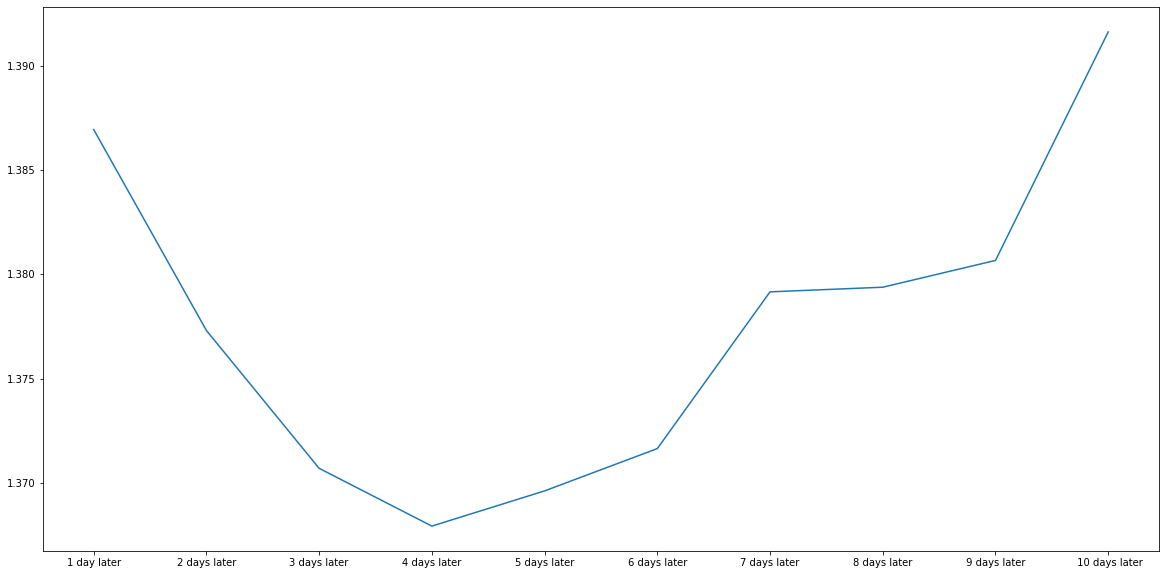

In [242]:
plt.rcParams['figure.figsize'] = (20,10)
print(pred)
plt.plot(x,y)